In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [6]:
df = df.drop(['ctz', 'state', 'name'], axis=1)

In [14]:
df.head()

,25k,age,division,10k,gender,half,official,bib,country,overall,pace,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,9,18.18,M,40.93,90.90,W1,CAN,9,3.47,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,5,30.90,M,64.90,132.50,1,KEN,5,5.07,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,1,30.90,M,64.92,130.37,2,ETH,1,4.98,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,5,18.73,M,42.00,88.43,W2,AUS,5,3.38,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,3,18.18,M,40.57,87.22,W3,JPN,3,3.33,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 18 columns):
25k          16164 non-null object
age          16164 non-null int64
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(12)
memory usage: 2.2+ MB


In [8]:
def get_float(item):
    if item != '-':
        return float(item) 
    else:
        return np.NaN

In [9]:
def getGender(gender_str):
    if gender_str == 'M':
        return 1
    else:
        return 0

In [15]:
df['25k'] = df['25k'].apply(get_float)
df['10k'] = df['10k'].apply(get_float)
df['half'] = df['half'].apply(get_float)
df['official'] = df['official'].apply(get_float)
df['30k'] = df['30k'].apply(get_float)
df['5k'] = df['5k'].apply(get_float)
df['35k'] = df['35k'].apply(get_float)
df['20k'] = df['20k'].apply(get_float)
df['40k'] = df['40k'].apply(get_float)
df['gender'] = df['gender'].apply(getGender)

In [17]:
df = df.drop(['country', 'bib'], axis=1)

In [19]:
df = df.drop(['city'], axis=1)

In [20]:
df.head()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,40.93,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,64.90,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,64.92,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,42.00,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,40.57,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 15 columns):
25k          16141 non-null float64
age          16164 non-null int64
division     16164 non-null int64
10k          16138 non-null float64
gender       16164 non-null int64
half         16148 non-null float64
official     16164 non-null float64
overall      16164 non-null int64
pace         16164 non-null float64
30k          16147 non-null float64
5k           16098 non-null float64
genderdiv    16164 non-null int64
20k          16147 non-null float64
35k          16143 non-null float64
40k          16147 non-null float64
dtypes: float64(10), int64(5)
memory usage: 1.8 MB


## K-Means clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [25]:
df = df.dropna()

In [27]:
df_norm = normalize(df)

In [29]:
from sklearn.decomposition import PCA
df_pca = PCA(2).fit_transform(df_norm)

### 2 clusters

In [30]:
y_pred = KMeans(n_clusters=2, random_state=101).fit_predict(df_pca)

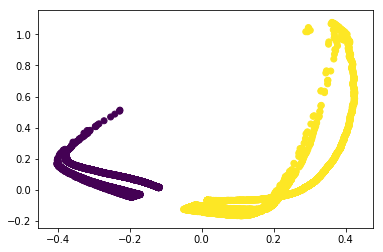

In [31]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred)
plt.show()

In [36]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

### 3 clusters

In [32]:
y_pred3 = KMeans(n_clusters=3, random_state=101).fit_predict(df_pca)

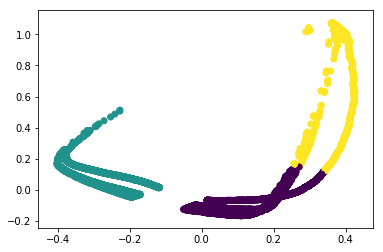

In [33]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred3)
plt.show()

### 4 clusters

In [34]:
y_pred4 = KMeans(n_clusters=4, random_state=101).fit_predict(df_pca)

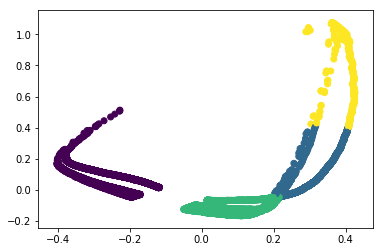

In [35]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred4)
plt.show()

## Mini batch K-Means

In [38]:
from sklearn.cluster import MiniBatchKMeans
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(df_pca)

# Add the new predicted cluster memberships to the data frame.
pred_mini = minibatchkmeans.predict(df_pca)

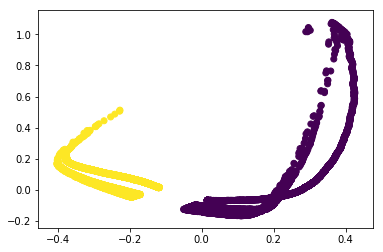

In [39]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

In [40]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(df_pca)

# Add the new predicted cluster memberships to the data frame.
pred_mini = minibatchkmeans.predict(df_pca)

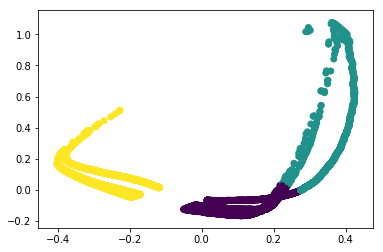

In [41]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

In [42]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(df_pca)
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "import pandas as pd\n",
    "import scipy\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "%matplotlib inline"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>25k</th>\n",
       "      <th>age</th>\n",
       "      <th>name</th>\n",
       "      <th>division</th>\n",
       "      <th>10k</th>\n",
       "      <th>gender</th>\n",
       "      <th>half</th>\n",
       "      <th>official</th>\n",
       "      <th>bib</th>\n",
       "      <th>ctz</th>\n",
       "      <th>...</th>\n",
       "      <th>overall</th>\n",
       "      <th>pace</th>\n",
       "      <th>state</th>\n",
       "      <th>30k</th>\n",
       "      <th>5k</th>\n",
       "      <th>genderdiv</th>\n",
       "      <th>20k</th>\n",
       "      <th>35k</th>\n",
       "      <th>city</th>\n",
       "      <th>40k</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>49.87</td>\n",
       "      <td>28</td>\n",
       "      <td>Cassidy, Josh R.</td>\n",
       "      <td>9</td>\n",
       "      <td>18.18</td>\n",
       "      <td>M</td>\n",
       "      <td>40.93</td>\n",
       "      <td>90.90</td>\n",
       "      <td>W1</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>9</td>\n",
       "      <td>3.47</td>\n",
       "      <td>ON</td>\n",
       "      <td>62.07</td>\n",
       "      <td>8.90</td>\n",
       "      <td>9</td>\n",
       "      <td>38.80</td>\n",
       "      <td>74.73</td>\n",
       "      <td>Toronto</td>\n",
       "      <td>85.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>77.27</td>\n",
       "      <td>30</td>\n",
       "      <td>Korir, Wesley</td>\n",
       "      <td>5</td>\n",
       "      <td>30.90</td>\n",
       "      <td>M</td>\n",
       "      <td>64.90</td>\n",
       "      <td>132.50</td>\n",
       "      <td>1</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>5</td>\n",
       "      <td>5.07</td>\n",
       "      <td>NaN</td>\n",
       "      <td>92.97</td>\n",
       "      <td>15.90</td>\n",
       "      <td>5</td>\n",
       "      <td>61.52</td>\n",
       "      <td>108.78</td>\n",
       "      <td>Kenya</td>\n",
       "      <td>124.77</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>77.23</td>\n",
       "      <td>23</td>\n",
       "      <td>Desisa, Lelisa</td>\n",
       "      <td>1</td>\n",
       "      <td>30.90</td>\n",
       "      <td>M</td>\n",
       "      <td>64.92</td>\n",
       "      <td>130.37</td>\n",
       "      <td>2</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>1</td>\n",
       "      <td>4.98</td>\n",
       "      <td>NaN</td>\n",
       "      <td>92.72</td>\n",
       "      <td>15.93</td>\n",
       "      <td>1</td>\n",
       "      <td>61.53</td>\n",
       "      <td>108.68</td>\n",
       "      <td>Ambo</td>\n",
       "      <td>123.78</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>50.50</td>\n",
       "      <td>32</td>\n",
       "      <td>Fearnley, Kurt H.</td>\n",
       "      <td>5</td>\n",
       "      <td>18.73</td>\n",
       "      <td>M</td>\n",
       "      <td>42.00</td>\n",
       "      <td>88.43</td>\n",
       "      <td>W2</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>5</td>\n",
       "      <td>3.38</td>\n",
       "      <td>NaN</td>\n",
       "      <td>61.35</td>\n",
       "      <td>8.98</td>\n",
       "      <td>5</td>\n",
       "      <td>39.88</td>\n",
       "      <td>73.00</td>\n",
       "      <td>Hamilton</td>\n",
       "      <td>83.43</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>48.75</td>\n",
       "      <td>39</td>\n",
       "      <td>Hokinoue, Kota</td>\n",
       "      <td>3</td>\n",
       "      <td>18.18</td>\n",
       "      <td>M</td>\n",
       "      <td>40.57</td>\n",
       "      <td>87.22</td>\n",
       "      <td>W3</td>\n",
       "      <td>NaN</td>\n",
       "      <td>...</td>\n",
       "      <td>3</td>\n",
       "      <td>3.33</td>\n",
       "      <td>NaN</td>\n",
       "      <td>59.92</td>\n",
       "      <td>8.92</td>\n",
       "      <td>3</td>\n",
       "      <td>38.55</td>\n",
       "      <td>71.68</td>\n",
       "      <td>Iizuka</td>\n",
       "      <td>81.88</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>5 rows × 21 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "     25k  age               name  division    10k gender   half  official bib  \\\n",
       "0  49.87   28   Cassidy, Josh R.         9  18.18      M  40.93     90.90  W1   \n",
       "1  77.27   30      Korir, Wesley         5  30.90      M  64.90    132.50   1   \n",
       "2  77.23   23     Desisa, Lelisa         1  30.90      M  64.92    130.37   2   \n",
       "3  50.50   32  Fearnley, Kurt H.         5  18.73      M  42.00     88.43  W2   \n",
       "4  48.75   39     Hokinoue, Kota         3  18.18      M  40.57     87.22  W3   \n",
       "\n",
       "   ctz   ...   overall  pace  state    30k     5k genderdiv    20k     35k  \\\n",
       "0  NaN   ...         9  3.47     ON  62.07   8.90         9  38.80   74.73   \n",
       "1  NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   \n",
       "2  NaN   ...         1  4.98    NaN  92.72  15.93         1  61.53  108.68   \n",
       "3  NaN   ...         5  3.38    NaN  61.35   8.98         5  39.88   73.00   \n",
       "4  NaN   ...         3  3.33    NaN  59.92   8.92         3  38.55   71.68   \n",
       "\n",
       "       city     40k  \n",
       "0   Toronto   85.55  \n",
       "1     Kenya  124.77  \n",
       "2      Ambo  123.78  \n",
       "3  Hamilton   83.43  \n",
       "4    Iizuka   81.88  \n",
       "\n",
       "[5 rows x 21 columns]"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df=pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv')\n",
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 16164 entries, 0 to 16163\n",
      "Data columns (total 21 columns):\n",
      "25k          16164 non-null object\n",
      "age          16164 non-null int64\n",
      "name         16164 non-null object\n",
      "division     16164 non-null int64\n",
      "10k          16164 non-null object\n",
      "gender       16164 non-null object\n",
      "half         16164 non-null object\n",
      "official     16164 non-null float64\n",
      "bib          16164 non-null object\n",
      "ctz          757 non-null object\n",
      "country      16164 non-null object\n",
      "overall      16164 non-null int64\n",
      "pace         16164 non-null float64\n",
      "state        14701 non-null object\n",
      "30k          16164 non-null object\n",
      "5k           16164 non-null object\n",
      "genderdiv    16164 non-null int64\n",
      "20k          16164 non-null object\n",
      "35k          16164 non-null object\n",
      "city         16163 non-null object\n",
      "40k          16164 non-null object\n",
      "dtypes: float64(2), int64(4), object(15)\n",
      "memory usage: 2.6+ MB\n"
     ]
    }
   ],
   "source": [
    "df.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = df.drop(['ctz', 'state', 'name'], axis=1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 14,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>25k</th>\n",
       "      <th>age</th>\n",
       "      <th>division</th>\n",
       "      <th>10k</th>\n",
       "      <th>gender</th>\n",
       "      <th>half</th>\n",
       "      <th>official</th>\n",
       "      <th>bib</th>\n",
       "      <th>country</th>\n",
       "      <th>overall</th>\n",
       "      <th>pace</th>\n",
       "      <th>30k</th>\n",
       "      <th>5k</th>\n",
       "      <th>genderdiv</th>\n",
       "      <th>20k</th>\n",
       "      <th>35k</th>\n",
       "      <th>city</th>\n",
       "      <th>40k</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>49.87</td>\n",
       "      <td>28</td>\n",
       "      <td>9</td>\n",
       "      <td>18.18</td>\n",
       "      <td>M</td>\n",
       "      <td>40.93</td>\n",
       "      <td>90.90</td>\n",
       "      <td>W1</td>\n",
       "      <td>CAN</td>\n",
       "      <td>9</td>\n",
       "      <td>3.47</td>\n",
       "      <td>62.07</td>\n",
       "      <td>8.90</td>\n",
       "      <td>9</td>\n",
       "      <td>38.80</td>\n",
       "      <td>74.73</td>\n",
       "      <td>Toronto</td>\n",
       "      <td>85.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>77.27</td>\n",
       "      <td>30</td>\n",
       "      <td>5</td>\n",
       "      <td>30.90</td>\n",
       "      <td>M</td>\n",
       "      <td>64.90</td>\n",
       "      <td>132.50</td>\n",
       "      <td>1</td>\n",
       "      <td>KEN</td>\n",
       "      <td>5</td>\n",
       "      <td>5.07</td>\n",
       "      <td>92.97</td>\n",
       "      <td>15.90</td>\n",
       "      <td>5</td>\n",
       "      <td>61.52</td>\n",
       "      <td>108.78</td>\n",
       "      <td>Kenya</td>\n",
       "      <td>124.77</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>77.23</td>\n",
       "      <td>23</td>\n",
       "      <td>1</td>\n",
       "      <td>30.90</td>\n",
       "      <td>M</td>\n",
       "      <td>64.92</td>\n",
       "      <td>130.37</td>\n",
       "      <td>2</td>\n",
       "      <td>ETH</td>\n",
       "      <td>1</td>\n",
       "      <td>4.98</td>\n",
       "      <td>92.72</td>\n",
       "      <td>15.93</td>\n",
       "      <td>1</td>\n",
       "      <td>61.53</td>\n",
       "      <td>108.68</td>\n",
       "      <td>Ambo</td>\n",
       "      <td>123.78</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>50.50</td>\n",
       "      <td>32</td>\n",
       "      <td>5</td>\n",
       "      <td>18.73</td>\n",
       "      <td>M</td>\n",
       "      <td>42.00</td>\n",
       "      <td>88.43</td>\n",
       "      <td>W2</td>\n",
       "      <td>AUS</td>\n",
       "      <td>5</td>\n",
       "      <td>3.38</td>\n",
       "      <td>61.35</td>\n",
       "      <td>8.98</td>\n",
       "      <td>5</td>\n",
       "      <td>39.88</td>\n",
       "      <td>73.00</td>\n",
       "      <td>Hamilton</td>\n",
       "      <td>83.43</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>48.75</td>\n",
       "      <td>39</td>\n",
       "      <td>3</td>\n",
       "      <td>18.18</td>\n",
       "      <td>M</td>\n",
       "      <td>40.57</td>\n",
       "      <td>87.22</td>\n",
       "      <td>W3</td>\n",
       "      <td>JPN</td>\n",
       "      <td>3</td>\n",
       "      <td>3.33</td>\n",
       "      <td>59.92</td>\n",
       "      <td>8.92</td>\n",
       "      <td>3</td>\n",
       "      <td>38.55</td>\n",
       "      <td>71.68</td>\n",
       "      <td>Iizuka</td>\n",
       "      <td>81.88</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     25k  age  division    10k gender   half  official bib country  overall  \\\n",
       "0  49.87   28         9  18.18      M  40.93     90.90  W1     CAN        9   \n",
       "1  77.27   30         5  30.90      M  64.90    132.50   1     KEN        5   \n",
       "2  77.23   23         1  30.90      M  64.92    130.37   2     ETH        1   \n",
       "3  50.50   32         5  18.73      M  42.00     88.43  W2     AUS        5   \n",
       "4  48.75   39         3  18.18      M  40.57     87.22  W3     JPN        3   \n",
       "\n",
       "   pace    30k     5k  genderdiv    20k     35k      city     40k  \n",
       "0  3.47  62.07   8.90          9  38.80   74.73   Toronto   85.55  \n",
       "1  5.07  92.97  15.90          5  61.52  108.78     Kenya  124.77  \n",
       "2  4.98  92.72  15.93          1  61.53  108.68      Ambo  123.78  \n",
       "3  3.38  61.35   8.98          5  39.88   73.00  Hamilton   83.43  \n",
       "4  3.33  59.92   8.92          3  38.55   71.68    Iizuka   81.88  "
      ]
     },
     "execution_count": 14,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 16164 entries, 0 to 16163\n",
      "Data columns (total 18 columns):\n",
      "25k          16164 non-null object\n",
      "age          16164 non-null int64\n",
      "division     16164 non-null int64\n",
      "10k          16164 non-null object\n",
      "gender       16164 non-null object\n",
      "half         16164 non-null object\n",
      "official     16164 non-null float64\n",
      "bib          16164 non-null object\n",
      "country      16164 non-null object\n",
      "overall      16164 non-null int64\n",
      "pace         16164 non-null float64\n",
      "30k          16164 non-null object\n",
      "5k           16164 non-null object\n",
      "genderdiv    16164 non-null int64\n",
      "20k          16164 non-null object\n",
      "35k          16164 non-null object\n",
      "city         16163 non-null object\n",
      "40k          16164 non-null object\n",
      "dtypes: float64(2), int64(4), object(12)\n",
      "memory usage: 2.2+ MB\n"
     ]
    }
   ],
   "source": [
    "df.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [],
   "source": [
    "def get_float(item):\n",
    "    if item != '-':\n",
    "        return float(item) \n",
    "    else:\n",
    "        return np.NaN"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [],
   "source": [
    "def getGender(gender_str):\n",
    "    if gender_str == 'M':\n",
    "        return 1\n",
    "    else:\n",
    "        return 0"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 15,
   "metadata": {},
   "outputs": [],
   "source": [
    "df['25k'] = df['25k'].apply(get_float)\n",
    "df['10k'] = df['10k'].apply(get_float)\n",
    "df['half'] = df['half'].apply(get_float)\n",
    "df['official'] = df['official'].apply(get_float)\n",
    "df['30k'] = df['30k'].apply(get_float)\n",
    "df['5k'] = df['5k'].apply(get_float)\n",
    "df['35k'] = df['35k'].apply(get_float)\n",
    "df['20k'] = df['20k'].apply(get_float)\n",
    "df['40k'] = df['40k'].apply(get_float)\n",
    "df['gender'] = df['gender'].apply(getGender)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 17,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = df.drop(['country', 'bib'], axis=1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = df.drop(['city'], axis=1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>25k</th>\n",
       "      <th>age</th>\n",
       "      <th>division</th>\n",
       "      <th>10k</th>\n",
       "      <th>gender</th>\n",
       "      <th>half</th>\n",
       "      <th>official</th>\n",
       "      <th>overall</th>\n",
       "      <th>pace</th>\n",
       "      <th>30k</th>\n",
       "      <th>5k</th>\n",
       "      <th>genderdiv</th>\n",
       "      <th>20k</th>\n",
       "      <th>35k</th>\n",
       "      <th>40k</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>49.87</td>\n",
       "      <td>28</td>\n",
       "      <td>9</td>\n",
       "      <td>18.18</td>\n",
       "      <td>1</td>\n",
       "      <td>40.93</td>\n",
       "      <td>90.90</td>\n",
       "      <td>9</td>\n",
       "      <td>3.47</td>\n",
       "      <td>62.07</td>\n",
       "      <td>8.90</td>\n",
       "      <td>9</td>\n",
       "      <td>38.80</td>\n",
       "      <td>74.73</td>\n",
       "      <td>85.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>77.27</td>\n",
       "      <td>30</td>\n",
       "      <td>5</td>\n",
       "      <td>30.90</td>\n",
       "      <td>1</td>\n",
       "      <td>64.90</td>\n",
       "      <td>132.50</td>\n",
       "      <td>5</td>\n",
       "      <td>5.07</td>\n",
       "      <td>92.97</td>\n",
       "      <td>15.90</td>\n",
       "      <td>5</td>\n",
       "      <td>61.52</td>\n",
       "      <td>108.78</td>\n",
       "      <td>124.77</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>77.23</td>\n",
       "      <td>23</td>\n",
       "      <td>1</td>\n",
       "      <td>30.90</td>\n",
       "      <td>1</td>\n",
       "      <td>64.92</td>\n",
       "      <td>130.37</td>\n",
       "      <td>1</td>\n",
       "      <td>4.98</td>\n",
       "      <td>92.72</td>\n",
       "      <td>15.93</td>\n",
       "      <td>1</td>\n",
       "      <td>61.53</td>\n",
       "      <td>108.68</td>\n",
       "      <td>123.78</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>50.50</td>\n",
       "      <td>32</td>\n",
       "      <td>5</td>\n",
       "      <td>18.73</td>\n",
       "      <td>1</td>\n",
       "      <td>42.00</td>\n",
       "      <td>88.43</td>\n",
       "      <td>5</td>\n",
       "      <td>3.38</td>\n",
       "      <td>61.35</td>\n",
       "      <td>8.98</td>\n",
       "      <td>5</td>\n",
       "      <td>39.88</td>\n",
       "      <td>73.00</td>\n",
       "      <td>83.43</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>48.75</td>\n",
       "      <td>39</td>\n",
       "      <td>3</td>\n",
       "      <td>18.18</td>\n",
       "      <td>1</td>\n",
       "      <td>40.57</td>\n",
       "      <td>87.22</td>\n",
       "      <td>3</td>\n",
       "      <td>3.33</td>\n",
       "      <td>59.92</td>\n",
       "      <td>8.92</td>\n",
       "      <td>3</td>\n",
       "      <td>38.55</td>\n",
       "      <td>71.68</td>\n",
       "      <td>81.88</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     25k  age  division    10k  gender   half  official  overall  pace    30k  \\\n",
       "0  49.87   28         9  18.18       1  40.93     90.90        9  3.47  62.07   \n",
       "1  77.27   30         5  30.90       1  64.90    132.50        5  5.07  92.97   \n",
       "2  77.23   23         1  30.90       1  64.92    130.37        1  4.98  92.72   \n",
       "3  50.50   32         5  18.73       1  42.00     88.43        5  3.38  61.35   \n",
       "4  48.75   39         3  18.18       1  40.57     87.22        3  3.33  59.92   \n",
       "\n",
       "      5k  genderdiv    20k     35k     40k  \n",
       "0   8.90          9  38.80   74.73   85.55  \n",
       "1  15.90          5  61.52  108.78  124.77  \n",
       "2  15.93          1  61.53  108.68  123.78  \n",
       "3   8.98          5  39.88   73.00   83.43  \n",
       "4   8.92          3  38.55   71.68   81.88  "
      ]
     },
     "execution_count": 20,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 16164 entries, 0 to 16163\n",
      "Data columns (total 15 columns):\n",
      "25k          16141 non-null float64\n",
      "age          16164 non-null int64\n",
      "division     16164 non-null int64\n",
      "10k          16138 non-null float64\n",
      "gender       16164 non-null int64\n",
      "half         16148 non-null float64\n",
      "official     16164 non-null float64\n",
      "overall      16164 non-null int64\n",
      "pace         16164 non-null float64\n",
      "30k          16147 non-null float64\n",
      "5k           16098 non-null float64\n",
      "genderdiv    16164 non-null int64\n",
      "20k          16147 non-null float64\n",
      "35k          16143 non-null float64\n",
      "40k          16147 non-null float64\n",
      "dtypes: float64(10), int64(5)\n",
      "memory usage: 1.8 MB\n"
     ]
    }
   ],
   "source": [
    "df.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## K-Means clustering"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.cluster import KMeans\n",
    "from sklearn.preprocessing import normalize"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = df.dropna()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "metadata": {},
   "outputs": [],
   "source": [
    "df_norm = normalize(df)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.decomposition import PCA\n",
    "df_pca = PCA(2).fit_transform(df_norm)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 2 clusters"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred = KMeans(n_clusters=2, random_state=101).fit_predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XeYXGX1wPHvubOzs5vNppelhQ4KEtoK+hMRhGgADTYgdBAIqKhU6R2kCVIFgoIUITTREAIIoQpEEgg1tNBDSCF1++7MPb8/ZhImm5k77d4pO+fzPHmyM/cth8vmzJ33vvd9RVUxxhhTXZxSB2CMMab4LPkbY0wVsuRvjDFVyJK/McZUIUv+xhhThSz5G2NMFbLkb4wxVciSvzHGVCFL/sYYU4VqSh1AOsOGDdMNNtig1GEYY0xFefnll79U1eGZypVt8t9ggw2YOXNmqcMwxpiKIiKfZFPOhn2MMaYKWfI3xpgqZMnfGGOqkCV/Y4ypQpb8jTGmClnyN8aYKmTJ3xhjsqDuEtRtKXUYvinbef7GGFMOtOcNdOlx4M4FFKU/DLwYp/6HpQ6tIHblb4wxaWhsIbp4f3A/A1bud94Ky3+LO38z3PZppQyvIJb8jTEmDV12AtCdvsCKX+EuOKpo8fjJkr8xxqSg0U+hJ4slZvQZ3Pk74sY6gg/KR5b8jTEmle7nyD5FLoVFW+O2PxlkRL6y5G+MqXhu+z9xF+2KO39L3C9/jHY970Or9UA4tyorjsFderYPfQfPkr8xpqK5rbfDijMh9jnQA9F30aUT0K7phTVct3t+9bom4a74a2F9F4Elf2NMxVKNQetlQLTXkR506R8KalucAcjg60DqAcmtcvtluF8eWlD/QbPkb4ypWBqbR/rZOPNx2yYV1L5EvosMfxHqDiTndBl9EXf+NqjbVlAMQbHkb4ypSOoug9ZrvQu1nI92zyisIwlB14OAm0fldnThtrhdrxUWQwAs+RtjKo66K9Av94bOhzOUjKKtNxfWWc875Dzs09vSfXDb7i6sDZ9Z8jfGVBxtvwvcJUBP5sLuF4V15gwC7X1PIQ8t5+B2vlR4Oz7xJfmLyC0islBE3kxzXETkGhGZIyKvi8h2fvRrjKlSXc8CXVkUDEHttwvqSmrWh5qN8SVdLjsI7Xqm8HZ84NeV/9+BsR7H9wA2TfyZANzgU7/GmGoUGklWQzHSiDQcUXh/g65P018NuaZRXXosGs1qj/VA+ZL8VfVZYIlHkb2B2zVuOjBIRNbyo29jTPWRfocBEY8SDtTthwybjIRGFt6fLgFJ1V8UQhuBs34OrXWhHfcUHFOhijXmvw7wWdLruYn3ViMiE0RkpojMXLRoUZFCM8ZUGqndGgacD9LAV0/hClAD4e2RETNwBl2AhJr86VBjpP2m4S4AXZFbe7F5BYdUqGKt55/qrOkab6hOBCYCNDc3r3HcGGNWcvr9BK3fE6LvoTiItoHThNSs539n4S0THwApaDsQyq09Z6uCQypUsZL/XCD5/8i6QOk/+owxFU2kFsLfKHQiZmbaSfqHyWLk/AxA+0QY4MO9iAIUa9hnMnBIYtbPt4Dlqlrg/CtjjCmSrmfxXuQt14+fpbhtjxQQUOF8ufIXkbuBXYBhIjIXOIfEmVLVG4GpwJ7AHKAdONyPfo0xJgiqMeh6Cu16Kj7P3xmG99BOHk//tvweN7I1Ts3a+YZZEF+Sv6run+G4Ar/xoy9jjAmSag+65AiIvp4Yz68hnvjzWd4hgy/HQtPr/rebBXvC1xhjknVOgZ7XEokf4iuGrnygzO+7C524Pe/53GZ2LPkbY0wS7XgISLElo0SgobBlolPqedv/NrNgyd8YY5LFFqR+XzuRyNbgeIzR13otdJBOaWa1W/I3xphkbroHTKNozTeg4ej0dUNNyMi3ofECCG0HDM7cX83G+URZMEv+xhiTTNPN53cQYki/X5B2rkzPK4iEcBr2wxk+CcIbZugsgoS3LCDY/FnyN8aYZJFvk/LGbmgjxGlAJEzaoZroG6gmzQqq39u7r4ZjEClNGrbkb4wxSaTxFJD+QG3inRBIPTLwfDS2AHfxQcSf6k0lwmofHHW/8O6s64mC481XsZZ3MMaYiiA1G8CwqWj77dD9KtRsgjQcBs5wdNHOoK1pakag/meIfJX8pWe69+3caOlWubHkb4wxvUhoJNJ48mrvua23eSR+oHYHZMCpq78XW5iho+F5Rlg4S/7GGJON7hc8Dgoy+CZEeqXU2q2929RsdiMLho35G2NMNmo29z4e+3SNt6RmkwyNlm5HL0v+xhiTjYYDPA6G4gvApSLDPJt1O5/NP6YCWPI3xphstN5I6pQpULsT4gxJXa/2/7zbXXZcoZHlxZK/McZkoBqDjgdIvbJnDTLoivSVG0/P0Horqj0FRJcfS/7GGJNRT+JPKiHEaUxbU0KDyJhq3QyzggJgyd8YYzIQqYPQRqmOQG2zZ13tnkHGvQAkizWAfGbJ3xhjMlBVCK2V4kgEaTzNu3L0/QytNyBOv3xDy5slf2OMyaTrceieueb7EoaaDbzrhkdnaLwN143mG1neLPkbY0wG2v4AKTd4QaFnlmddp3Y0GXcAW7R7vqHlzZK/McZk5DFmr1ns7dvvZO/jOg835rF0RAAs+RtjTAZS/xOQ+tQHa7fLWN8ZcGTmTlquzDGqwljyN8aYTOr2gNqdEx8AAkTiyzwPugqR2ky14xrO9D7eeXehUebEl+QvImNF5F0RmSMip6Y4PkpEnhKRWSLyuojs6Ue/xhhTDCIOMugaZPAt0PAbpPEkZNg0JLJz9m30PxgIe5SIoVq8G78FJ38RCQHXA3sAWwD7i8gWvYqdCdyrqtsC44G/FNqvMcYUk4ggtdvjNP4OaTgUCXmv2ZOqPkPu9yyjnY8UEmJO/Ljy3wGYo6ofqmo3MAnovXeZAgMSPw8ESreDgTHGlErNKO/jPR8VJw78Sf7rAJ8lvZ6beC/ZucBBIjIXmAr8NlVDIjJBRGaKyMxFixb5EJoxxpSR1r95H4/sUJw48Cf5p5rA2nvnsv2Bv6vqusCewB2SYtdiVZ2oqs2q2jx8eOl2uDHGmEC0/8PzsNQWL/n7sZPXXGC9pNfrsuawzhHAWABVfVFE6oBhQPFXMzLGmDQ0thBtnwTR9yA8Gum3b3yTlu6XwBkCkR8gTv8CeljqeTTFNXFg/Ej+M4BNRWRD4HPiN3R773rwKbAb8HcR+TpQB9i4jjGmbGjPO+iSA0C7gW7oegZtvRoIAVGgFuRCGHwrkml7xgpQ8MeMxucmHQs8BrxNfFbPWyJyvoiMSxQ7EThKRF4D7gYOU1XPTe2NMaaYdPkZiQ3auxPvdBFfxrmTePJvB21Fl/0Gzeap3pTS7PaV4Ha/kWe7ufNlA3dVnUr8Rm7ye2cn/Twb+I4ffRljjN9ctwuiWSZebYXoOxDuPaM9C/1PhNaz0h9v+QsMvSH3dvNgT/gaY0z3czkUFiCWVzfSsK93gZ6X82o3H5b8jTGmc0oOhSNQk8dVP4kHvTyHfpbl1W4+LPkbY4xnKowk/q4D6YcMvpb4wgZ5Cn89/7o+8mXM3xhjKpnU/xTtmgbae83+ehh8DXTPQpwhUP+j+N+FiIyBnhfTHnbdVpyCppNmx678jTGmdieo+ynxWehhoB6oQwZfixP5Hk7jcUjDIYUnfoB++3gfb3uw8D6yYFf+xpiqJyLIwHPRfvtD93MoDRDeDJzBqGpirN4fjhPx3s697RJoPNi3/tKx5G+MMQkS3hy36zloPR+IoQjIEBhyC1K0sfqeovRiwz7GGJPgdkyB1sv4aiqngi5GF49H17gfUNks+RtjzEotF6c50IF2/KeooQTNkr8xxqzkLvY4Nt+fLtyuDCX6+dJPJpb8jTFmJWdo+mO1O/rTR8sV3sfr9vennwws+RtjzErOemkOhJGwTyt5dtzjeVgGHudPPxlY8jfGmJViH6Q7ALrCp046PY6FEIl4HPePJX9jjFlJ0o23h8C3pOy1NER+C8blw5K/Mcas1O8g4k/5JquFyPeJb0Doh2GeR1WL8wFgyd8YYxKk4XCoGwNEQPoD9RDeAhl4kX+dNPzG87Auv9a/vjxIuW6o1dzcrDNnzix1GMaYPkhV43v1tt8K2gV146DfLxB3GdSsB25bfB/f0DpI+Gs+9x1DF3g9LRzBacp/Ry8ReVlVmzOVs+UdjDFVRxePh+isr95ovwnab0KlAbQH6n+MDLgAEf9TpEgI70vuTM8B+MOGfYwxVcXtfGT1xJ9M24Bu6HgIbbk6wCg8nicoEkv+xpjq0nZHFoW6of324GKo8V4kzo0tD67vBEv+xhiTUgeB3RONvu59vPu1YPpNYsnfGFNd6vcnvgl7Zn6u479S/AMlwwNj0c9877c3X5K/iIwVkXdFZI6InJqmzL4iMltE3hKRu/zo1xhjciX1e0D4m2ROf43B9C8CZNimMYAPnd4KvpUt8Z2MrwfGAHOBGSIyWVVnJ5XZFDgN+I6qLhWREYX2a4wx+RCpgSG3Q/ezaPtkiH4CsXdYfROVCPT/dYBRZNgAvm6nAPuO82Me0w7AHFX9EEBEJgF7A7OTyhwFXK+qSwFUdaEP/RpjTF5EHIjsgkR2ic/5b70G2m75ajSo3+FIwy8DjMB7YxinZlSAfcf5kfzXAZIHqOYCvdc+3QxARJ4n/pF3rqo+6kPfxhhTEBFBGn+P9j8GYosgNLwIi6s1AN0B9+HNjzH/VINTvW+R1wCbArsA+wN/FZFBazQkMkFEZorIzEWLFvkQmjHGZEckgtSsW5xVNesP8jxcjC0j/Uj+c4HkRbDXBealKPNvVe1R1Y+Ad4l/GKxGVSeqarOqNg8fPtyH0Iwxpgw53oMuGv0i+BB8aGMGsKmIbCgitcB4YHKvMv8CdgUQkWHEh4E+9KFvY4ypPG6r52EJjQw8hIKTv6pGgWOBx4C3gXtV9S0ROV9ExiWKPQYsFpHZwFPAyarqsVmmMcb0Ya73sI44DYGH4MuqRao6FZja672zk35W4ITEH2OMKQvqrgB3OYTWJj5rvUi6ZxSvrzRsVU9jTNVxY8tg6ZEQfYP4AEg/dOC5OPU/Dr7v7jdA3w28n0ws+RtjqopqN3y5e9KevDGgBZafgoaakNpvBhvAspMyFEi3laS/bG0fY0xV0bY702zGHkVbbgg+APcj7+Ph7YKPAUv+xphq0/lI+mOxYCchum40c6H+vw80hpVs2KePal3WxqxpbxAKh9h+zGgi9UV4cMWYSuB4bKBes2Wwffdk2p7RwYlsHWwMCZb8+6AHrp7CTSfejqriiENNJMQF/z6V7XYfXerQjCk5aTgI7X4G6H0VLjDgtGA7j33ufbzuiGD7T2LDPn3My0+8xo3H34a6Cgqu69Ld0cMZP7qYthXtpQ7PmJJTt401V6UJw6CbcGrWDbZzN8NSzZEdgu0/iSX/Pubyw65P+X60O8rz/3qpyNEYU17cnjmw/PesvnwzIBEksnPwAXTc63lYirCU80o27NMHLPx0Ea9Me5OGAfUs/mJp2nKfzp5bxKiMKUOtVxOf2tmLtqIdDyP9Ap7nH3vH83AxHzSz5F/hbj17Evf/aTJOyMFxZM31VJN8/f82K15gxpSjHo/k2zMdCPohr/QXZ8Vmyb+CvfrUm/zzyil0d/ZkLOuEHL611/ZFiMqY8qCqaPud0PEAoFC3J9SsD92fpK5Qs8ZCw75yu14JtP1cWfKvMLFojOlTXubt6e/x6lNv0tnelbGOOMJZ955AKFTEtUuMKSGNzUe//Anokq/ebJ0DhNPUCCH1vwg2qKWZnuwNfveuZJb8K0h7SwfH73wWX3ywgI7WThwn9f36+sY6dh2/E/M+mM86mzSx78l7s/bGTUWO1pjSUHXRxfutnviB+E3eNN+S+x2POBk2VS9YhntuI/4dcP+rs+RfQe6++J989s48erriv8Cu66Ys50Zdjv7TIfRrrC9meMaUh56Z4Oa4YnzPs8CEQMIBcNunexdwNsQpwjLOySz5V5Bp//jvqsSfSqgmRE04xO9vnGCJ31Sv2EJS7y7rVWdBIKGs0nKl9/EhE4PtPwVL/mXIdV2euvt5pv71CWJRlzEH78wPD98VJ5T6FzpU47Dr/jsxdK3B/PDwXVlv83WKHLExZSQ8Gs9pbynrBLyYmn7gedipWT/Y/lOw5F+GLjn4Gl6cPJPOtvjN3DmzPuKZ+1/kh4fuwqRL/7Xa7B5xhI232ZBTbvttqcI1pqxIzSi0fi/omApknhABII3HBBsULQG3nzt7wrfMzHn1I17494xViR+gq72Lt6e/z6bbb8Tm39yEuv511IRD1DfWMWj4AM64+7gSRmxM+ZEBF0PjmRDaDJwmcDwWbOt/ClKzYfGCKxN25V9isViM//7zJZ6553kiDREaBvTDja15I7eztZM3//sOVzx9Hm889zbvzviAEaOG8e1xzdRG0k1fM6b6aM+b0PUcIvUw5Ba063lYcWqKknUweCJO5FtFj3F1pbkGt+RfQiuWtHDSrucy99159HRHEYFQOPX/ktq6MINGDkREGL3zFozeeYsiR2tMeVNVdMVZ0PEQ8eGecOJGa4jU9wC6kNrgN05xezKs5EmwD5elY8M+JfLSo7PYd+2j+OiNT+npji8tqxpfgC3aveaGD47jsNsB3y12mMZUju7nofMhoANwiX8AdAJtaSooGvss+Lha7/Q+3vib4GNIwa78i8x1Xc768SW89MistGVq68LU1tUSi8ZAIFwb5sx7jmfwyEFFjNSYyqId/wbtyK2SFOHfVNdt3iH0GxN8DCn4kvxFZCxwNfHvV39V1UvSlPsFcB/wTVWd6Uffleak3c7jjWdme5YJhWs4fuIxrLXRCGLRGJtuv5EtzWBMRjkOZDjr4oSGBhPKary3bizmSp7JCk7+Eo/8emAM8eeXZ4jIZFWd3atcI/A74H+F9lmp2la0ZUz8AI4j7LjXtrb1ojE5kPpxaNej2V/9Dzwn2IDKnB9j/jsAc1T1Q1XtBiYBe6codwFwGfFBuKqydMEyvvx8MZ+8lXk9/fr+dfxx6umW+I3JVe3/Qd1PgTri17Ve6a0OcYYEHpK7/NoMJYJeTyg9P4Z91gGS75rMBXZMLiAi2wLrqeoUEcm0tF1F6+ro4q+n/oPHbn2KjtZOQuEQsZ4Y4ghDmgZ71v3atzbjyqfPJVxrUzeNyZWIIAPPRfuNh67n0FavJRUUar4WfFAdGZJ/3SHBx5CGH8k/1ZoDq+ZViYgD/Bk4LGNDIhNIrK40alRxlzf1y3k//xOvPf3WqqdwYz3xXYPUVRbPWxI/WylmnQ1ZaxDXPH8hIjmuSWJMldPYfLT9boi+A+HRSL/90ch3oPXy9JXq9kQk2IssN5r5qV4Z+PtAY/DiR/KfC6yX9HpdYF7S60bgG8DTicTWBEwWkXG9b/qq6kRgIkBzc3OOi3OUVntLB0/c8Syznnwz5VTNVRQGjRzAsgUrVr219iZNXP/SJZb4jcmR9sxGlxwI2gN0Q9cLaNvfIbK7d8X+vws+uC8P9D4eGlPSf/N+JP8ZwKYisiHwOTAeOGDlQVVdDgxb+VpEngZO6kuzfZ68+zmuPPJGAO/En7B58yacff+JzH13HsPXG0bj4NKN+xlTqVQVXXY8aPI8/q74B0HnI+krymCcmmIsfphhv95h1xUhhvQKTv6qGhWRY4HHiE/1vEVV3xKR84GZqjq50D7K2RcfLuCKI2+ku6M76zqbN29CbaSWjUZvEFxgxvRxuvx0iH2U4ogLtKev2JhqqYfiK/U3fV/m+avqVGBqr/fOTlN2Fz/6LBdP3PkssZ7MV/sricC+p6SaDGWMyZb2vA6dUzMXTKXuR/4Gk4K7oHQ3crNlyzsUqG1FO7Fo6h21Urno4dOJ1NUGGJExfZ92PkP65Zq90loIxwn4Rm9PG2iGnbsiB3gfLwJb3iFPruvyn78/zb+u9Rhb7OX6mZey2XYbBRiVMdVBnH4oNUCq4dYQ8aGfFDLdCPbD4m0zFnEGnxt8HBlY8s/DR299ygk7n03r0nQLRq1pr6N3t8RvjF/q9kqzNWItqT8QEhqODioiIP2+2qsrwvMFWbBhnxxNuflxJmx1YvaJX+DXfz6M424I9pfOmGqiXc+T8oGZiNciaYKENwsqpLjFmZeMkJH3BRtDluzKPwcdrR1cfXT2Gy1vtv3GXPnsebZUgzE+UlVovYKUC6Z1PZa+orMeIgHfb4vd433c+TYi5ZEPLPl7aFnayitPvEFNOMQXHy/kphO9l2ZNtuV3Nueq5y4MMDpjqpR2gLs0zUGPmXf1ewYSTi6cEdnnkKBZ8k/jkVumcd2xfwMHutt7MldIcvA5+3DIOfsGFJkxVU7qgH7kvCl67feCiGYVd8XtgbbvN0v+Kcx9bx7X/faWVevzZGvMId/jqMsOZvCIgQFFZoyh5xUg1b/NCOmnfxL8lo3tmb7pl9fyLZb8U3jizmdzemIX4GfH78WvrjgsmICMMQCo24ouPYrUK8N7zLSp/W6gT9S63Z9kLlSXco+rkrHZPim88V/vNTl62273rSzxG1MMXU/EN7teg0PqbwNxMvCPgYUEwJLMWzE6g34abAw5siv/Xv559RRef/qtrMqGwg4n33qsbaxuTLG4LUAs1QHPahIaGUg4kJh9lEn9A4H1ny9L/klisRg3HJ/d3fghaw3irk9vtL11jSkiDa1Hpj1x1xTsAIcuyHxF7wzcKtAY8lHVyT8Wi/Hxm59RWxdm3c3W5sD1f5VVvbU2Gcnt75V2OVZjqoW6rWjrVdA+idRP73rf6KUu6Jl3mfblLo8nenuryuTvui5/P+ceHrhyCqAIQleWN3i/f+B3OO2O44IN0BgDgKqLLjkYou+S9oq/5lsQfSZNC3XIwPOCCg+3+/2MZZym8lzVvuqS/xcfLeCo0SfS1eZxpZDG/qf/lF9eWPrV+IypGt3TE2v2ewz1RP+b5kAYGXB2sOvmL9kruLYDVnWzfU7c5Zy8En8oHLLEb0yxRd9JbNHoJdUNYMAZCfXjfA9pJXfZi1mUGhFY/4Wqmiv/nu4erjp6Ios+W5xX/fsW/NXniIwxmagzhEwzeVKrgYbDAlvLx3Vd6Dw0c8Gh/wqkfz9URfJXVU4ZcwFv/vftvOrfNudaGgfZPrvGFJOqQst1pL2yz0AiO/kbULKF2d3EdcLDMhcqkapI/uf9/HLeeC73xC8O3LfwbwwcMiCAqIwxXrRzGrif5lc5tCFSE8z+Ge6iv2VXcFCG3bxKrM8n/xmPzuL5f83Iq+5/ouWx7rYxVanj3jwrCvQ/1tdQVhO7NHOZuitx6oYEF4MP+vwN3wv2S7XbT2YPd/zD50iMMTnR9jwr1iJ1wWzX6M7/elb9O4OC3yS+UH06+c99/ws6WlItAJVZbcQ2WTempMLfyK9e/xMRCWqT9sz3H5ymNwPq21++JH8RGSsi74rIHBE5NcXxE0Rktoi8LiLTRGR9P/rN5I7z8/3aaIwpOXdZHpX6Iw1ZzMLJgzv/O5kLOacH0ncQCk7+IhICrgf2ALYA9heRLXoVmwU0q+po4H7gskL7zWT6lJk8+Y90D39ktmRBPr94xhjfxD7Kvc6whwN8qGtRxhLOiMMC6tt/flz57wDMUdUPVbUbmATsnVxAVZ9SXTWANx1Y14d+PV1y8LUF1f918x98isQYk5fwVkAOwzehrXFq1gokFHd+Fhu/11wUSN9B8SP5rwN8lvR6buK9dI4AHvGh37RUlbbl6W8Wheszr8S5+PN0e4QaY4pBGg6HXB7SGhTMZinu/OySujNsn0D6D4ofyT/Vd6yUC1yLyEFAM3B5muMTRGSmiMxctCjzV6x0Pn7Te27wBl8flVU7Y5zK+p9pTKVTVTT6CRqbj4TWQYbcA7XfBjJ9CDTihDf2PR63bTaQxTLv4at97ztofiT/ucB6Sa/XBeb1LiQiuwNnAONUNeXiOqo6UVWbVbV5+PDheQfUsrTN8/gXHy/Muq0xzj6Mcfahuzu3bR2NMbnRrv+hC7+LfrkXumhX3IW7o1KLM+Q2aDjJu3LDL4MJquUnWRVzhu4RTP8B8iP5zwA2FZENJb6QxnhgtTVMRWRb4CbiiT/7zJunwSO8n8jNZ2G3veoOZIyzD89MzmYxJ2NMLjQ2L743ry4kvmZ/LP5075djcXs+gLaUgwVfaZjge0xZjfMDjMht29dyUXDyV9UocCzwGPA2cK+qviUi54vIyiX1Lgf6A/eJyKsiEugC1xNP9X5Ay0UZf3p2n+i9XfiTK1d9G7jl3LvzasMYszptv5fUG7W4sOQAvPbnhTocx995/VknfnbBcSrzcSnJav/JEmhubtaZM2fmVfeAUUezaO4SzzL7nvJjvvx8CU/e+XxefawhDI+2T7JtHY3Jg7vsROh8KL/Kg+/CiTT7F0vWiR+cpvd869cvIvKyqmY8IZX5kZVB45DGjGXuvfQhnn9wBudMOdmfTntgbHj8qm8Fj0962p92jakCUvttUs8dycBZz+fEPz77rssw8eeiT175P3LLk1x55A1Zl7/5vSs5arMT8uorW4PXbuQfH91EOBzUY+fGVC7VTnTBTsCK3CoOnYYTXi9zuSy4yz+EjrHZFR74Ik79UF/69VtVX/n/4NDvIaHsryKO2uwEauvD3PLBnwOLaem8FvaMHLDqm8EYZx86O/Nbd8iYvsSNLUOXn018OmfysGmGIdTwjr4lflXNPvEzumwTfy765JU/QGtLOz8dmPsaH4ecvy877Lk1xzafkXff+ajpF2Jqy93B7jdqTJlxo3Phyx+wxh69NVtBaGPoegzoSFEzhAx/Agl5PU+aQxwVPs6fLNsr/z6b/AH+ctytPHjN1LzqXvTI6Wy321bsUbt/QTHkLQRTWu4kUhcpTf/GBMxtuxNaLiDNM6EeQtB4Gk7DIf7EMf8U4MGs+nWa8tsNsJgs+SdcceT1PHrL03nXP+ryg9j3xL155NYnuPKImwqOpxCXPns62+20bUljMMYPbvtkWHEmkMvQZwiohbofIAMv8+Vbsjv/x8C7WZUt9yv+lSz5J3l52uucOuaCgtrYfMdNuPaFPyIirFjWys+HHO5e0zQ2AAAQlUlEQVRLbIUaf8beHHHBQaUOw5icuIvGQOyT3CrVbIMMPBvJd53/3jHMfxT4XVZlKyXxgyX/NXS0dTCusfCviWttPJy/zb561awdVeWcfS/mxQdmFdy2X47404GMPyG/h9iMCZqqogu2IvVDXR6c7XBGTPItjqzH+Ye8iVNbOZs7WfJPoXVZG6fteRHvTH/fl/aum3kRm2+3+i9Qe0s7+204gc4luS8hEaTbPr6GtUcFs9ytMdnS6Bx0yRHgfpF75ciPcAbnty1rb33pBm9vlvw9vPnC2xy/09m+tRcKO0xuuYPaFFcHPd09PH7HU/z5qJt9688PQ9cfyN0f3myzi0xRqCra9ndovTj/RoY8hFO7ecGx9OXED5b8M1q6cDnn/fwy3nre3/+5ex29G8fdcIxnmVnPv8Efvnu+r/364c551zOyaUSpwzB9kNtyJbTdWFAbfiTivp74wZJ/1mKxGMfueBpzXsljyzgPdY11PLj4VmpqajKWffiWx7nqyIm+9l8opx881npfqcMwfYC6bejCHfBenC2DyBE4g08pKI5qSPxgyT9ns558nT/sXtiMoHS+uec2XPTQ6VkPsTx408P85Vd/DySWQjzSfXdWH2bGJHO734Yle2cumE5oc5zheS76tjKGHBI/4Wdwhlbu/TFL/nma98EX3HzaXfz3/umBtH/i345m7OG751QnFovxy61+z7x3FgQSUz42+9YGXP9ChjXWjQHcxUdAz3N51hYY/iJOaEj+/eeS+LkPp2nrvPsqB5b8fXDxIVfz5J3/Daz9jbffgBtn5JdAlyxYyvWn3MKztwfzIZWrKR13EonY08hmdaouuuBredauhaH/wglvkldtNxaFRVvkUGM0TtP9efVVTiz5++S+Kx9i4km3B95Pw5B+3PP5zUQi+c8ndl2XU350Hq8+OtvHyHL3uGv3Ckyc2/UiLM19jS0ABv8DJ/LN/PqdvyW53WPoj9P0Sl59lRtL/j5SVa761USmTnyiaH1e+uxZbLfT6ILbicVijK0dn/vyKT6xD4Lq5i7YFfTzvOrKyNmI5H6PKbdhHoBDcZqKu5BjkCz5B6S7q5uz9r6UV/7zetH6/P7B/8dptx3vW3sznn2V03e5yLf2snHZ9DPYdodtitqnKS13xZXQnuf0TmdDnBGP5dbf/IOAl3Ls6ACcpnNzrFPeLPkXwcm7n8urT75V9H5veO1iNtkqv3HQVKLRaFFXL7VvA32bG50Liw/O+4of6pCRr+R01Z/71T5AE07Ts3nUK2+W/IukvaWDU/e4kLdfKN284JPvPIYfHLCbb+0dsd1v+fTV+b615+WeBRMZMnxwUfoywXPdKCzcFihgeZOhL+GEB2XXX15JH+AHOE3X5Vm3vFnyL7JoT5SHb36CG0+6jWhnNHOFoAhMafd35s2/Jk7h+mNu8629VOzbQN/gtt0GLYUMKa6F0/RM5n7yTvoAh+M0nVZA/fJmyb+EvvhoAafv+Ufmvjuv1KEA8McnT+ebu/i3D8CYwfvAct+aA6CxqT//nHerv42aonOX/h66Hsm/gRGv4Tj13n0UkPgr+cndbBU1+YvIWOBq4rst/FVVL+l1PALcDmwPLAb2U9WPvdqs5OS/UuvyNv7yu1t57p/T6Wwrn1U+7/riRoaP9GcP0jHOPr60A3b1X+lUXXTROHDzTLD9z8Ppn/7eU2FX+9WR+KGIyV9EQsB7wBhgLjAD2F9VZyeV+TUwWlWPEZHxwE9VdT+vdvtC8k/W0drBuy9/wNl7X0bHilR7kpbGz04ay68uO8KXtg7cZgILX1+ad31L/pVLu19Bl58FsTyXS3c2wxkxJeWhQpM+A1/sExuuZ6uYyf/bwLmq+sPE69MAVPXipDKPJcq8KPFb+POB4erReV9L/sne/t/7XHzw1Xwxp3yWa1hp/PnjOOLMgwtqo6uzix/1y313MUv+lcltvwdWXEghN3l7X5W786cBvyossBTtVoNsk7/jQ1/rAJ8lvZ6beC9lGVWNEh8xrp6P4l6+vuOm3P7edTzaPYnjbpzAgKENpQ5plUlnT2aMs8+qP29MfyPnNiJ1ER537+Nx9z6Ou3NCVnV+cupeOfdjSs91l8OKcylods+wF+Ntzb8Zd/5miSv9AhN/47SqTPy58OPKfx/gh6p6ZOL1wcAOqvrbpDJvJcrMTbz+IFFmca+2JgATAEaNGrX9J5/kuMdnBevu6uGcn1zCzMeK9/BYPk646xj2GJ/7tFJV5QehfdMet6v+yhMf4981v125gjLiHRzHj2vaymXDPhWsrbWN/dc5ho6WzlKHklb/Ef15cH5+s3M+e28e155wM2MO2oUx47/nc2SmWNz2f8OKk0sdRsJuOE03lDqIslDM5F9D/IbvbsDnxG/4HqCqbyWV+Q2wVdIN35+pavrLQKo7+a/UtryND179mNvPv4/Xnir+k8SZnPXgcey893dKHYYpEXf+tkBbqcMApuI0+ffEe6Ur9lTPPYGriE/1vEVVLxKR84GZqjpZROqAO4BtgSXAeFX90KtNS/6rU1Xuv2Iyd17wAO0t5TNbyIZrqpPbPgVWnFDiKM7AacpzxdA+zB7y6uP+98hMzv3pFUS7S/g0MZb8q4Ubi0LLLOg8EijxxUfjSzgN2S3/UI2yTf62J1+F2nGPZh7pvJtoT5R/XHQfd57/z1KHZCqYagztfheW/hl4lpKtAZ5WBKcp95lnJj278u9D2la0cd7Pr2DWtOL8I7ng8VP51m7bF6WvcuLGYrBoS8BNvPNDCHdB7Vio3xXoAGcgaA/gIE498X9nNYjIans5x2c+h9Du9yC6EGIKtWsBbaACTh1oIzgh6H4K2l8FdzbQSXxWdQiIJMUyHKgH3gViRTgbARv6BE54VKmjqCg27FPlOto7OHvcpYEtOT1s1GDu/nhiIG2XM3f+OOCdUofRtw2ZgVM7sNRRVCwb9qly9f3qufyJc4H4ev03nHgrk6/9T8HtHnXFwex7/LiC26lEbk8PlviD8GucpuNKHUTVsSv/KtO2op3Txl7I29OzX4PlplcvY6PRGwYYVWVw528PtJQ6jMpX+yecIdV5AVEMduVvUmoY0I9rXvjjqtdzXvuIX23/h6+GjAEJwS1vX826m6xdggjLmSX+fNlSC+XHkn+V22TrDXk8Wt3TNd35dwHn9nr3+zDobCSyVtIN2m2AV4saW58wvPweUDSW/E0V814q+ElY9iRK+U16rCgNT+OEwqWOwqRgyd9UlYLXhu8zwkAjMBIYAE4T9NsV6naA5WdAz1OFdxE6CafRhg7LlSV/0+e58w8FXix1GB7CwPYQ2Q8ZuAtKPehyxOkP1KAaQ8RFpHa1WqpR4ktr+cddepw/iT88EWfoLoW3YwJjyd/0SW7sS1h0OPGHncpdDzAduqajC796N3m4KfXwk4PiAgOIb80RBWqJX9E3EV9GqxtYAPQH1gL5OtR+H5x+0NUC7n3EP3xeBRb59l9kib/8WfI3fYqqoot/C9HCn2kofyunaK3o9f4SoPdeGJ3Al6BvQNe9gUZlM3sqQ3XvemD6HG27q0oSf5kaYQ/BVQq78jd9S+s1pY6gatkVf2WxK3/Tx9iDWMV3qSX+CmRX/qZvcb4Brj2IVTTDZuPUWBqpRHblb/oUGXxmqUOoDs4DOE3vWeKvYJb8TZ8i4dHI0H8Tn/5o/Hd6POmP2KrUgZgC2ce26XMk/HWkaWZ8d6qed2HJOcBrpQ6rYtl4ft9kyd/0WSIhpHYLaFpz4To3Oh+WXwU9LwDzix9cJQhdjjN871JHYQJiyd9UJaemCYZessb7qlG0Zx5ILbhzIbYMVpwEtBc/yFIY9BhOne3dUA0s+RuTRKQGqV25Z2xT/K9+X80ecmPLoP1paL8J9GPiiy64VLwR7+A4dguwmhSU/EVkCHAPsAHwMbCvqi7tVWYb4Abid+BiwEWqek8h/RpTKk5oEDT+JP7HgxtdCq3XQtf/QD8lvsZOOS0OPQqn6YlSB2FKqNAr/1OBaap6iYicmnh9Sq8y7cAhqvq+iKwNvCwij6nqsgL7NqZsOTWDYdDZKY+p9nz1c/dHsOJCiM0CugKMqAEixyODDkQkFGA/plIUmvz3BnZJ/Hwb8DS9kr+qvpf08zwRWQgMByz5m6ok8tXmJhLZDIbfnnVddZegbivIIIh+Bt3Twe0A52tQ9zWc8LpBhGz6oEKT/0hV/QJAVb8QkRFehUVkB+Jrzn5QYL/GVCVxhiDOkPiL0JYQ2bK0AZmKlTH5i8gTrLrztZozculIRNYC7gAOVdWUd8hEZAIwAWDUqFGpihhjjPFBxuSvqrunOyYiC0RkrcRV/1rAwjTlBgAPA2eq6nSPviYCEwGam5vL6e6YMcb0KYXO7ZoMHJr4+VDg370LSHzvuQeB21V1zadtjDHGFF2hyf8SYIyIvA+MSbxGRJpF5K+JMvsCOwOHiciriT/bFNivMcaYAohqeY6uNDc368yZM0sdhjHGVBQReVlVmzOVs0f6jDGmClnyN8aYKlS2wz4isgj4xMcmhwFf+theX2Pnx5udH292frwV8/ysr6rDMxUq2+TvNxGZmc04WLWy8+PNzo83Oz/eyvH82LCPMcZUIUv+xhhThaop+U8sdQBlzs6PNzs/3uz8eCu781M1Y/7GGGO+Uk1X/sYYYxL6bPIXkSEi8riIvJ/4e7BH2QEi8rmIXFfMGEspm/MjItuIyIsi8paIvC4i+5Ui1mIRkbEi8q6IzElsTtT7eERE7kkc/5+IbFD8KEsni/NzgojMTvyuTBOR9UsRZ6lkOj9J5X4hIioiJZ3902eTP1/tMrYpMC3xOp0LgGeKElX5yOb8rNyFbUtgLHCViAwqYoxFI/Htra4H9gC2APYXkS16FTsCWKqqmwB/Bi4tbpSlk+X5mQU0q+po4H7gsuJGWTpZnh9EpBH4HfC/4ka4pr6c/PcmvrsYib9TbroqItsDI4H/FCmucpHx/Kjqe6r6fuLnecSX7M748EiF2gGYo6ofqmo3MIn4OUqWfM7uB3YTESlijKWU8fyo6lOq2p54OR2opm3Fsvn9gfiF5mVAZzGDS6UvJ//VdhkD1thlTEQc4Arg5CLHVg4ynp9kVbAL2zrAZ0mv5ybeS1lGVaPAcmBoUaIrvWzOT7IjgEcCjai8ZDw/IrItsJ6qTilmYOkUuo1jSfmwy9ivgamq+llfvIAr5i5sfUCqX4DeU+GyKdNXZf3fLiIHAc3A9wKNqLx4np/EheafgcOKFVAmFZ38fdhl7NvAd0Xk10B/oFZEWlXV6/5AxSjmLmx9wFxgvaTX6wLz0pSZKyI1wEBgSXHCK7lszg8isjvxi4vvqWpXkWIrB5nOTyPwDeDpxIVmEzBZRMapaknWru/Lwz4ZdxlT1QNVdZSqbgCcRHy3sT6R+LNgu7CtbgawqYhsmPjvHk/8HCVLPme/AJ7U6nlQJuP5SQxr3ASMU9WUFxN9mOf5UdXlqjpMVTdI5JvpxM9TyTYt6cvJP5tdxqqZ7cKWJDGGfyzwGPA2cK+qviUi54vIuESxvwFDRWQOcALeM8j6lCzPz+XEv0Hfl/hd6f3h2WdleX7Kij3ha4wxVagvX/kbY4xJw5K/McZUIUv+xhhThSz5G2NMFbLkb4wxVciSvzHGVCFL/sYYU4Us+RtjTBX6f6OXPKRS69ZMAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 36,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn import metrics\n",
    "from sklearn.metrics import pairwise_distances"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 3 clusters"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 32,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred3 = KMeans(n_clusters=3, random_state=101).fit_predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 33,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XecVOX1+PHPmZntwALSVEDAaBQVG3aNGiWiiaixgSV27BqNSTSm+EUTE/1pFDUqsZeIXVFRVBQLigIiKigKSJcOC8uW2Zl7fn/MgMsyfe6dmd0579eLlztzn/s8h+ty5s5znyKqijHGmOLiy3cAxhhjcs+SvzHGFCFL/sYYU4Qs+RtjTBGy5G+MMUXIkr8xxhQhS/7GGFOELPkbY0wRsuRvjDFFKJDvAOLp0qWL9unTJ99hGGNMqzJ16tSVqto1WbmCTf59+vRhypQp+Q7DGGNaFRGZn0o56/YxxpgiZMnfGGOKkCV/Y4wpQpb8jTGmCFnyN8aYImTJ3xhjipAlf2OMSYE6q1Fnfb7DcE3BjvM3xphCoE1fomt+C84iQFHaQfXN+CqOyndoWbE7f2OMiUPDy9FVw8BZCGzc77wWai7HWbojTt34fIaXFUv+xhgTh669GgjGL7DuYpxlF+QsHjdZ8jfGmBg0tACaUlhiRt/DWbofTrje+6BcZMnfGGNiCX5A6ilyDazYHafuHS8jcpUlf2NMq+fUvYCz4nCcpbvgrDwWbZzoQq0VQEl6p6y7CGfNX11o23uW/I0xrZpT+xis+zOEFwNNEJqFrhmONk7KruLyIzM7r3E0zroHsms7Byz5G2NaLdUw1N4ChFocaULX/CGrusXXAel0N0gFIOmdXHcLzsqzsmrfa5b8jTGtloaXEH80zlKcDaOzql/KDkG6fgzlp5N2ugx9jLN0D9TZkFUMXrHkb4xpldRZC7V3JS60fgQanJxdQ+KHxhcBJ4OT69Dle+I0Ts8uBg9Y8jfGtDrqrENXHgcNryUpGUJr/5tdY03fkHa3T0trTsbZ8FR2dbjMkr8xptXRuv+BsxpoSl7Y+SG7xnwdQVs+U8jA+r/hNHyafT0ucSX5i8hDIrJcRL6Kc1xEZKSIzBaRL0RkLzfaNcYUqcb3gcYUCvqh9ICsmpLAdhDYHlfS5doz0Mb3sq/HBW7d+T8CDE5w/Ghgh+if4cC9LrVrjClG/u6k1BUj7ZGq87Jvr+M9cdoLkG4a1TWXoaGU9lj3lCvJX1XfB1YnKHIc8JhGTAI6isjWbrRtjCk+Unk2UJaghA/KT0W6jEH83bNvT1eDxGovBP5+4Nsujdoa0fqns44pW7nq898WWNjs9aLoe5sRkeEiMkVEpqxYsSJHoRljWhsp3R06jACp4sdZuAIEoGRvpNtkfB1vRPw93GlQw8T9puEsA12XXn3hJVmHlK1crecf66rpFm+ojgJGAQwcOHCL48YYs5Gv8ni04hgIfYviQ3QD+HoggV7uN1ayS/QDIAatA/zp1efbLeuQspWr5L8IaP5/pCeQ/48+Y0yrJlIKJbtmOxAzOW0g/mSyMGnPAagbBR1ceBaRhVx1+4wBfhMd9bM/UKOqWY6/MsaYHGl8n8SLvKX78bMGZ8PrWQSUPVfu/EXkKeAwoIuILAL+RvRKqep9wFjgGGA2UAec40a7xhjjBdUwNL6LNr4bGefv60Lirp0MZv+uvxKnbHd8gW0yDTMrriR/VR2W5LgCl7rRljHGeEm1CV19HoS+iPbnB4gk/kyWd0hi5WDo8YX79abAZvgaY0xzDa9C0/Ro4ofIiqEbJ5S5/XShAafpW5frTI0lf2OMaUbrXwFibMkoZVCV3TLRMTV97X6dKbDkb4wxzYWXxX5fG5Cy3cGXoI++NNFCB/HkZ1S7JX9jjGnOiTfBNIQGdoWqC+Of6++BdP8a2t8I/r2ATsnbC2yfSZRZs+RvjDHNabzx/D6EMFJ5EnHHyjR9hogfX9Wp+LqOhpK+SRorQ0p2ySLYzFnyN8aY5soOIOaDXX8/xFeFSAlxu2pCX6LabFRQxXGJ26q6CJH8pGFL/sYY04y0/yNIO6A0+o4fpAKpHoGGl+GsOoPIrN5Yytjsg6P8pMSNNb6ddbyZytXyDsYY0ypIoA90GYvWPQbBzyHwE6TqbPB1RVf8DLQ2zpllUPFrRH5M/tI0KfHj3FD+Vrmx5G+MMS2IvzvS/vebvefUPpog8QOl+yIdrt38vfDyJA11zTDC7FnyN8aYVAQ/SnBQkE73I9IipZbunrhOTWU3Mm9Yn78xxqQi8NPEx8MLtnhLAj9JUmn+dvSy5G+MMamoOi3BQX9kAbhYpEvCap2G9zOPKQuW/I0xJhW19xE7ZQqUHoz4Osc+r/TAxPWu/W22kWXEkr8xxiShGob654m9smcA6Xhb/JPb/ylJ7bWoNmURXWYs+RtjTFJN0T+x+BFf+7hnir8jSVOtk2RUkAcs+RtjTBIi5eDvF+sIlA5MeK4GJ5N0LwBJYQ0gl1nyN8aYJFQV/FvHOFKGtL8u8cmh75LUXoX4KjMNLWOW/I0xJpnGtyA4Zcv3pQQCfRKfWzIgSeUbcJxQppFlzJK/McYkoXXPE3ODFxSapiU811c6gKQ7gK04MtPQMmbJ3xhjkkrQZ68p7O1b+fvEx3UJTjjB0hEesORvjDFJSMXxIBWxD5bulfR8X4fzkzey/vY0o8qOJX9jjEmm/Ggo/Vn0A0CAssgyzx3vQKQ02dkRVX9OfLzhqWyjTIsryV9EBovILBGZLSLXxjjeW0TeFZFpIvKFiBzjRrvGGJMLIj6k40ik00NQdSnS/hqky3ik7Gep19HuTKAkQYkwqrl78Jt18hcRP3APcDTQHxgmIv1bFPsz8Iyq7gkMBf6TbbvGGJNLIoKU7o2v/RVI1VmIP/GaPbHOp/NzCctow+vZhJgWN+789wVmq+pcVQ0Co4GWe5cp0CH6czWQvx0MjDEmXwK9Ex9v+j43ceBO8t8WWNjs9aLoe83dAJwhIouAscDlsSoSkeEiMkVEpqxYscKF0IwxpoDUPpj4eNm+uYkDd5J/rAGsLXcuGwY8oqo9gWOAxyXGrsWqOkpVB6rqwK5d87fDjTHGeKLuyYSHpTR3yd+NnbwWAb2ave7Jlt065wGDAVT1YxEpB7oAuV/NyBhj4tDwcrRuNIS+hZIBSOUpkU1agp+CrzOU/QLxtcuihTUJj8a4J/aMG8l/MrCDiPQFFhN5oNty14MFwBHAIyKyM1AOWL+OMaZgaNM36OrTQINAEBrfQ2vvBPxACCgFuQk6PYwk256xFcj6Y0YjY5MuA8YBXxMZ1TNDREaIyJBosd8BF4jIdOAp4GxVTbipvTHG5JLWXB/doD0YfaeRyDLODUSSfx1oLbr2UjSVWb0xxdntK8oJfplhvelzZQN3VR1L5EFu8/f+2uznmcBBbrRljDFuc5xGCKWYeLUWQt9AScsR7Slo9zuo/Uv84+v/A1vdm369GbAZvsYYE/wgjcIChDNqRqpOSVygaWpG9WbCkr8xxjS8mkbhMghkcNdPdKJXwq6ftRnVmwlL/sYYkzAVlkX/Ww5SiXS6i8jCBhkq2Tnzc13kSp+/Mca0ZlJxAto4HrTlmv0V0GkkBKchvs5Q8avIf7NRNgiaPo572HFq8WU1nDQ1dudvjDGlB0P5CURGoZcAFUA50ukufGWH4mv/W6TqN9knfoDKkxMf3/Bi9m2kwO78jTFFT0SQ6hvQymEQ/AClCkp2BF8nVDXaV+8On68s8XbuG/4J7c90rb14LPkbY0yUlPwUp/EDqB0BhFEEpDN0fgjJWV99U05asW4fY4yJcupfhdpb+HEop4KuQlcNRbd4HtC6WfI3xpiN1t8c50A9Wv9mTkPxmiV/Y4zZyFmV4NhSd5pwGpOUqHSlnWQs+RtjzEa+reIfK93PnTbW35b4ePkwd9pJwpK/McZs5OsV50AJUuLSSp71Tyc8LNW/daedJCz5G2PMRuE58Q6ArnOpkYYEx/yIlCU47h5L/sYYs5HE62/3g2tJOdHSEJktGJcJS/7GGLNR5RlEZvk2VwplPyeyAaEbuiQ8qpqbDwBL/sYYEyVV50D5IKAMpB1QASX9keq/u9dI1aUJD2vNXe61lYAU6oZaAwcO1ClTpuQ7DGNMG6Sqkb166x4GbYTyIVB5EuKshUAvcDZE9vH1b4uU7ORy22F0WaLZwmX4emS+o5eITFXVgcnK2fIOxpiio6uGQmjaj2/U3Q9196NSBdoEFcciHW5ExP0UKeIn8S13snkA7rBuH2NMUXEaXt888TenG4Ag1L+Crr/TwygSzCfIEUv+xpjisuHxFAoFoe4x72IIJF4kzgnXeNd2lCV/Y4yJqR7PnomGvkh8PDjdm3abseRvjCkuFcOIbMKenJvr+G8U+UBJMmEstND1dltyJfmLyGARmSUis0Xk2jhlThGRmSIyQ0T+50a7xhiTLqk4Gkr2IXn6a+9N+yJAkm0aPfjQaSnrR9kS2cn4HmAQsAiYLCJjVHVmszI7ANcBB6nqGhHplm27xhiTCZEAdH4Mgu+jdWMgNB/C37D5Jipl0O4SD6NIsgF8+cEeth3hxjimfYHZqjoXQERGA8cBM5uVuQC4R1XXAKjqchfaNcaYjIj4oOwwpOywyJj/2pGw4aEfe4Mqz0GqzvUwgsQbw/gCvT1sO8KN5L8t0LyDahHQcu3THQFEZCKRj7wbVPUNF9o2xpisiAjS/kq03UUQXgH+rjlYXK0KCHrcRmJu9PnH6pxq+Yg8AOwAHAYMAx4QkY5bVCQyXESmiMiUFStWuBCaMcakRqQMCfTMzaqaFWckPJyLLSPdSP6LgOaLYPcElsQo87KqNqnq98AsIh8Gm1HVUao6UFUHdu3a1YXQjDGmAPkSd7po6AfvQ3ChjsnADiLSV0RKgaHAmBZlXgIOBxCRLkS6gea60LYxxrQ+Tm3Cw+Lv7nkIWSd/VQ0BlwHjgK+BZ1R1hoiMEJEh0WLjgFUiMhN4F/i9qibYLNMYY9owJ3G3jviqPA/BlVWLVHUsMLbFe39t9rMCV0f/GGNMQVBnHTg14N+GyKj1HAlOzl1bcdiqnsaYouOE18Ka8yH0JZEOkEq0+gZ8Fcd633bwS9BZnreTjCV/Y0xRUQ3CyiOb7ckbBtZDzR9Rfw+kdB9vA1h7TZIC8baSdJet7WOMKSq64Yk4m7GH0PX3eh+A833i4yV7eR8DlvyNMcWm4fX4x8LeDkJ0nFDyQu2u9DSGjazbp41a19jAxIULKPH5OLj3dpQHSvIdkjGFwZdgA/XALt623ZRse0YfvrLdvY0hypJ/G/TwtKnc9MEEIDJ1vdTnY9SxJ3Bw7+3yG5gxBUCqzkCD7wEt78IFOlznbePhxYmPl5/nbfvNWLdPG/Ph/Hnc+MEElMgaG44qDeEw57/8Ausbc7M3qDGFTJ0NbLkqTQl0vB9foKe3jTtJlmou29fb9pux5N/GXPNW7PXygurw1pzZOY7GmMLiNM2GmivZfPlmQMqQsp95H0D9MwkPSw6Wct7Iun3agMXr1/HRwgW0Ky1lRd2GuOVmr7FJ1abI1d5JZGhnC1qL1r+GVHo8zj/8TcLDuZxoZsm/lbv944n897PJ+MWHyJbLqTa3Z49tchaXMQWpKUHybZoEeD3Ja43H9afOkn8r9vHCBTw4bQqN4TAx72aa8Yvw8779chOYMQVAVdG6J6D+eUCh/BgIbAfB+bFPCGyx0LCrnMbPPK0/XZb8W5mQ4/DO93OYtvQHPl60kPpQ8nHDAtx99LH4ffaIxxQHDS9FVx4PuvrHN2tnA/GGPPuRipO8DWpNspm93u/e1Zwl/1akNhjk1OdGs6BmLRuamvDF2eS5qqSEX+24EwtratiuuiPD996H7TpusXeOMW2SqoOuOnXzxA9EHvI2xToFKq9CfEk2Vc/aosSHu73scfubs+Tfitw75RPmrFlNMBzp4nE0dg9/WJXrDzmMdqWluQzPmMLQNAWcNAc3NL0PDPckHACnblLiAr6++HKwjHNzlvxbkZe/+XpT4o8lIELA7+emw4+0xG+KV3g5sXeXTXTOMk9C2WT97YmPdx7lbfsxWPIvQI4qY2Z9w+gZX+A4Difs1J+T+u+Kzxf7F9ovPobsuBPd2lVxcv9d6depc44jNqaAlAwg8bi3WOd4vJiazkl42BfI/ex7S/4F6KpxY3l77hzqQ5H+yRkrljN29recuNMu3Df10+jongifCLt07cptRx2dr3CNKSgS6I1W/BLqxwKpzWqX9hd5GxTrPa4/fTb8o8DMXLGct+bO3pT4AepDIaYt/YHdunVnQPceVJaUUOLzUVVSQueKCu4c/Ks8RmxM4ZEON0P7P4N/R/D1AF+CBdva/REJ9M1dcAXC7vzzLOw4jJvzHa9+O4uKkhLal5biOFt+Za1ramLyksWMPvFUJi9ZzBfLlrJN+/Yc0Xd7ygL2v9GYjbTpK2j8AJEK6PwQ2jgR1l0bo2Q5dBqFr2z/nMe4ufzcg1vWyKO1DfUMe/4Z5q5ZTZPjIEAgzlj8Mr+fLpWViAj7btuTfbf1eAEqY1oZVUXX/QXqXyHS3VMSfdDqJ/YzgEak1PuNU5ymJCt54u3ksngs+efJe/O+Z/grL9LUbLimAk2OE7O8T4QhO+2co+iMaYWCE6HhFaA++kay/n5FwwuRwPbexlX7ROLj7S/1tv04LPnnmKPK+WNeYML8eXHLlPn9lAUChKMfBKV+P3cdfSxdK3M7DtiY1kTrXwatT16wOcnB5MfGRxOHUDnI+xhicCX5i8hg4E4i368eUNV/xil3EvAssI+qTnGj7dbmtOef4dMliWf6BXx+/vHzX9C7upqw47Brt+62NIMxSaX5b8TXE59/K29C2UziJVhyuZJnc1knf4lEfg8wiMj85ckiMkZVZ7Yo1x64Avgk2zZbq/WNjUkTP4BP4Od9+9rWi8akQSqGoI1vpH73X/03bwMqcG7cTu4LzFbVuaoaBEYDx8UodyNwC9DgQputyoq6DSytXc93q5NPOa8qKeHh4060xG9MukoPhPITgHIi97WJ0ls54vN+MqRTc1eSEl6vJxSfG90+2wILm71eBOzXvICI7An0UtVXRSTZ0natWkOoiX99+AHPff0VG5qaCPh8hKIjebpVJf4fvWf3Hjx14qmU2tBNY9ImIkj1DWjlUGj8AK1NtKSCQmAn74OqT5L8y3/jfQxxuJFlYq05sGkIi4j4gH8DZyetSGQ40dWVevfO7fKmbrn4tTFMWrRw0yzcUPShrQLLNtQixB501rWyiudOOQ2Js1KnMSY2DS9F656C0DdQMgCpHIaWHQS1t8Y/qfwYRLz9du2Eks/qleorPY0hETeS/yKgV7PXPYElzV63B3YFJkQTWw9gjIgMafnQV1VHAaMABg4cmObiHPlVGwzy4tcz+GjhgrjDNSGS+LtUVLKyvm7Te9tVd+Tloadb4jcmTdo0E119OmgTEITGj9ANj0DZkYlPbHeF98GtPD3xcf+gvP6bdyP5TwZ2EJG+wGJgKHDaxoOqWgN02fhaRCYA17Sl0T5jZn3NtePfBOKP029uQPfu3HPMEOauWc027TtQXV7udYjGtDmqiq69CrT5vtWNkQ+Chtfjnyid8AW29Tw+SLJfb5e7cxBDfFknf1UNichlwDgiQz0fUtUZIjICmKKqY7Jto5AtqFnLtePfpCGFHbU22q17D8oCAXbu2s3DyIxp27TmTxD+PsYRB6iL8X5U+1hLPeRevr/pu/JkUVXHAmNbvPfXOGUPc6PNQvHSN18TSrDGfksCXLj3vt4FZEwR0KYvoGFs8oKxlHu/EKKzLH8PclNlM4eytD7YSCjOjlqxPDTk15TbaB5jsqIN7xF/+YZEac2Pz+fxg96mDaBJdu4qOy3x8RywLJQhR5XnZn7Fo59/lvI5Y049nV279/AwKmOKg/gqUQJAMMZRP5GunxiSPQh2w6o9kxbxdbrB+ziSsOSfgW9XruDU50ZTE4z1ixfbsF0HWOI3xi3lv4yzNWIpsT8Qoqou9CoiAJwUBnxADuYXpMCSf5qe+nI617/7dsrlBfjzIYdzzp7eLx1rTLHQxonEnDFTNggaX4tzliAlO3oZFqxKvmSEdH/W2xhSZMk/DRuCwbQS/25du/H0SUMpL7GlGoxxi6pC7W3EXDCtcVz8E329ECn1LC4Awk8nPu47AJEyb2NIkSX/BGoaGpi4cD4Bn49FNTXc9OF7KZ+7d4+tefaU/D/UMabN0Xpw1sQ5mGDIdcUxnoSTDl+3xMs755Il/ziemfElf5swHlGlIaV+vB9dse8B/Hb/Az2KzJgiJ+VAJWlvil56qBfRbOKse8zT+t1myT+GuWtWc8N772xanydVJ+zUn+sOPpQulZUeRWaMoekzoCnGgTIS7d7l+ZaNdTclKVBYy7dY8o/hpW9mpjVjF+C83ffi+kMP9ygiYwyAOrXomguIvTJ8gm/opYd4OqPWCc5PXqg85h5XeWOTvGKYsjjZhsubO6hnb0v8xuRC49sQc1Klj9jfBiKk+h+ehQTA6uRbMfo6nuBtDGmyO/8WHp42lUkp7LYFEBDh1kGDOW6n/h5HZYwBwFkPxOqOTfxcTvzdPQkHoqOPkql43rP2M2XJv5mw43DjBxNSKtu1spKPzr3Q9tY1JofU34tke+Juydt/o7os+R29r3o3T2PIRFEn/7Dj8O2qlZQFAvTt2ImDH7w/pfN6d6hmwtnnexydMQai/fy1d0DdaGLP3k38oJfyUzyKbKOZSY4Xxozelooy+Tuq/PvjiTw4bSoKiJDyA94hO/6UOwZ7vyqgMQZUHXT1mRCaRdw7/sD+EIo3B6ccqf4/r8LDCX6XtIyvR2Gual90yX9hTQ2Dn3yE+jRH8wBcuuc+/O6Qn7kflDEmtuCk6Jr9Cf69hj6Mc6AE6fBXb9fNX/1L7+r2WNF1WA99/umMEn9AxBK/MbkW+ia6RWMicebj+LpDxRDXQ9rIWftxCqUKd8Omokn+wXCY37/5Bj/UpjkrMGry+Re7HJExJhn1dSbZSJ7YAlB1tmdr+TiOAw1nJS+41UuetO+Gouj2UVXOfPFZpixJb/z+RhN+cy7VFRUuR2WMSURVYf3dxL2zT0LKDnY3oOaWp/YQ11fSJXmhPCmK5H/xa2OYnEHiF2DK+RfTyZZrMCbntGE8OAsyO9nfFwn0czegKGfFg6kV7JhkN688a/PJf8K8ubw5d3ZG58654ncuR2OMSVn9MxmeKNDuMldD2Uz4X8nLlN+Or7yzdzG4oM33+V/++qsZnff1JVe6HIkxJi1al+GJpUi5N9s1Okt3Tql9X8fCHw7eppP/92tWs6Ep2UiB2Mpsk3Vj8qtk18zOa/c7RLzaQCn58wdfj688attdriR/ERksIrNEZLaIXBvj+NUiMlNEvhCR8SKynRvtJnPXp6kMxTLGFCRnbQYntUOqUhiFkwFn6UHJC/n+5EnbXsg6+YuIH7gHOBroDwwTkZYrnU0DBqrqAOA54JZs201m/PdzeGnWNxmfv2JDrYvRGGPSFv4+/XO6vObhpK4VSUv4up3tUdvuc+POf19gtqrOVdUgMBo4rnkBVX1XdVMH3iSgpwvtJnT1uLFZnT/kqcddisQYk5GS3YA0um/8u+MLbO1JKM7SFDZ+D/zdk7a94kby3xZY2Oz1ouh78ZwHvO5Cu3GpKuuDsRaAiihNYUedZXWZPmwyxrhBqs6BdCZpdfRmsxRnaWpJ3dflZE/a94obyT9WJo25wLWInAEMBG6Nc3y4iEwRkSkrViT/ihXPrFUrEx7fsUtqEy/6jbwt4xiMMelTVTQ0Hw0vRfzbIp2fhtIDgGQfAu3xlWzvejzOhplACpuul9zpettecyP5LwJ6NXvdE1jSspCIHAlcDwxR1Zjrr6rqKFUdqKoDu3btmnFA6xoTLO8KLKqpSbmufiNvo9/I2whmsB6QMSZ12vgJuvwQdOUv0RWH4yw/EpVSfJ0fhaprEp9cda43Qa0/PqVivq2O9qZ9D7mR/CcDO4hIX4kspDEU2GwNUxHZE7ifSOJf7kKbCXWpKE94vC6cfiLf6T930m/kbYybOSPTsIwxcWh4SWRvXl1OZM3+cGR278rBOE1zYEPMzoIfVQ13PaaU+vkBumU+sCSfsk7+qhoCLgPGAV8Dz6jqDBEZISIbl9S7FWgHPCsin4uIpwtc3zwx3hKv0Zgdh4v32iejui9++41N3wbueO+djOowxmxO654h9kYtDqw+jUT780I5Pp+74/pTTvwchq+V7ubnykwmVR0LjG3x3l+b/ezNdLs4ZixflvB4ExBW5fjtd+SlOd9m3M7I6dMYOX0aELmQX1/6W/x+f8b1GVO0wguJt3qnOmt443+dWb08wJ6H1LLz3nVsNpqz00OuhpJ64gdfj1Gutp1LbXIaa8fyMpYmGac/atoUKvx+Rh11DMOzHBYKka0mdrjnjk2v/33YII4bMCDreo0pBlJ6ANrwKrHGijQ1CqPv6sayRaU8c4/Dfkeu49r/LMDnA3y98JUNdC0OZ+nQlMv6emR+41gIWuf3lSTO2WPvlMrVh8MMHzeWt4ae6XoMV014a1P3UL+Rt7H/3SNpsofGxsRW8Sug/RZvOw78sKCUpQvKUEdoqPPzydsdmDi2OlKg0yOuheDUzAU+S61wdetfPaBNJv9f77xLWn+xQaMfp8zv593TvZkWDrDcaeKn0YfGG/80JJiLYEyxWLd6Pbee8wDnHzaAJfMqCIcifTrhcID6DX7+dVnvzco31Pl58+lOULIfvpJesapMm6pC/eAUSw/AV7GVK+3mk6jGHJKfdwMHDtQpU6ZkfP76hgZ2H3VP2uddtc/+HNprO45/4emM285EBfDV5Vd7u9+oMQVmyffLOHenKwk3RRZM8weUAwfXcPzFW1PWrh83nDaLlYu3/Ma836Babhz7AOJPNJ80den18xd2d4+ITFXVpH1hbTb5A4yYMJ5Hvvg8o3MfOfZ4Duzdhx2b9ePn2syLLqe81Jtt6IzJt5fveZ17rnwYddLLQeVV8IeHzuSQk93Zn3fhtOvZpsezACS+9/Lj6/G1K216KdXk3yYf+G7018OOoDYmqhuoAAASuUlEQVTYxHPfpD82/+xXIntvXnvAzxi+zz48M30a1+Z4aGf/++7a7PWTxx7PAX3dn8VoTK6Nf/IDRv3hibQSv8/vo6SshINO2I+DTzrWlTguGHgV/XeZxmX/gGQD9VpD4k9Hm77z32jignmc+dLzWdWxR/fuPH/K6YgINXUb2POB+1yJLVuX7LYn1xz+83yHYUxazt7xchbPXprWOTsfsCOXjTyXHfd25wboneff5+aT76T/wDrO/8sP7Lx3HfGG7Bd6V09z1u3TwoZgkN1a3Elnole7drz9m/MoiW72oqpc+uILvLFoXtZ1u+W6ffbjggM83LzamCyoKr+sPI2mxvRGv/U/6Kfc+cFNrsUxyHcyoIhAWYVDu45hRjz6Pdvv0hCNM9oN1PkrfK2o+9WSfwzrGho456XnmbY8vTuOeF789Sns3nPz0Qa1jY0cfP/drHOlBfdMGPYbemexXpIxbpg/cyHXHf13Vixclfa5hw09iOv/91tX4ogk/paUDp3CPPnZTEpKI3lRpHXd9YMl/4SmLlnMyc+Ndq2+APDVxVdQWrLlFPNgOMwLn3/OnyZOcK09N/TwB5h4yRU2usjkhKry/J2vcv/vHouz5m9y939+K/0G9Mk6ltiJP6KiKsxV/28h3XoG6dytka33aX3r9ljyT2Llhg1c9NpLfLbUnW8BGw3rvyt/P/KohGU+mT+fYS8/52q7bvjo9LPpsVXrH79sCs/Df36K//3jhazqeMt5Nus4EiX+Hyn7HL6Kf4x/N+v28sGSf4rCjsMJox/nq5WJ9wBIV5Xfz7QLLyOQwkbwT382les+nOBq+9nyA99d8bt8h2HagPraen7d5VxCwcxnuJ98zRCG35LdTPxUEz+IKx80+WLJP00fLZjHGVmOCIrn8F7b8cDxJ6bcxfL4J5P42ycTPYklG99e+lsCtnCdSdOc6fO4aM/fZ3x+vwG9uf/z7DZWSi3xRzy2+G623rp7Vu3lkyX/DM1fu4ZbJ77P2DmzPan/5sOO4NQBe6R1Tjgc5hcP3M/3jfWexJSJAdUdeems8/IdhmkFrjv670wZl9lkS/EJzy59gOouHTJuP53Ef8dnN7DLHrtk3FYhsOTvgqtef5WXv5vlWf27dOrMK2eek9G5K+pq+ccbY3l50cLkhXPg6wsvo6ysLN9hmALjOA5HBU7N6NySshLunfovtuuf2fo9oVCIo0uHpVx++4N6cd8Ht2fUViGx5O+SB6ZO5h8T3/e8nY4lJXx83kWUZTGe2HEcznnycT5Y4+7zi3TNtWcFJmraO1/yhyNHZHTube/9HwMO6Z/RuYOqT4b1qZcv61TKq6uezKitQmPJ30Wqyp/Hv8lTM7/KWZtPHX8i+/Xuk3U9Ycdhh7v/nX1AGbIPguJ2Zr9LWDpvRUbnvhEcjT+Q/jOmdLp5AIZc8wsuv+WCtNspVJb8PdIYCjH8lZf4YOH8nLU5pN/23PGr1DaSTsVHs7/jjLGe7qS5hdGDjmHfnXfOaZsmvx75y1M8+ffMhnf23GlrHp45Mq1zLhv8e2a9OS+tcwZfeRC/+7c7E8cKhSX/HDjjuaf5aMminLf72smnsfPWW7tWXygUYsf/3OlafcnYt4G2bem85Vzz8xtYluEdf1lFCS/XPJ7WXX+6d/sAHber4tnvH0n7vEJnyT9HaoNBznnxWaYuc3eyWDpuP/QIjt89vRFEiQy+7x6+DTa4Vl8in557IV3atctJW8Z7oVCI46rPIlif+UZFz618kOrOqY3uySTpAxx02l7c8MR1GZ1b6Cz551hTOMzoL6fz9w8mEMzjNRUi+wBk8+C4pcc/+Zi/ffKRa/XFYt8G2oYX7nyNe696JOPzu/XuzJPz7k9aLtOkD3DCNUdzyS3nZnx+obPkn0cLamo456Vn+b6mJt+hAPDEMcdy4E9S36komZ1G3obbG1B2AT61D4BW78ZTb+f9ZzPf3/aVDU9QXpF4yHA2ib81z9xNVU43cxGRwcCdRFYFeEBV/9nieBnwGLA3sAo4VVXnudF2IepdXc34s85nXWMjIya8wxuzv6UunL/N288Y+8pmryeddT7dqqszru+bZkm638jsZl5ulN/BqcYNjuOw4JvFGZ9/xb3nJ0z82SR9KI7En46s7/xFxA98CwwCFgGTgWGqOrNZmUuAAap6kYgMBU5Q1YQzP1rznX8sG4JBvlj2AxeOeYnaPH4QtHT+LrvxpyN+4UpdR4y8je+zON+6flqvGR/N4o6L7mfeV5lNOuyzWy/+Oz32BKtsk/7Ty/9L5y4ds6qjNclZt4+IHADcoKpHRV9fB6CqNzcrMy5a5mMRCQBLga6aoPG2lvybm7Z0CVe//hrz1xfaqv9w+a67c9XPj8yqjoZgcIstKFNhyb91GvvA29xz5UME65syrqPlXfnE1ydxwy+z/1ZZjHf7uez22RZo/nG/CNgvXhlVDYlIDbAVRfptf88e2/DuORcQchyenfEl/2/iB6wJNuY7LADu+mo6d301fdPrZ351AgP79UurjvLS0k2J/PlPP+H3kz5Mes6FO+yUXqCmIKxfU8vIi/9LOOxkXMczyx4A4Inbn+PRa552Ja5H593FNr17uFJXW+XGnf/JwFGqen709ZnAvqp6ebMyM6JlFkVfz4mWWdWiruHAcIDevXvvPX9+7iZS5VtjKMSFr7zE+zmcPJaJ2w8+nOP32ivt81SV7e+Kv26K3fW3Po7jcEbfS1mxsHDu4caFnsYXbyPeImHdPq1YbUMD+z90P3Whwnk20FInX4Cpl12Z0blzV6/m/958g5N2G8Cxu+zqcmQmV95+4n3+9Zvs98V2wwFD9mDES9fnO4yCkMvkHyDywPcIYDGRB76nqeqMZmUuBXZr9sD316p6SqJ6izn5b7SusZFvVi7jjkkfMWlx5qMovPKfXwxm8E6te/lbk7kh1WdSvz43kwETue/bf7L9T7bPdxgFI2d9/tE+/MuAcUSGej6kqjNEZAQwRVXHAA8Cj4vIbGA1MDTbdotBh7Iy9t22N/87sTeqyn+nTuGuyR+zoSnzB2tuuuTNN5hryb8ovfP0h3lP/BfdfSYnXjIkrzG0ZjbJq5V6Z+4cLh47hiYn8wdtbrC++uIQCoWYMelrrv/lP2lc7/YUv/Q8u+oBOnbKfJ5KW5fTSV4m937eb3tmXXYVTeEwd3/yEXdN+TTfIZlWLBwO8/1XC3jwz08y5fXpkN97ii34qoRx65/JdxhtiiX/Vq7E7+eqAw/hqgMPYX1jA5e+8jIf5mil0YcH/yon7RSacDjM0eVD0XDk9UEn7UOwLsShpxzA/r/cm8YNjbTr3I5QMITP56O8qgxVxR/wIyKb7eUcDoXx+X18/9V8Vv2wBkTp1qsLdesiXSrlleVUVlcQKPHz8ZipzPj0W+ZMnUNjQ5Bl81YS8PspKQ/ghB1QpVOPTlS2r2Tu9PmEQ+F8XB5XPTr7LrbpZ0M2vWDdPm1UXTDI8DEv8dESb7Z57FFRwUcXXOJJ3YXswoFXM/ezwtg6s616Yc3DtK+2lV4zZd0+Ra6ytJQnTooMqAqFw9w0YTyPzfgy63qv23d/Ltj/oKzraY2ampos8XvgtL+eyDk32BiQXLM7/yKzvrGBs196gWnLfkj5nLGnnsFO3bt7GFXrcFynM6mryf/Qxtbu2icv5Yhhh+U7jDbL7vxNTO3Lynn+1NM2vZ65dClDnnlys+d7PuCtM8+hb6fOOY+vkFniz1wxrrFT6Cz5F7n+PXowu8iHa77w39e498JHNntvvyF7c9ld59G9Z5dND2h3PugnfD1xdh4ibN3GNv4v3yGYGCz5m6KVaKngT8ZM5ZMxU3MYTdv0xKL/UFJSku8wTAyW/E1RyXZt+LbCX+qjqrqKrbbuRPtO7ejSszMHDBnIgEN34fbz7+WTVz/Luo1zbz2N7tt0dSFa4wVL/qbNu+aovzH9rZnJC+aJVMCAA/rzq+GD2O+YvSmrLKN2bS2V7SvxB/yEww7qOJSUbn4HHQ6F8Qf8rsZy09B/u5L4b3z9j+x/VNJnjiaPLPmbNmnN8rX8YfAI5n1e+EMztR6mvzOT6e+k+QEVAMLQrnNlpJ6QEij3U9WhHV16daZmeQ3BYCOrf1hHeVUp3Xp3od+Avhw4ZB8q2kc+YMY+/C5l5X5mfvwdaxa6tLmQYIm/FbChnqZNUVVuOPkWPnrBfnfyxUb25FeqQz2Le9cD0+aMufcNS/x5NC7kzk5cxnvW7WPalMdveC7fIRQtu+NvXezO37QptTUb8h1C0blq9HBL/K2Q3fmbNmWHvfvyzSSbiJUrrwefIhCwNNIa2Z2/aVMuu/O8fIdQFEZ+dhNvOc9a4m/FLPmbNuWn+/yE+6bdSlWnynyH0iZdeMeZvOU8y857/DTfoZgs2ce2aXO2370PL616lHA4zNwvF3DXJaP42rqCMmb9+W2TJX/TZvn9fnbYoy8jP7p5i2PLF63ksRueZupbX7By4eo8RFf4/vjkJRw57PB8h2E8YsnfFKVuPbtwzQOXbvF+OBRm2YLllJaX8sPc5axfvZ5/nHEnjbX53bQ8Vx6edSc9d9gm32GYHLDkb0wz/oCfbfptDUCXbbYC4NV1T246vm71ej4d+xlP3fwii2cvxXHCm/bybbV8MC74ND6fPQIsJlkt7yAinYGngT7APOAUVV3ToswewL1AByAM/F1Vk04DtOUdTGtWs2odj494lunvfMXiOcsIBUOoUzhLqWyzY3ce/ebufIdhPJDq8g7ZJv9bgNWq+k8RuRbopKp/bFFmR0BV9TsR2QaYCuysqmsT1W3J37RVoabQpp8XzFrMvVc9zIwPZ9HUGEpwVnbKO5Rx7oihDLn0aPx+d1cCNYUlV8l/FnCYqv4gIlsDE1Q14RgwEZkOnKSq3yUqZ8nfmC2tXVFD/foG2nduxw/zlvH5+K9oqGtg+9370m/AdvTo0y3fIZo8y9Uevt1V9QeA6AdAwt88EdkXKAXmZNmuMUWpY9dqOnatBmCHPfqxwx798hyRaa2SJn8ReRvoEePQ9ek0FP1m8Dhwlqo6ccoMB4YD9O7dO53qjTHGpCFp8lfVI+MdE5FlIrJ1s26f5XHKdQBeA/6sqpMStDUKGAWRbp9ksRljjMlMtmO7xgBnRX8+C3i5ZQERKQVeBB5TVZsqaIwxBSDb5P9PYJCIfAcMir5GRAaKyAPRMqcAPwPOFpHPo3/2yLJdY4wxWbBtHI0xpg2xbRyNMcbEZcnfGGOKUMF2+4jICmC+i1V2AVa6WF9bY9cnMbs+idn1SSyX12c7Ve2arFDBJn+3iciUVPrBipVdn8Ts+iRm1yexQrw+1u1jjDFFyJK/McYUoWJK/qPyHUCBs+uTmF2fxOz6JFZw16do+vyNMcb8qJju/I0xxkS12eQvIp1F5C0R+S76304JynYQkcUiUjRbG6VyfURkDxH5WERmiMgXInJqPmLNFREZLCKzRGR2dHOilsfLROTp6PFPRKRP7qPMnxSuz9UiMjP6uzJeRLbLR5z5kuz6NCt3koioiOR19E+bTf7AtcB4Vd0BGB99Hc+NwHs5iapwpHJ96oDfqOouwGDgDhHpmMMYc0ZE/MA9wNFAf2CYiPRvUew8YI2q/gT4N/Cv3EaZPylen2nAQFUdADwH3JLbKPMnxeuDiLQHrgA+yW2EW2rLyf844NHoz48Cx8cqJCJ7A92BN3MUV6FIen1U9duNO66p6hIiS3YnnTzSSu0LzFbVuaoaBEYTuUbNNb9mzwFHiIjkMMZ8Snp9VPVdVa2LvpwE9MxxjPmUyu8PRG40bwEachlcLG05+W+2yxiwxS5jIuIDbgN+n+PYCkHS69NcEezCti2wsNnrRdH3YpZR1RBQA2yVk+jyL5Xr09x5wOueRlRYkl4fEdkT6KWqr+YysHiy3cYxr1zYZewSYKyqLmyLN3C53IWtDYj1C9ByKFwqZdqqlP/uInIGMBA41NOICkvC6xO90fw3cHauAkqmVSd/F3YZOwA4REQuAdoBpSJSq6qJng+0Grncha0NWAT0ava6J7AkTplFIhIAqoHVuQkv71K5PojIkURuLg5V1cYcxVYIkl2f9sCuwITojWYPYIyIDFHVvKxd35a7fZLuMqaqp6tqb1XtA1xDZLexNpH4U2C7sG1uMrCDiPSN/r2HErlGzTW/ZicB72jxTJRJen2i3Rr3A0NUNebNRBuW8Pqoao2qdlHVPtF8M4nIdcrbpiVtOfmnsstYMbNd2JqJ9uFfBowDvgaeUdUZIjJCRIZEiz0IbCUis4GrSTyCrE1J8frcSuQb9LPR35WWH55tVorXp6DYDF9jjClCbfnO3xhjTByW/I0xpghZ8jfGmCJkyd8YY4qQJX9jjClClvyNMaYIWfI3xpgiZMnfGGOK0P8H/Osvc4ONOAIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred3)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 4 clusters"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 34,
   "metadata": {},
   "outputs": [],
   "source": [
    "y_pred4 = KMeans(n_clusters=4, random_state=101).fit_predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 35,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XeYFMXWwOHfmbCRJWcBUQmKigorhmtWFPV+otcEillRrzlnRMx4DagYUPGaMaFyERMYQBRlEVARQTDAkjObd2a6vj9mwWWZPN0zuzvnfR4edqaruo7tcqamurpKjDEopZTKLK50B6CUUir1NPkrpVQG0uSvlFIZSJO/UkplIE3+SimVgTT5K6VUBtLkr5RSGUiTv1JKZSBN/koplYE86Q4gnNatW5uuXbumOwyllGpQZs2atdYY0yZauXqb/Lt27UpRUVG6w1BKqQZFRP6KpZwO+yilVAbS5K+UUhlIk79SSmUgTf5KKZWBNPkrpVQG0uSvlFIZSJO/UkrFwFjrMVZJusOwTb2d56+UUvWB8f2E2XA1WMWAwdAEmt2PK/eYdIeWFO35K6VUGCawGrNuMFhLgS37nZfCpiuwVvbAKp+SzvCSoslfKaXCMBuvBarDF9h8Kdaqi1IWj500+SulVAjGvwR8MSwxY77CWrkfVqDC+aBspMlfKaVCqZ5G7ClyA6zZC6v8cycjspUmf6VUg2eVj8daczjWyt2x1v4fpmq6DWfNBbzxVdl8CdaGYTa07TxN/kqpBs0qfRk23w6BZYAP/AswG4ZiqmYkd+KcoxKrVzUOa/PzybWdApr8lVINljEBKB0J+Osc8WE23JjUucXVFGnxJEguIPFVLh+JtfacpNp3miZ/pVSDZQLLCT8bZyVW2bikzi/ZByNtvoWcM4k7Xfq/xVq5N8YqSyoGp2jyV0o1SMbaCKVPRC5UMgJTPTO5hsQNVe8BVgKVyzGr98GqmptcDA7Q5K+UanCMtRmzdiBUfhilpB9T+lxyjfl+Je5hn7o2nIpV9kZy57CZJn+lVINjyl8Haz3gi17YWpFcY67mYOreU0hAyZ1Yld8nfx6b2JL8RWSsiKwWkZ/DHBcReVxEFonIjyLSx452lVIZqmoqUBVDQTdkHZBUU+LZETy7YEu63DgEU/VV8uexgV09//8CAyIcPxboXvNnKPC0Te0qpTKRux0xDcVIAZJ/QfLtNR8dpj0P8aZRs+FyjD+mPdYdZUvyN8ZMBdZHKDIQeNkEzQCai0gHO9pWSmUeyTsXyI5QwgU5pyOtJyDudsm3Z9aDhGrPD+6dwbVjHGerwlS8mXRMyUrVmP8OwNJar4tr3tuGiAwVkSIRKVqzZk2KQlNKNTSStRc0HQGSz99P4QrgAW9fpO1MXM3vRtzt7WnQBAj7TcNaBWZzfOcLLE86pGSlaj3/UFfNbPeGMWOAMQCFhYXbHVdKqS1ceSdico8D/0IMLsSUgas94ulsf2Pe3Ws+AEIw5YA7vvO59kw6pGSlKvkXA7X/j3QC0v/Rp5Rq0ESywLtHshMxozOVhH+YLEDczwCUj4GmNtyLSEKqhn0mAGfXzPrZH9hkjEly/pVSSqVI1VQiL/IW78fPBqyyj5IIKHm29PxF5A3gMKC1iBQDd1JzpYwxzwCTgOOARUA5cJ4d7SqllBOMCUDVF5iqL4Lz/F2tiTy0k8DTvyVXYWXvhcvTMdEwk2JL8jfGDI5y3ACX2dGWUko5yRgfZv0F4P+xZjzfQzDxJ7K8QxRrB0D7H+0/bwz0CV+llKqtciL45tYkfgiuGLrlgTK77y5UYvkW2nzO2GjyV0qpWkzF/4AQWzJKNuQnt0x0SL759p8zBpr8lVKqtsCq0O+bSiR7L3BFGKPPirTQQTjpmdWuyV8ppWqzwj1g6sd49oD8i8PXdbdH2s2HgrvB3QdoEb09zy6JRJk0Tf5KKVWbCTef34UQQPJOIexcGd8PiLhx5Z+Oq8048O4UpbFsxLt7EsEmTpO/UkrVln0AIW/sundGXPmIeAk7VOP/CWNqzQrKHRi5rfxLEElPGtbkr5RStUjBTSBNgKyad9wguUizEZjAKqx1Qwg+1RtKNtt8cOScErmxqslJx5uoVC3voJRSDYJ4ukLrSZjyl6F6Dni6IfnngqsNZs0hYErD1MyG3H8h8nfyF9+MyLdz/elb5UaTv1JK1SHudkjBDdu8Z5W+FCHxA1n9kKY3b/teYHWUhtokGGHyNPkrpVQsqr+JcFCQFs8iUielZu0V+Zwmlt3InKFj/kopFQtPz8jHA0u2e0s83aKcNH07emnyV0qpWOSfEeGgO7gAXCjSOuJprcqpiceUBE3+SikVi9JnCJ0yBbIOQlwtQ9fLOjDyeTdenWxkCdHkr5RSURgTgIp3Cb2ypwdp/nD4ygW3Rjl7Kcb4koguMZr8lVIqKl/Nn1DciKsgbE1xNydqqrWizApygCZ/pZSKQiQH3DuHOgJZhRHrmuqZRN0LQGJYA8hmmvyVUioKYwy4O4Q4ko0U3BK5sv+3KGfPR1x5iYaWME3+SikVTdVnUF20/fviBU/XyHW9vaOcvAzL8icaWcI0+SulVBSm/F1CbvCCAd/siHVdWb2JugPYmqMSDS1hmvyVUiqqCGP2Joa9ffNuiHzcLMcKRFg6wgGa/JVSKgrJPREkN/TBrD5R67uaXhi9kZJH4owqOZr8lVIqmpxjIeuQmg8AAbKDyzw3fwyRrGi1g/Jvj3y88o1ko4yLLclfRAaIyAIRWSQiN4c43kVEvhCR2SLyo4gcZ0e7SimVCiIupPnjSIuxkH8ZUnA90noKkn1I7OdochbgjVAigDGpu/GbdPIXETcwGjgW6AUMFpFedYrdDrxljNkHGAQ8lWy7SimVSiKCZPXFVXAlkn8O4o68Zk+o+rR8J2IZU/lRMiHGxY6efz9gkTHmd2NMNTAOqLt3mQGa1vzcDEjfDgZKKZUuni6Rj/v+SE0c2JP8dwCW1npdXPNebcOBISJSDEwCrgh1IhEZKiJFIlK0Zs0aG0JTSql6pPSFyMez+6UmDuxJ/qEmsNbduWww8F9jTCfgOOAVCbFrsTFmjDGm0BhT2KZN+na4UUopR5S/FvGwZKUu+duxk1cx0LnW605sP6xzATAAwBjzrYjkAK2B1K9mpJRSYZjAakz5OPAvBG9vJO+04CYt1d+DqyVkH424miTRwoaIR0P0iR1jR/KfCXQXkZ2AZQRv6Nbd9WAJcCTwXxHZDcgBdFxHKVVvGN+vmPVngKkGqqHqK0zpKMAN+IEskHugxYtItO0ZG4CkP2ZMcG7S5cAnwHyCs3rmicgIETmhpth1wEUiMhd4AzjXGBNxU3ullEols+m2mg3aq2veqSK4jHMlweRfDqYUs/EyTCxP9YYUZrevGlb1TwmeN362bOBujJlE8EZu7feG1fr5F+AfdrSllFJ2s6wq8MeYeE0p+H8Fb90Z7TFoch2U3hH+eMlT0Orp+M+bAH3CVymlqqfFUViAQELNSP5pkQv4ZiV03kRo8ldKqcqJcRTOBk8CvX5qHvSKOPSzMaHzJkKTv1JKRUyF2TV/54DkIS2eILiwQYK8uyVe10a2jPkrpVRDJrknYaqmgKm7Zn8utHgcqmcjrpaQ+8/g38nI7g++b8MetqxSXElNJ42N9vyVUirrIMg5ieAsdC+QC+QgLZ7AlX0oroKrkfyzk0/8AHmnRj5e9l7ybcRAe/5KqYwnIkiz4Zi8wVA9DUM+eHuAqwXGmJqxenu4XNmRt3MvewAKzrKtvXA0+SulVA3x9sSqmgalI4AABgFpCS3HIikbq/elpBUd9lFKqRpWxUQoHcnfUzkNmHWYdYMw290PaNg0+Sul1BYl94c5UIGp+DSloThNk79SSm1hrYtwbKU9TVhVUUrk2dJONJr8lVJqC1er8Mey9rOnjZKHIx/PGWxPO1Fo8ldKqS1cncMc8CJem1byrHgz4mFpdrU97UShyV8ppbYILA53AMxmmxqpjHDMjUh2hOP20eSvlFJbSLjxdjfYlpQjLQ2R2IJxidDkr5RSW+QNIfiUb21ZkH0EwQ0I7dA64lFjUvMBoMlfKaVqSP55kNMfyAZpAuSCtxfS7F77Gsm/LOJhs+kJ+9qKQOrrhlqFhYWmqKgo3WEopRohY0xwr97yF8FUQc4JkHcKYm0ET2ewyoL7+Lp3QLy72tx2ALMq0tPC2bjaJ76jl4jMMsYURiunyzsopTKOWTcI/LP/fqP8WSh/FiP5YHyQ+39I07sRsT9FiriJ3OWO9hyAPXTYRymVUazKj7ZN/LWZMqAaKv6HKRnlYBQRnidIEU3+SqnMUvZKDIWqofxl52LwRF4kzgpscq7tGpr8lVIqpAocuyfq/zHy8eq5zrRbiyZ/pVRmyR1McBP26Oxcx3+L4AdKlAfG/Ettb7cuW5K/iAwQkQUiskhEbg5T5jQR+UVE5onI63a0q5RS8ZLcY8G7L9HTX4Ez7YsAUbZpdOBDp66kb2VLcCfj0UB/oBiYKSITjDG/1CrTHbgF+IcxZoOItE22XaWUSoSIB1q+DNVTMeUTwP8XBH5l201UsqHJvx2MIsoG8DkHOdh2kB3zmPoBi4wxvwOIyDhgIPBLrTIXAaONMRsAjDGrbWhXKaUSIuKC7MOQ7MOCc/5LH4eysX+PBuWdh+Sf72AEkTeGcXm6ONh2kB3Jfweg9gBVMVB37dMeACIyneBH3nBjzMc2tK2UUkkREaTgKkyTSyCwBtxtUrC4Wj5Q7XAbkdkx5h9qcKruLXIP0B04DBgMPC8izbc7kchQESkSkaI1a9bYEJpSSsVGJBvxdErNqpq5QyIeTsWWkXYk/2Kg9iLYnYDlIcp8YIzxGWP+ABYQ/DDYhjFmjDGm0BhT2KZNGxtCU0qpesgVedDF+Fc4H4IN55gJdBeRnUQkCxgETKhT5n3gcAARaU1wGOh3G9pWSqmGxyqNeFjc7RwPIenkb4zxA5cDnwDzgbeMMfNEZISInFBT7BNgnYj8AnwB3GCMibBZplJKNWJW5GEdceU7HoItqxYZYyYBk+q8N6zWzwa4tuaPUkrVC8baDNYmcHckOGs9Rapnpq6tMHRVT6VUxrECG2HDheD/ieAASB6m2XBcuf/nfNvVP4FZ4Hg70WjyV0plFGOqYe1RtfbkDQAlsOkmjLs9krWvswFsvD5KgXBbSdpL1/ZRSmUUU/ZqmM3Y/ZiSp50PwPoj8nFvH+djQJO/UirTVH4U/ljA2UmIluWPXqjJVY7GsIUO+zRSpRvLmD3lJ9xeN3379yY7NwUPrijVELgibKDu2d3Ztn3Rtmd04crey9kYamjyb4TeHTWRZ697GWMMLnHhyXZz9wc30+eo3ukOTam0k/whmOqvgLq9cIGmtzjbeGBZ5OM5Fzjbfi067NPIzJo8l2eueQljGTBgWRbVFT5u++f9lG0uT3d4SqWdscrYflUaLzR/Fpenk7ONW1GWas7u52z7tWjyb2QeOnd0yPf91X6mv/99iqNRqn6xfItg01Vsu3wzINlI9iHOB1DxVsTDkoKlnLfQYZ9GYPWSNfww5Wfym+aybsWGsOWW/FKcwqiUqodKRxGc2lmHKcVUfIjkOTzPP/BrxMOpfNBMk38D9+Kwcbzznwm43C5cLtl+PdVadjuwR+oCU6o+8kVIvr4ZgNMPeYXvnKWaJv8GbM4XPzP+kYlUV/qilnW5Xex/fN8URKVU/WCMwZS/ChXvAgZyjgPPjlD9V+gKnu0WGraVVfWDo+ePlyb/BibgDzBj4izmz1jInC9+prK8KmodcQl3vHUtbncK1y5RKo1MYCVm7Ylg1v/9ZukiwBumhhvJPcXZoDZEe7LX+d27atPk34CUl1RwzSF3sGLxKipKK3G5Qt+vzy3I4fBBB7F88Up26Nae024YSMdd2qc4WqXSwxgLs+70bRM/ELzJG+Zbct41iCvKpupJi3LPre0HDre/LU3+Dcgb949n6a/L8VUFf4EtywpZzvJbXPyfs8kryE1leErVD74isOJcMd43FRjqSDgAVvmMyAVcO+FKwTLOtWnyb0CmvPb11sQfitvjxuN1c9UzQzXxq8wVWE3o3WUj1VnlSChblTwS+XjLMc62H4Im/3rIsiy+eGM6k56fTMBv0f+sQzjmvMNxuUP/Qrs9Lg4ffBCtOrTgmPMOp3PPHVIcsVL1iLc3Eae9hazj8GJqZnHEwy7Pjs62H4Im/3rogbMe59sJRVSWBW/mLpr9B1+98y3HnHMY4x58f5vZPeISdtl7J2566Yp0hatUvSKeLpjc46FiEhB9QgSAFFzibFCUOHz++OkTvvXMojl/8M0HM7cmfoCq8irmz/iN7n13pue+3chpkoPH6ya3IIfmbZpy2xtXpzFipeofaXo/FNwO7h7gag+uCAu2NbkJ8eyUuuDqCe35p1kgEODr8d/z1ZvTyc7PJr9pHlZg+xu5laWV/Pz1rzz85V38NG0+C2Yupm2X1hxwQiFZ2eGmrymVeYzvZ6iahkgutByLqZoOm28OUTIHWozBlb1/ymPcVnr64Jr802jz+hKuP3w4xQuW46v2IwJub+j/JVk5Xpq3a4aI0PuQXvQ+pFeKo1WqfjPGYDbfARX/Izjc46250eom9D2AKiTL+Y1TLF+UlTxx9uGycHTYJ02+/3g2p3W8iD9+WoKvOri0rDHBBdj81dtv+OByuTjyjINTHaZSDUf1dKj8H1ABWAQ/ACqBsjAVDCaw1Pm4Sl+NfLzgMudjCEF7/ilmWRZ3/N8DfP/R7LBlsnK8ZOVkEfAHQMCb5eX2N6+hRbvmKYxUqYbFVHwApmLb9wwELMHjDjP7R1Lwb6rqpYiHJa+/8zGEYEvyF5EBwCiC36+eN8Y8EKbcKcDbwL7GmCI72m5orj/yLn766peIZdxeD9eMuYQOO7cl4A/Qve/OujSDUlFtP5AxYXZPyqqyOHnfeWR7/r6XZgyIuxMud6sUxOUPthfm0YNUruRZW9LJX4KRjwb6E3x+eaaITDDG/FKnXAFwJfBdsm02VGWby6ImfgCXS9jv+H1060Wl4iC5J2CqPt7a+6/0eXhw0iGIGHp3XsVObTaQ7fXj97vwWW42ZT+SktV0Sis9NMmJYe/eFLOj598PWGSM+R1ARMYBA4G6We5uYCQQbXWjRmfDqo0E/AFWL1kbtWxukxzum3SrJn6l4pV1IOScBBXjAT/vFu1JdcANCOe98C/67VxMr46rWb6xgBm/92D0lc6vdzVm4rcM2Sv0kFPw24DT6wmFZ0fy3wGofdekGNivdgER2QfobIyZKCKNOvlXVVTx/M2v8cmLX1BRWonb6ybgCyAuoWX7FhHr7rp/Dx75cjjeLJ26qVS8RARpNhyTNwiqpvHMl5vZssyDQfju985893tnALI9brp3auN4TM98OIOBPbPI8VaELpBztuMxhGNH8g81krX1o05EXMCjwLlRTyQylJrVlbp0Se3ypna56+T/MPfLeVufwg34grsGGcuwbvn64NUK0RFo2aE5j0+/Bwk3MKiUCmn1xlLe/mouC5etZY+u7Tjl4N6s2jiQiurXwtY5urAHXofvo5WUVQLwyvS9OKDbUgpyffTquBqXBHv9pVVemra/ytEYIrEj+RcDnWu97gQsr/W6ANgD+LImsbUHJojICXVv+hpjxgBjAAoLC+NcnCO9yksqmPzKVGZ//nPIqZpbGWjerikbV23e+lbHbu0Z/f0DmviVitOCpau58JG3qPYH8Pktvv/1L16bMpvD9tolYr2Ljz/Q8diGPjwOgNe/25vxP+yBYGiaW8XDp0+iVUEFy0r/RZ+u6fs3b0fynwl0F5GdgGXAIOCMLQeNMZuA1ltei8iXwPWNabbP529M45ELnwGInPhr9CzsxrB3rqN4wXLadG5NQYv0jfsp1VAZY7j5hUmU1VrrqsoX/BD4bNaCsPWa5+fQsXVTx+NbsHU/baHSFxzKrfB5OX/syfgtmDk6vSPgSSd/Y4xfRC4HPiE41XOsMWaeiIwAiowxE5Jtoz5b8fsqHr7wGaorqmOu07OwG1nZWezcu6tzgSnVyI145VP+WrX9nriWMVRE6IRdc/KhToYVhVAdCKbddH/Tt2WevzFmEjCpznvDwpQ9zI4264vJr04l4It9GpcInHbTQAcjUqrxm/fnSj6ZtTChugP27WlzNNu7+JG3HG8jWbq8Q5LKNpcT8IfeUSuUez+8leycLAcjUqrx+3reH1SF6XS5InSo3S7B63H2Rm95ZSUzf4u8ns+ph/R2NIZY6PIOCbIsi0//+yXvP/FRzHVGFz1Ijz47OxiVUpkhLzsLr9tNtT+w3TG3yxVyZVwg6o1gOxx0zdNRy9wy+EjH44hGe/4J+GPeEk5ucz4PX/j01qmc0Rx/8VGa+JWyydF9e2DM9hMCszxufGESP8D5x/RzMqyw+2rX1nOHVCwpEZ0m/zhNfO4zhu55HaUbwq0UWIfAvx89l6ufvtjZwJTKIN/9uiTkIs3Reva7dHQ28d732mdRy/z3pjOilkkFHfaJQ0VpBaMujn2j5R59d+GRqXfpUg1K2cgYwxPvf40/RA//8zm/ha3XqXUzssLsl2GX8d9EXrtrv56dyHY4hljVjyjqqZINpfww+Sc8Xjcr/lzNs9dFXpq1tt3/0ZPHpt3jYHRKZabKaj8bS0Mvl+APhH829JhC52f5RPP01aemO4StNPmH8dHYKTx5+QvggupyX/QKtZx156mcfedpDkWmVGbL9nrIzfZSGsezNQD/2L2rMwHVGDdllqPnt5sm/xCKFy7nySvGbl2fJ1b9zz6Ui0aeRYu2zRyKTCk19/fl+EJMr872uKkKMftni7126ehkWIx8Z6qj57ebJv8QJr86Na4ndgH+dc3xXPrwuc4EpJQCoKyymiuefC/kHH8rxOyfLQ7otaOjT9QuCfGkcV0jzjrKsfYTobN9Qvjp61/jKt/nqD018SuVAl/MXRTyfYGIUzyHn3W0QxEFnTj8v1HL/PPAPR2NIV7a869j/KiJ/PjlvJjKur0ubnjxct1YXakUKa2oDjnLJ9oSwG2aO7d4YqjnDep65caTHWs/UZr8awkEAjx9TWwzelp2aM7rS57RvXWVSqEdWjcjEMODVLVFWu7BDmfeGz1n7L5T/dufJKOTfyAQ4M+fl5KV46VTj46cueOlMdXr0K0dLy980uHolFIQHOd/asI3vDttLtWhbvR63VRFeNL+pH/s4WR4/Los8nh/947NHW0/URmZ/C3L4r93vsm7j0wkuMGbUBXjDd4jzvwHt7xytbMBKqUAsCzD0Eff5rdla0MO9wDs26MTX8/7K+SxbK+bW89w7kbromXR9+V+847zHGs/GRmX/Ff8sYqLel9HVVlV3HUH33oS599TPx7NVioTzFy4lL9WbQib+AG+nb8k5PteF9w06AhHZ/mcds8rjp3baRk32+e6w+5MKPG7vW5N/Eql2G/Fa/BFmLsPELBC33Bt26Ipx+27qxNhAfDdr4ujlmndNMex9pOVMT1/X7WPxy4ew5ql6xKq//aq522OSCkVTYsmuRHn74fjdgmDj9jHsbV8LMvi0lHRNyl8/dazHGnfDhmR/I0x3NT/bn7+en5C9V9a9AQFDk4VU0ptzxjDmEnfhu3ZRyYc2Kur3SFtVXjZqJjKtW5Wf/NGRiT/u05+iJ+mxZ/4xQVvr36BZi2d3+xZKbWtL+cuZumazQnV7dq+BV3bt7Q5oqBXPp0RU7kpD1zkSPt2afTJf+bHs5n+/syE6n7qf9vmaJRSsXpv+s8J1x163H42RrKtR9/7NmqZ+88bQIt63OuHDLjhe/fpjyRU78OK12yORCkVj4qq+BZW3CLb6+awvbvZHE1Q4aWPRi3jdcEx/XZzpH07NerkX/zbCipKKhOqm5Wtm6wrlU69dmyXUL0rTjwIr0NP3sfybPF3o69xpG272ZL8RWSAiCwQkUUicnOI49eKyC8i8qOITBGRHe1oN5pXRryVimaUUg7YVBZ6w5ZI8nO8DD58HweigaOuj/5U/w0nH+hI205IOvmLiBsYDRwL9AIGi0ivOsVmA4XGmN7AO8DIZNuNZsbEIj5/7euE669ftdHGaJRS8forhmWS63r7jnMce6hrfVn0YajBRzl3r8FudvT8+wGLjDG/G2OqgXHAwNoFjDFfGGPKa17OADrZ0G5ED5z1RFL1/114o02RKKUS0WvH9njdsaeoPbq2o33LAkdi6RPDWP+wwYc70rZT7Ej+OwBLa70urnkvnAuAj2xoNyxjDGWbysMe9+ZGHw9cF2WxJqWUs848sg9Z3tjH7oeffYwjcTz4+icxlTvxkL0dad8pdiT/UN+xQj6VISJDgELgoTDHh4pIkYgUrVmzJuGA/vw59FofW3TdLbblVfu76s9my0plAmMMS1ZvZPXGUjq2asqL1w+i366d8XoifwgU5Gaxc4dWtsfz658reXPaL1HLPXihs5vFOMGOef7FQOdarzsBy+sWEpGjgNuAQ40xIRfXMcaMAcYAFBYWJvJYHwAlG8oiHl/x5+qYz7XlA+DDytfIytIZQEo5pWjhUm4b+xGbyioJWBYdWzXl8ctO4pmrTuG1KbN4OMIeuWce2ceRmM548I2YyvXvu7sj7TvJjp7/TKC7iOwkIlnAIGCbRS9EZB/gWeAEY0zsmTdBLdpGfiI3kYXdjs85k/6uU/lqQvQHPJRS8VmxfjNXPvkeazaVUe0PELAMS9ds4uS7XuKPFet5/L1pEeufd0w/22OKZZwfoGj0Vba3nQpJJ39jjB+4HPgEmA+8ZYyZJyIjROSEmmIPAU2At0VkjohEXxEpCWNujvyAloVh0K0nJnTue058hP6uU+nvOpWxw2PrFSilInvv659CbtRiGcMFj7yJLxB+ICDH64k6LBSvWBP/Qbt1weVqmI9L2bK8gzFmEjCpznvDav2c0m3rF//we8TjgaoAViDAEUP+weevTk+4nTdGjOeNEeODL7zwcfk43dZRqQQsW7c57OqdG0sjP6g5+op/2RpLrIkf4PEr69/evLFqmB9ZURTEMN3rrQf/x/T3ZnLnxBvsadQHA7yDtn4r+Gzcl/acV6kMsG/PziFnjkTTqXUz9ukWuvZVAAAUvElEQVQeaXJhfM6//+WYy/7wdMN4kjecRpn8T7zyuJjKVZVVc9c/H+K5hYmt/xPJyDNGb/0g6O86ldM6nY/Pl9haJUo1dgMKd6VJXnbc9Z66yr5e/+/Fq5mzJLb9Pj67/0Lb2k2XRpn8jz7nUMQdez/ioh7XkpXrZezi2L/uxWvD8hKOyz5jmw+EysrE1h1SqjHZVFbBfa9PJsvjxuX6+9+t2xX533Bhj050am3P5ujGGE65N7bFHHvt0IJWzZ15mCyVxCSwS04qFBYWmqKiooTrl5aUc1Kzc+Kud/aI0+h33F5cXnhbwm0nwpPnZlLJG47uN6pUfbNs7UZOGv7Sdnv09tqxHTu3b8nk2b9RWe3frp7LJUwYcT4dW9mz10Y84/z1fbhHRGYZYwqjlmusyR/gqatf5L3HJ0UvGMK9H91KnyP35NiswUnFkDA3TCx5leyc+L8KK9UQvPnlHEa+9QXxpiCXS7j+lEMZZNMCbsOe/x8TZy2KWk6AWfU88UPsyb9Rb+by78fOo6K0nI/Hfhl33duOvQ+Aix4awmnXDeSjFyfzyAXP2hxhBAH4Z96Qbd56cOqt9DnImRULlUqlSd/P57HxU+NK/G6X4PW4OWLvbpx+mD1LKZx65xgWr478UOgWDSHxx6NR9/y3mDXlR27uf3dS5+i5Xzee+OY+RITNG0s5ueV5tsSWrEG3DeSCu4dEL6hUPTJw2IssXRPfyrm9d2rPjacfkfA6/3V9PONHbn1pSkxl6/tQT2067FNHRVkFJxScnfR5OuzShhd+GYXX6wWCN4ruPO1+vn13dtLntssF/zmTQdcm9hCbUk4zxrD/lU/g8wfiqrfXzh148YZBtsUR6zj/jFGXNailXTT5h1C6sYxbjruXX2f8Zsv5niy6l559emzzXnlJOafvNJTK9fEvIeGkl/58nI5dOqQ7DJXhfl+xjsueGM+qDaVx1z2mbw/uv/B4W+JoTDd469LkH8HP38znmoOGRS8YI7fXxYSSV0L2DnzVPj575Qseveg529qzQ6sdm/HG78/p7CKVEsYYXp3yA4++G35xtmjG3TaEHp3aJB1LY078oMk/qg2rN3HXySOZN32hrec9/uIjufrpSyKWmT39J248eISt7drh1eWjade+bbrDUI3Q6A+m88LH3yd1DjsScWNP/KDJP2aBQIDL97uFRT/8Yet5cwpyeG/di3g80SdUfTj2Mx67cIyt7SfLlQeflL6d7jBUI1BeWc3h1z+NLxDL9uehndV/H67512FJxZEJiR80+cdt9uc/cuNRyc0ICmff4/bm3v/dGvMQy3vPfshTl/7XkViS8VH1GzF9mClV28Klqxl0X2xPz4bSfYdWvHl7cpM14kn8Hw4fQod2yQ8vpYsm/wQtX7yC5255na/fmeHI+a974WIGnBffIqeBQIDz97yK5b+uciSmRPTYvyujvwm5IZtS27js8fF8O/+vhOqKwOQHL6ZFQV7C7ceT+F+66v/Yc9duCbdVH2jyt8H9Z4/i81e/duz8u/TtyjMzE0ug61dtYPRNY5n6sjMfUvGaWPEq2dn6NLLalmUZCi97LKG6WR43r99yJjt3TGx7Rr8/QL8rHo+5fK8O+bw6bGhCbdUnmvxt8vYj/2PM9bEv85qo/JZ5vLnsObKzE59PbFkWN/3zLuZ8HH3PUSd9Zum9AhX0/YIlXPLYuwnVff6aU+nTo1NCdfte+mjojcTDaOKGqU823HH+2jT528gYw2OXjmHSmMkpa/PBqXfQ56DeSZ8nEAgwIGsQcf1LsJF+EGS2f972PMvXlyRU9/snr8Ljjn/h4XiGeQAG7b8LN55zQvSCDYQmf4dUV1Vzx8AH+eHTH1PW5hFnHcgtL9nXK5k5dQ63HnavbeeLxcgZt7FPP3vWY1ENw+gPvuaFj2cmVHfHts157674llC5cPij/BDnbbGT92nLbUPPjK9SPafJPwVuOGo4cz6fl/J2n557P932tO+mlN/vT+nqpfptoHFbvnYTFz36NisS7PFne9xMe+zyuHr98fb2AVrnwKePNo6hnto0+adIeUkFNx97D/O/sfdhsXjc8OolHH3Gkbad74I+V7BkzkrbzhfJm6vG0LJNi5S0pZznDwQ4+JqnqPJtvwZ/rD5/6GKaN4ltdk8iSR/gqF4dGHmFfesE1Sea/FPM7/Pz4XOTeeb6l/BXJv6LnzSBieX2zrx5f8xERl/ykm3nC0W/DTQOr3/+A/95+6uE67dv2YRJ914UtVyiSR/gzIN35bozjk24fn2nyT+NVvyxiluPu4/iBcvTHQoA931+K/seZt8+AP1bnAqbbDsdAAXtmzB++Yv2nlSl3I3PTWTyD4kvnPjNqMvJyfJGLJNM4m/IT+7GKqWbuYjIAGAU4AaeN8Y8UOd4NvAy0BdYB5xujPnTjrbrow47tePF+aMo3VTGU1e+yLTxM6gsS98qn7cecd82r19f8Qxt2iU2dxrgsw1/99L7u05N+Dy1layMf5VHVb9YluHPlesTrn/LoCMiJv5kkj5kRuKPR9I9fxFxAwuB/kAxMBMYbIz5pVaZfwO9jTGXiMgg4CRjzOmRztuQe/6hVJRWsGDWYoYNHEnF5op0h7PVv64fwKUjL7DlXGfuPZTVP25IuL4O/TRccxcv557XPmPxisSSf7eOLXnrjtB7bieb9D+7/wJaNbdnr9+GIGXDPiJyADDcGHNMzetbAIwx99cq80lNmW9FxAOsBNqYCI03tuRf2/zvfuP+s0axYlH9Wa5hi0EjTuCC289K6hxVlVXbbUEZC03+DdP4r3/iobe+oMoX3+YstdXtlX85ax7XPv9psqFlZG8/lcM+OwBLa70uBvYLV8YY4xeRTUArYK0N7Tc4u+3XnZcXPknAH+DjsZ8z9rbX2Lwutn1EnTZu2ATGDZuw9fUj3wxjz/33jOsc2TnZWxP5h69/xmNDoq9YeuLN9mzSoVJrU3kl978+mUASfcjJDwaXVBg7cRpPfmhPh2/CXWfTqW3iQ5uZwI6e/6nAMcaYC2tenwX0M8ZcUavMvJoyxTWvF9eUWVfnXEOBoQBdunTp+9dfiS0G1RBVV/m488QHKPokdQ+PJeLa1y/h2EHxTys1xnC0+7Swx7XX3/BYluGft7/Ayg2Jzed3QtHoq3C54n8quDHRYZ8GrKy0jME7XEJFSWW6QwmrSdsmvLcysdk5Sxcu54lrn6P/kMPoP+hQmyNTqfLhjF+446VP0h0GAAf37MioqyPeRswYqRz2mQl0F5GdgGXAIOCMOmUmAOcA3wKnAJ9HSvyZLr9JPhM2vULZpjIWz/mTl0e8zdwvUv8kcSSlq0uZ+sF0Dhn4j7jrdu7RkZET73QgKpVKD7w/meCiUendCvSt60+i2y5d0xpDQ5T09yNjjB+4HPgEmA+8ZYyZJyIjRGTLakkvAK1EZBFwLXBzsu1mgvxm+fQ+dHf+M2U4nwbeYujIIeQV5KY7rK3uPimxpXpVw/dJ8Y9UHrQSMCBhdujyWOByro933cD9+OHpazTxJ0gf8mqgvvuoiOEnPYy/Oo1PE6Nj9ZnCH/Azd80SrpnzEpX4wNQsFLul418lWAvyMX/msPWbQNsq3IUlWD/mY4rt67R8/sAFNG+WOVM345XSh7xU6u13bCEfVb6B3+fntXvf5tUR49MdkmrAAsZi0cblPLXgU77duCh6BalJ8VtGfHIMrt1LsQyYv3LBbeHauRLxGlx7lRIo9cDGyE/uRuIBvs/AaZtO0p5/I1K2uYy7Tn6Y2VN+Skl7d392M/sf2TclbdUngUCAAz+7Y+sWCUc035Uqt8WR7fbgoHa7UWn5aOrNxWcFcCHkerIwxuAWFyKyzV7OfiuAW1ws2ryStZWbwTK0z29OWaAaMYYcdxZ57hw8LhfT1y5g7vq/+HXjMir9Plb5N+LGRbbLQwALY4TWWfnkenJYVLaSQBo2cTBVQuDTVsgu5bh7lQffs8AUZ2PNjr+3PmHEeXRq09zuMBs1Xdsnw1WUVzDshAcdW3K6dZcWvPFn9Pn7jc2ZXz7Gb5Wr0x1GvWUMUClI7rZ5xVrtxfo2tiT+5UOX0LRJ/bm31dDosE+Gy83L5aHJw4Hgev1PX/ciE55I/onJix4+i9OuaTy7HsXD5/Np4o9B3cRv/GBWhd+e9KJj+nLpiYc4HZaqQ3v+GaZsczm3DLiH+TNiX3nx2Tkj2bn3Tg5G1TAc/vGdlOFLdxj12pZ0smVkywSACheBr5qD3w3A3Wf35/gD9khPgBlAe/4qpPymeTz+zd+rfC6a+weX9r0Ras3WEzeMnT+KTt06piHC+ksTf3QiwQ8AU/P7ZG12Q16AH564Pr2Bqe1o8s9w3fbaic/8mT1d851fpjFyyUfbvHdwsx5cv+cJtM9vsfUG7R75nfm5bGmoU6haRNg6C8jdIsD0/nelNR4VmiZ/lbH6fXxr2GPTNi1k2tf/SWE0jdP7B16L1534FE/lHE3+KqNESviZxIPQxJ1Dm5ymFLhyaJPblIPb7UbfVrtwz8/jmb52QdJtXN61Px2btrYhWuUETf6q0bv0i9HMqlqW7jDC8gB7N+nCwC77cnDHPchxeSnxV5DvycEtLgLGwmDwurb95+q3AnhcbltjuXX2G7Yk/sf2OJMDO+1uQ0TKKZr8VaO0vqqEy2a8wOKK+j810w8UlS6h6Jcl8Mu7MddzEbxP3xQvUnMeLy6aeHNom9OCDZUlVPuqWUsF+Xhok9uCngXtOLjtbuRnZVNaXsb7y4rw+Fz8XLmM9di3iqwm/vpPk79qVIwx3DjrFb5a+2u6Q3Hclglam+vMQtroq6LYt2mb96rws75iBQsqVjBh9RxH4/p+wH3RC6m0y+xdD1Sj886S7zIi8ddXM46+J90hqBhpz181Ks/9NjndIWQs7fE3LJr8VaNS4q9IdwgZ5/a2x3FCn4PSHYaKkyZ/1ajs1nQHft5cnO4wMsY3R43A49E00hDpmL9qVK7fPTMXnUu1sXtfxPcD7tPE34Bp8leNSq9mnXj1wCto4spJdyiN0lVdjuH7AfexR3td6K+h049t1ej0aNqBz48eFtydavNKHvzxPX4uq78PedV3eiO3cdLkrxott7jo2awjYw++bLtjq8o3Mea3T/lu7SJW+0rSEF39N2LXfzGga9SVgVUDpclfZaR2ec24Y69Tt3vfbwVYWb6RLJeH5ZUb2FRdxrA5b1KBPw1Rpt7b/7iKHQvapTsMlQKa/JWqxeNy06lJKwDa5jUD4KsBI7Ye31Rdzter5vPyH1NZUr4OCysNO+Xab8bR9+By6S3ATJJU8heRlsCbQFfgT+A0Y8yGOmX2Bp4GmgIB4F5jzJvJtKtUujTLyuP4zn05vnPkjes3VJXywm9TKFr/O8UV6/GZdGynHl4nT3PGH3VjusNQaZTUNo4iMhJYb4x5QERuBloYY26qU6YHYIwxv4lIR2AWsJsxZmOkc+s2jqqx8luBrT//WbqaR+ZP4qcNf1JFIEKt5OTi5tLuAzh15wNwi/bwG7NYt3FMNvkvAA4zxqwQkQ7Al8aYnlHqzAVOMcZE3ERWk79S29tQXUqZv4pmnjyWla9j5ro/qAxU0T2/Az2ad6Rjfot0h6jSLFV7+LYzxqwAqPkAaBslqH5AFrA4yXaVykgtsprQIqsJALtmdWLX5p3SHJFqqKImfxGZDLQPcei2eBqq+WbwCnCOMcYKU2YoMBSgS5cu8ZxeKaVUHKImf2PMUeGOicgqEelQa9gn5M4ZItIU+BC43RgzI0JbY4AxEBz2iRabUkqpxCR752cCcE7Nz+cAH9QtICJZwHvAy8aYt5NsTymllA2STf4PAP1F5Degf81rRKRQRJ6vKXMacAhwrojMqfmzd5LtKqWUSkJSs32cpLN9lFIqfrHO9tEJv0oplYE0+SulVAaqt8M+IrIG+MvGU7YG1tp4vsZGr09ken0i0+sTWSqvz47GmDbRCtXb5G83ESmKZRwsU+n1iUyvT2R6fSKrj9dHh32UUioDafJXSqkMlEnJf0y6A6jn9PpEptcnMr0+kdW765MxY/5KKaX+lkk9f6WUUjUabfIXkZYi8pmI/Fbzd9iFzkWkqYgsE5EnUxljOsVyfURkbxH5VkTmiciPInJ6OmJNFREZICILRGRRzeZEdY9ni8ibNce/E5GuqY8yfWK4PteKyC81vytTRGTHdMSZLtGuT61yp4iIEZG0zv5ptMkfuBmYYozpDkypeR3O3cBXKYmq/ojl+pQDZxtjdgcGAI+JSPMUxpgyIuIGRgPHAr2AwSLSq06xC4ANxphuwKPAg6mNMn1ivD6zgUJjTG/gHWBkaqNMnxivDyJSAFwJfJfaCLfXmJP/QOClmp9fAk4MVUhE+gLtgE9TFFd9EfX6GGMWbtlxzRiznOCS3VEfHmmg+gGLjDG/G2OqgXEEr1Ftta/ZO8CRIiIpjDGdol4fY8wXxpjympczgEzaaSaW3x8IdjRHApWpDC6Uxpz8t9llDNhulzERcQEPAzekOLb6IOr1qS0DdmHbAVha63VxzXshyxhj/MAmoFVKoku/WK5PbRcAHzkaUf0S9fqIyD5AZ2PMxFQGFk6y2zimlQ27jP0bmGSMWdoYO3Cp3IWtEQj1C1B3KlwsZRqrmP/bRWQIUAgc6mhE9UvE61PT0XwUODdVAUXToJO/DbuMHQAcLCL/BpoAWSJSaoyJdH+gwUjlLmyNQDHQudbrTsDyMGWKRcQDNAPWpya8tIvl+iAiRxHsXBxqjKlKUWz1QbTrUwDsAXxZ09FsD0wQkROMMWlZu74xD/tE3WXMGHOmMaaLMaYrcD3B3cYaReKPge7Ctq2ZQHcR2anmv3sQwWtUW+1rdgrwucmcB2WiXp+aYY1ngROMMSE7E41YxOtjjNlkjGltjOlak29mELxOadu0pDEn/1h2GctkugtbLTVj+JcDnwDzgbeMMfNEZISInFBT7AWglYgsAq4l8gyyRiXG6/MQwW/Qb9f8rtT98Gy0Yrw+9Yo+4auUUhmoMff8lVJKhaHJXymlMpAmf6WUykCa/JVSKgNp8ldKqQykyV8ppTKQJn+llMpAmvyVUioD/T9aMdkpJbahwgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred4)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Mini batch K-Means"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 38,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.cluster import MiniBatchKMeans\n",
    "minibatchkmeans = MiniBatchKMeans(\n",
    "    init='random',\n",
    "    n_clusters=2,\n",
    "    batch_size=200)\n",
    "minibatchkmeans.fit(df_pca)\n",
    "\n",
    "# Add the new predicted cluster memberships to the data frame.\n",
    "pred_mini = minibatchkmeans.predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 39,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XeYVNX5wPHve2f7UpcFFqQLKNhQV4xiYkWxBDU2UCxRxEY0Khr92Y1GgjH2ELF3wI6IIBZiV0BBBQQBadL7wraZuef3xy4w7E6fe2d2Z97P8/C4M/fcc14u6zt3zj1FjDEopZTKLFaqA1BKKZV8mvyVUioDafJXSqkMpMlfKaUykCZ/pZTKQJr8lVIqA2nyV0qpDKTJXymlMpAmf6WUykBZqQ4glOLiYtOlS5dUh6GUUo3KzJkz1xtjWkcq12CTf5cuXZgxY0aqw1BKqUZFRJZGU067fZRSKgNp8ldKqQykyV8ppTKQJn+llMpAmvyVUioDafJXSqkMpMlfKaWisHndFrZv2Z7qMBzTYMf5K6VUQzB/xiLuHfRvVi9Zi7GhoFk+I565it//6dBUh5YQvfNXSqkQNqzaxLVH3MqqxTWJH6B8awV3n/kv+ltn8eXE6akNMAGa/JVSKoR/nPsQ3mpfyON3DBzF/51ybxIjco4mf6WUCmLV4jX89PnPEctNnzSLM9r8mYryyiRE5RxN/kopFcT0ybMQS6Iqu3X9NgY2OZ+vG1E3kCZ/pVSjN+X5TxjS7UpOzBvMsD7XM3Pq7ITrzC3IISsntjExtw0cxUNXPJFw28mgyV8p1ai99egkHrz0CdYsWYev2sevPyzj1lNGMuuTnxKqt99pfcHEft57T3zI+H+9nVDbyaDJXynVaPn9fp688UX8Pv9u7/u8Pv550aMJ1d2kRSF3vDGCvIJciK73Z6cnb3yZG4+7M6H23abJXynVaK1dth5vVfDROOuXb2Tikx8mVP8hJ/Rh/JqnGHjlACxPbOny+4/n8MfmQ6jYVpFQDG7R5K+UapS2bizjxbvGhy3z2FVP8cOncxNqx+OxmPrCNGy/HfO5lWVVDGx2AT9/+0tCMbhBk79SqtHZtnk7Vxx0I5+M/TJsOb/Pz/j730morcU/LEUkxn6fOv7yu//j3dFTEqrDaZr8lVKNzrujp7B57VZ8YSZg7bB22fqE2mpa1AS/1x+5YASPXPUUs/83J+F6nOJI8heRZ0RkrYgEfbwuNR4RkYUi8oOIHOREu0qpzPTt5FlUV1ZHLGd5LA48dr+E2tqjezs69doj6jH/4Yw4+k6+ff/7hOtxglN3/s8BA8IcPxHoUftnGDDaoXaVUhmoeI+iqLpimrQo4KwRAxNu7863bsAKkvyzsj1Yntg+FO46435+W7gq4ZgS5UjyN8Z8CmwMU+RU4AVT42ughYi0c6JtpVTm+dM1J5OTnx3yuFjCyZcex3+//xfF7YsSbm/z2q3k5OXUe9/n9dNxrz3Yo3tJ1HVVV3p5b0xio5CckKw+/z2A5QGvV9S+txsRGSYiM0Rkxrp165IUmlKqsel1aA+uGT2Mgqb5O2fhiiV4cjzse8TevLXhWf76xGW07tDKkfb8PjvkWP/1KzeybXNs6/yvW57YcwgnJGs9/2CXrd7cOWPMGGAMQGlpaRxz65RSmaL/+Udy5NmHs+SnZVgei4qySoo7FNGua1vH2+p5cDdsX/ChnpXbKrE8npjq26t0TyfCSkiykv8KoGPA6w7AyiS1rZRKUzm52fQ82P1EWlleFXJpZ7/PjnkOwKv/fJszr0/8WUQiktXtMwG4oHbUz++ALcaY1D/xUEqpKMyYPAtPVpi7+xhHAm1dX8a018LPUXCbI3f+IvIqcBRQLCIrgDuAbABjzH+BScBJwEKgHPizE+0qpZQb/H4/30z8jq8mzqB5q6a0bNuCrGwP3ipv0PLGH3sv9b3nPEivQ3vQtlPrRMONiyPJ3xgzOMJxA1zlRFtKKeUmn9fHzQPu5efpC6ncVokny4Mny4preYdILun1VyZuf9nxeqOhM3yVUirAJ69+wc/f/kLltpqdufw+P9WVXhAcmegVqKqiml/nLHO0zmhp8ldKqQAfvfoZldur6r2fk5fD0JHnOd7eou9/dbzOaGjyV0qpAOtXBJ+vWlVRTe/f9aRNp+KQ5/7+zN+5FZbjNPkrpVSAjas2BX3f7/XTo3RPBt18eshz23RoxWTvWP76xGXs028vmrVuGrG9jnvXm++aFJr8lVIqQKjx/JZHsH1+Trz4GLKygw/7/OmL+Xg8Hk6+9Dge+uweOvRoH7at7LxsehzULeGY46HJXymlAhx4zL5BF43ruNce5DfJJys7C9sEH9q5YOYibHvXqKDjzv9D2LbOveUMLCs1aViTv1JKBRh2/wUUNM8nu3bNIE+WRV5hLn/97zDWr9zI9UffEXKph5zc7N0+OAZcfHTYtr58+1vnAo9RspZ3UEqpRqFDj3Y89dODvPXwJOZ9s4DOvTpwxrWnUNSuJYM7Xkb51uB78ubkZXP8RUfvlvxnfRx+85Y1S1O3gKUmf6WUqqO4fRGX/nPIbu+99ch7IRM/Avsf2ZvL/nX+bm9vWBn84fEORSXNE4ozEZr8lVIqCjM//DHs8Xvevbne+j+9ftcj7DlVFcGXi0gG7fNXSqko7Ll/55DHRISVi1bXe79zrw4h9wEAWLVojROhxUWTv1JKReGUy48PeczjsWjWKviY/pZtwnftTJ+cmj19NfkrpVQUXr3vTays+ilTLOHg4w+geXGzoOcddFz4DeTvGfSgI/HFSpO/UkpF4Pf7mfLctKBDPD1ZHm5+6eqQ517x4EVh6y7fWoHPG3ximZs0+SulVAS+ah++EDN/PVkWhc0LQ57btKgp4gm/GmikUUFu0OSvlFIR5Obn0nHv+ks1iMB+R/QKe+6Pn86LuNlLs+LIawA5TZO/UkpFYIyhdYf6q3lm5+Vw2QMXhj13yZzlYY/nN80jvzAvofjioclfKaUi+OLtb/np83n13s/OyaJDz3Zhz9370O5hj1eUVeLz+ROKLx6a/JVSKoLJz3wcdIMXYwxzvpwf9ty9SrsHXSgu0EU9hicUXzw0+SulVAS2HbrP3oQ5tsMl950b9viapespLyuPOa5EaPJXSqkIjr/gSPIKc+u9Lwj79Nsr4vnn3HhaxDJP3/xKXLHFS5O/UkpF8IezDuOQAQfWfABIzQqeuQW53DL2r2TnZEdVx5UP/Tns8YljpjoRatTEhNiUIKZKRAYADwMe4CljzMg6xzsBzwMtasvcZIyZFK7O0tJSM2PGjIRjU0opJ+zo3585dTZNWzbh6EH9aNm2RUznn1QwGF9V6Ie7k6vH1lscLlYiMtMYUxqxXKLJX0Q8wAKgP7ACmA4MNsbMDSgzBvjeGDNaRHoDk4wxXcLVq8lfKZVuFv2whMv73BDy+M0vX80xg3+fUBvRJn8nun36AguNMYuNMdXAWODUOmUMsGPhi+bASgfaVUqpRqVdt7Zhjy+fvypJkTiT/PcAAmcxrKh9L9CdwBARWQFMAv4SrCIRGSYiM0Rkxrp1qdvhRiml3PD6A++GPX7Akb2TFIkzyT/YANa6fUmDgeeMMR2Ak4AXRaRe28aYMcaYUmNMaevWrR0ITSmlGo53Hns/7PH9k5j8ndjJawXQMeB1B+p361wCDAAwxnwlInlAMbDWgfaVUsoRG1ZtYuITH7Dkp+Xs3bc7Jw49llWL1jB72hxatGnOEX86lIKm+XHXv3XDtrDHLSt5AzCdSP7TgR4i0hX4DRgE1J3RsAw4FnhORHoBeYD26yilGozFPyzl2j/chrfKh7fKyzeTvuO528fh8Vj4fX6yc7N5/Jpn+OcHt7F33/DbMzYGCX/MGGN8wHBgCjAPGG+MmSMid4vIwNpi1wOXishs4FXgIuPEGFOllHLIA5eOpnxrBd6qmn11vZVefNU+qiqq8Xn9VGyrpHxrBXeefj+2XX9d/2g0LWoS9viCmYviqjcejnzHMMZMMsb0NMbsaYy5t/a9240xE2p/nmuM6WeMOcAY08cY84ET7SqllBOqKqtZMD26xFteVsHi2UvjaueS+waHPf7S31+Pq9546AxfpVTGmzllVvSFBfz++O78TxraP+zxSIvEOUmTv1Iq43089ouoy+bk5dD9wC5xtSMiYbt+tq4vi6veeGjyV0plvHCjbHLyatbuycnPIa8wj9tfux6PJ/4lGLr36RL3uU5yYrSPUko1av0vOJKvJkyvt2Z/XmEut42/jjlfLqBlm+YcPbgfzYubhaglOoeffijff/xTyOPlZeUUNC1IqI1o6J2/UirjlR5/AP0vOJLcghyycjzkFuSSW5DL7a9dT98TD+LPfx/EaX85MeHED3DS0GPDHp/ywrSE24iGI6t6ukEXdlNKJduvPy5l+uRZ5DfNp9v+nWjWqikderaPuBNXrPpbZ4U8lpXj4f3KsXHXHe3Cbtrto5RStbru15kZH8zm8aufwe/zIwLNWzdn5JRb2fOALkmJwVednP18tdtHKaVqfTL2c8bc8CL+2g3VjYHNa7dwTb9bqSyvv4dv3Jz9IhEXTf5KKVXrv9e/EPT9qooqPn/zmyRH4y5N/kopVWvz2s3BDxhYt2KDI21UVVbXX/c4QF6TPEfaiUSTv1JK1WreunnIYwcctY8jbTx7S/iN2k+5/HhH2olEk79SStVqv2fwnbaycrLodagzK3lOfCL8Ru1/vvscR9qJRJO/UkrVWjZ3RdD3bb+fbZu3O9JGdWV1yGPiEXLychxpJxJN/kopVSs/xEYtlsezc5mHRFlZoZeGMP7kzbvS5K+UUrUGXnkCuQW733ln52Rx2MBScvNzHWmjZZjnCgB+v47zV0qppDrzuj/S77RDycnLprBZPrkFuXQ/qBvXjbncsTaG3B56di/AC3eNd6ytcHR5B6VUxjHG8N6Yqbzx74lUV3k5+tzfc9Ilx7B1QxklXdtQsa2SX39cRkmXNnTbv7Ojbfv9fgZkDwp5PCc/m/e2hx8RFI4u76CUUiFcc8StzPtqwc7X40a+xbiRb1HQNB+v18cxg4/g2icuwxOmfz5ekZaDrq7wOt5mMNrto5TKKP97/cvdEn+g8rIKvJVePn7lc567Y5xrMbQsCd/vnwya/JVSGeXtR96PWMZb5eWthye5FkO3/TuFPV62aZtrbe+gyV8plVGiXZ65qrwKt56J/vxt+M3i533ziyvtBtLkr5TKKKdc1j/qDwCn1/GHmofN2zeXhy2z6tc1jrdblyPJX0QGiMh8EVkoIjeFKHO2iMwVkTkiEv+jbKWUSsCRZx/Ofkf2Rqzwib2whTtbKYpIxLolCYMwEx7tIyIe4HGgP7ACmC4iE4wxcwPK9ABuBvoZYzaJSJtE21VKqXh4sjzc/+HtTJ88i49f+YzfFqxi0eyl+Ly+nWWy87I575YzXIsh3IbxAIcM6ONa2zs4MdSzL7DQGLMYQETGAqcCcwPKXAo8bozZBGCMWetAu0opFRfLsjj0pIM49KSDMMbw/J3jeP2Biezo5fnTtadw5nV/dK39SBvDtOtW4lrbOziR/PcAlge8XgEcWqdMTwAR+QLwAHcaYyY70LZSSiVERLjorkGce/Of2Lh6M0UlLVxfXC2/SR7eyuSM5w/FiT7/YB1ndXussoAewFHAYOApEWlRryKRYSIyQ0RmrFu3zoHQlFIqOjl5OZR0aZOUVTUHDj8h7HFHt4wMwYnkvwLoGPC6A7AySJl3jDFeY8yvwHxqPgx2Y4wZY4wpNcaUtm7d2oHQlFKq4cnODr9C6Lrl612PwYnkPx3oISJdRSQHGARMqFPmbeBoABEppqYbaLEDbSulVKOzfUv4vQGK9yhyPYaEk78xxgcMB6YA84Dxxpg5InK3iAysLTYF2CAic4FPgBuMMc5siKmUUo1MZXn4/v78JsH3FXCSIwu7GWMmAZPqvHd7wM8GuK72j1JKNQjbNm+nbNM22nQqjrjgmpN++HRO0toKRVf1VEplnLJNZfzfSf9g/vRFiCXkF+Zy9X8u5ZjBv3e97fkzFrLkh2WutxOJJn+lVEbxVnu5oPtf2Lappt/d2IbtWyoYddHjtO5QzH6/7+Vq+yOHPBL2eH7TPFfb30HX9lFKZZR3Hp+8M/EH8nv9vHzv6663v2LBqrDHex+2l+sxgCZ/pVSG+d/4r0IeW/5z3VHqzvL5Iu/Pe+Hd57gaww7a7ZOmjL0Vqr8CsiC3HyLJ+SqpVEPXsm3ojVR6HNzN1bZ/mbEw7HGxoFffelOgXKF3/mnI3vYcZu0hmM1XYzZfhVnTF1P1RarDUqpBOPWqAXiy6qc+EeHyBy5wte3VS8KvXHDmiFNdbT+QJv80Y1d+Adv+Qc0KGwawgUrMpmEY2/3dgZRq6Cq2VdZbpz8rJ4u/v/s3Srq0dbVtU2/lm93tf6S7D5sDafJPN1v+FuKAF1M5NamhKNXQLJ23gr+f/W983t373nPysjlkwIGutz/lmU/CHj/kePeXct5Bk38aMP6VmPI3MJVTwIT5WukLv3WcUunu+dvHYvvteu+Xb61g2rgvXW//l1nhV7VJ5kQzfeDbyNllD8H2p2ueFGFRf0HVANnJu6tQqiFaNHtpyGPff/Qjxww+wtX2y9aHX9MnmTT5N2Km6mvY/ixQFTbn1/AgeUcnISqlGgZjDO88Ppkpz32C8RuOGtSPDj1KWLlwddDyXfbtGPR9p8z58mdX64+VJv9GxhgfVH2CqZ4F1d8AFVGcJdD8YWp23FQq/a1bsYErDr6RLeu27nxv2bwVeHKCpzwry2LAxce4GtN954ef2dt+T3cfNtelyb8RMfY2zMZzwb8MTDmhH9kUQt7JNeWyOiOFlyJZnZIZqlIpY9s2fz3ilt0SP4C32oe32hf0nIvvGUxhM3c2bN9hza/hh3n+57v7XW2/Ln3g24iY7U+Ab3Ft4oeaYZzB+JFmN2G1egGr+d818auM8uNn89i0dktM53w7+XuXoqkxa9pPYY936NmOwqbuL+McSO/8G5OKCUB1mAJZNX+a3Y1YTZIUlFINy4aVm+qN449k/W8bXYqmxjO3vhr2+D0Tb3a1/WA0+TdAxthQORFTPh7wQ95pSMGfgFB99h7IOwU8bZD8M5Asd6eoK9WQ7d23O8aOOAJiN70P6+lSNDWWzl0R9vge3du52n4wmvwbILNlBFR9BKb2Ya53Lqbqfcg/HbaPAQI3d7YgqzdWi+T2FyrVULXfs4SjBvVj2rgv8VaG3zFrh/P+7wxXYyrfXB65UJJpn38DY7xzofLDXYkfgArwzoLsfSF7P5ACIAukEKwipMWDqQpXqQZpxNNXctVDf6bLvh1p3aEV3Q/qErLspfefT4ee7ZMXXAOhd/4pZowfqj7AVEwCyQOrKUEf5JpyqJ6BFL0M3hng/QE87SH3WERykh63Ug3VgpmLmD55FvmFeYycchvfTZ3N/X/+T71yufk53DPxZvocvW8KotxFrNieTzhFk38K2f7NsPF88C8GvIAQ+p8kF6zimgdZOYfU/FFK7WSM4aHLn+Cjlz/HW+UlK9vDM7e8gpVlUbON+O6qK6vZp5/7G6esXro27PHO+3RwPYZgtNsnRezKT2FdP/DPpybxQ800XW/A6wBiIfl/TF6ASjUyM6f+wMevfE5VeRW236a60ktVRTUVZZVByxsDqxaHT8xOeOex98MeH3L7ma7HEIze+SeZMTZm02VQ/b8wpXJBcgEfNd8GspEWDyOe4uQEqVQj9NHLn1K5vSpywQBNiwpdimaXtx6dFPb4Eacd6noMwTiS/EVkAPAwNWMRnzLGjAxR7kzgNeAQY8wMJ9pubMzGITV99uFIFjSrnZxlfJC9ry7NoFQEsY7tL+nahpZtWrgUzS7+6lCTMWskcyXPQAl3+0hNVnocOBHoDQwWkd5ByjUFrga+SbTNxsq2yyInfgAEyTsayd4HyTlAE79SUThuyB/IK8yNuvxfHh/qYjQNnxN9/n2BhcaYxcaYamAsEGwvsr8Do4DgHXBpzPjXY/yrwRd+/04ApABp+bTuuatUjA48dj/6X3gUufk5eLI8WJ7Q3wRy8nNoXtzM9Ziev2t82OMFzZO7pEMgJ7p99gCWB7xeAezWiSUiBwIdjTETRWSEA202WMZUYsruh4o3atfgyWJn373VJvzJWX2g6CXE0qGbSsVKRLj6saGcMqw/0yfP4plbXiHkWufGsOcBnV2P6aW7Xgt7/LThA1yPIRQn7vyDfbzuvOIiYgEPAtdHrEhkmIjMEJEZ69aFXwGvoTKbroLy8QGLr+1YRdCAvYbglwuQ1kircVia+JWKyfrfNvDsra9y28CRvHTP6xS1a8HBx+8fdMeuHY46px9Z2e6Od9m2NfLGLRfdPdjVGMJx4m+/AgjcBaEDsDLgdVNgX2Ba7QOZEmCCiAys+9DXGDMGGANQWloa2+IcKWbsbZiKd6D6a4IO1dxVEmgFbNj1ltUZKX4j5gdWSmW6hbN+5foj78Bb7cVb5eO7D3/gzYfe4/BTw8+DOf/Os1yP7fqj7gh7/PDTSlP6/7wTyX860ENEugK/AYOAc3ccNMZsAXaOURSRacCIdBrtY1e8C1tuqX0VxVoiOftDi0fA/ytY7bA8zV2NT6l0ZIzh3sEPUV62aymU6kov3mof014LvR9vs+KmlHSO0AXrgMWzQm8ZCXDnGze6HkM4CSd/Y4xPRIYDU6gZ6vmMMWaOiNwNzDDGTEi0jYbM+JbVJv4YnmNn74tl5YK1t2txKZXuHhg6mhXzV9Z739iGqm2hx/tf9q8L3Awraqn+pu9Ip5cxZhIwqc57t4coe5QTbTYUpmICUd3t7yRQeKlb4SiVEeZPX8i0caHv7sM52uVN2gFGHBO+y6ch0OUdEmXKAH/05Vs8iWXpME6lEvHt+99TXRl8Y6NwC6VZHotslx/0lm+vYPa0uWHL/PHK412NIRqa/ONkjI1d/hqUvxj9SUVvYuX9wb2glMoQeYV5ZGUHn/zoyQo9KbLfae4viHhq08jdSlc/lvpv/5r842B7F2DW9IWtt7BrKGcE+YOwclK7dKxS6eKocw4nyEKdZOdm4wuxSTvAoJtPdzGqms3jI+nWx/35BdHQ5B8ju2wsbDgF2BrlGQJNb8FqfrebYSmVUb778Ieg7/c7PcydvUCXfTq5FFGNh696MmKZR7/8h6sxREtX9YyBbW+H7UGfYwfn2Q9avax9/Eo5yBjD0//3StA7/M/eDL10WLs925KTm+1maEx64sOwx/v035ecvIYxkVOTfxjG3gLVXwJZGN8K2HZf9Cd7DsJqPda12JTKVJXlVWxdH/ybt7869OCLo8/p51ZIUbt/SsMZBaTJPwS7/HXYehc1yzHEuBZd4XCsple7EZZSGS83P4e8wjy2b4ltU/S+Jx7oUkQ13nrsPVfrd5om/yCM79faxB/bxhDknoY0+xviaeVKXEopmPvlfLxBunxy8rOprgg956b3Ye5u2fifq58LX6CBPWHV5B+EqXiHmBN/3sVYLW5yJR6lVI3ysgr+7+R/UF1Rf4y/bYdeDqz0hANcnVH726JVEcuMePYK19qPRwP7LGogKmfGVj7rcE38SiXBF29/G3SVZrHAVxV6iOf1T1/pYlRwUY/I3bwnnH+MqzHESu/867DLngN/tJuNeaD5KCzdWF2ppNi+pRy/r/5DXRNheH1x+yKXIqoZfRTJI9Pvda39eGnyD2Dbftge5RhcKYbWn2FZusWiUsnSrltbfEGSfziWx90Ojiv63hCxTK+De7oaQzwyOvkb4wffApBc8HSFtUdGd6J0wmobfjyvUsoZ5WUVPHfbWCY+8QHeIF07OXnZVFeGftB74tBj3QyPRTPDL93c9cCGMaO3roxM/sbYmLKHofxZajoQYxjOmfNHrKIHXIxOKbWDbduMOOZOFv+wFL83+B1/n6P35dv3vw96LLcwl2v+4946OkvmLItYZszMf7nWfiIyLvnbvuWw/hSgImLZevIux2pxneMxKaWCm/XJHFbMXxky8QPMmDo76PtZOR6GP3yxq6N8Lt0v4u60DVbmjfbZeB5xJX48mviVSrLFs5fgrQ6/X4btC/60t3iPVhxz3u/dCAuA76YF/9AJ1HKPFq61n6iMSf7GVGNvvgns1fFV0CraEUBKKae0aNMc2x/7dt6ebA+nX3Oya2v52LbN3465J2K50TNHudK+EzKi28cYg9l4EXhjHL+/Q6sPsbKbORqTUio8Ywwv3D0e2x95meT6J8MhJxzgfFC1Tsg6J6pyrdq0dC2GRGVG8t88HLzx7Bcv0OprrOyG+w+oVLr64p3prFq4Jq5zO+7dno577eFwRDXGPhTdtuTj10Ve3jmV0j752xX/g6qpcZ1rlcx3OBqlVLQmP/1RfCcKDLntTGeDCfD0dZF377tp7F9p2arh9vdDJvT5b/lrfOe1+dHZOJRSManYFuNqurVycrPpd1pfh6Op0T/nrIhlsvI9HHt26pePjiStk7/tXQJsj+tcy8p1NBalVGx6lu4Z13mX3HceWW5t0h7Frq3vb28c+3g4kvxFZICIzBeRhSJSb4UzEblOROaKyA8i8pGIJGfK27bHktKMUsp5WzeUxXxOQbN8Tr/6JBeigbM6XRKxzFWPXOhK225IOPmLiAd4HDgR6A0MFpHedYp9D5QaY/YHXgdcH/9kV34MVdE9mAl6vm+9g9EopWK1YkHkZZLrevLHf7s2qWvzisj7dp82/BRX2naDE3f+fYGFxpjFxphqYCxwamABY8wnxpgd2+58DXRwoN3wtkRebCms9ac5E4dSKi57le4ZU/fN3od2p03HYldi6W9F7uu/9plhrrTtFieS/x7A8oDXK2rfC+US4H0H2g3JGAMm3FfGaDZQXutUOEqpOJxx7Snk5EU/SeuGZ65yJY5Hro9uyOZJF/V3pX23OJH8g33HCjolT0SGAKXA/SGODxORGSIyY926dfFH5FsQ/rjVI6pq7NUNbxlWpdKZMYbfFq5i/W8baNu5NQ99cQ8HHrsf2bnhvwEUtiigUy/nOxR+mb2Idx/8IGK5W95sfEu/OJH8VwAdA153AFbWLSQixwG3AAONMUHDaAQTAAAVe0lEQVT3SDTGjDHGlBpjSlu3bh1/RCZC35y9Iuqq7NU9a/746m8bp5Ryzuxpcxjc8TIu3e96hnS9kgt7DicnN5tRU2/nkpHnhT33zGvd6Wu/8sDodug76rTDXGnfTU4k/+lADxHpKiI5wCBgtyetInIg8AQ1id/1/hRDpA3U41jYbf2+tR8E8U0YU0qFtnbZOm455R9sWLkJb5UXv89m5cI1XNz7ryz7eQVP/u2lsOcPuul0x2OKpp8fYIpvnONtJ0PCyd8Y4wOGA1OAecB4Y8wcEblbRAbWFrsfaAK8JiKzRCT+YTjRKIs0mMhA7mVxVn7Vrm8Dqx+Osw6lVKBJT30UdEMW229z7R9ux18deknnvIIcx8f1R5v4+558AJbVOKdLOXLFjDGTgEl13rs94OfjnGgnar65EQp4QfzAH4F3E2jocezVj9f+7IHWP2F5dFtHpWK16te1GDv46p1b14cf7/+Pybc6Gku0iR/g3nedbTuZGudHViQSxZoalU8BUyH7Pw416od1vXZ9K1jr7pcbpdLJgUfvG3zoSATt9mzLfkf0ciyOq/9wc9Rlp9qvOdZuKqRn8m9yQZQFK8F7JRS4MPLUHhHQPdQTe3U/bF/4TSmUylRHD+5HkxaFMZ/3zw9ucyyGpb8sZ97nC6MqO27tGMfaTZW0TP6Sfzox/dXKTwRyocDNh7nrYP0+u38gVMe3cJVS6WTrxjIevuJJsnOzsTzWzm8Anqzw/w8fcNQ+tOva1pEYjDEM3Su64ZrdS7tSVNz4l3lPyyWdRTyY4hmw/qAYzqqC8v6Qdw1Yv4dy95aE3Wnj/uzapiIfaTvL1f1GlWpoVv66hov3vqbeHr09D9mTzr068OkbX1O1vf7IcMtjccOzzk3qOt5zdtRlR3/bcHfnikVa3vkDWFlNIDfa7p8AlQ/XJP6mT0HrSA+OnVSBWbPX7t8MfPrNQKWvdx5/n4t6/CXo5uwLpi9i6gv/C5n4r/j3hbTtnMBcoACjhj4SXcGsxt/PHygt7/x3sFreir1xG1S/GfvJZUOhDMi/Eav5UOx1r4H/FsdjDGt94DcDwHoRq82hyY1BKRd89PJnjLnxpZAjfIKxPBbZudkc8adDOXX4iY7EMfSga1k6K7pJn1Or0yfxQ5onfwCraCR25UDYfFF8FVSMwq4YBVYfpO18RAS7egtsPMTROKNinx9k//krsEquTX4sSiXgxbvGU10R26z5vfp2Z/gjF9Pz4PjW+a/r4zc+jT7xp9Ed/w5p2+0TyMo7HNp8n1gl9qzabpljwSrAKlmAVbIAaTsfSOWCTqPrjCrqib36qRTGo1R4xhjWLo99yXSxxLHED3DfWY9GVe69ypcda7MhyYjkD2BZhdB6BkifBGtavmvUztbZiAhWyeM7Pwxo/R3Q1ImQEzCq/gfClmUpjkkpWDp3Oed1uQJvVRRbYtXh5HLNsUzkysmJZhXgxiftu30CWZ5m0HY8duVM2Dw48QrLz8IuB8iCVrOwsnOwPE2gZObOIsZUY9a8CdweqpbkqDgOe7cljdoibT/V0UUqKYwxvPHwRJ64/oUQa/5GNvgmZ/bYiCXxp2N3zw5iTJz/Ei4rLS01M2bMcK1+278eNgwH+ztnK/YMwmp9d/i2N34L1UOcbdcJeZ9itShJdRQqDT1766u88o84Bl4EcCIRZ0LiF5GZxpjSSOUy6s4/kOUphjZjMcaPWXsmmDnOVOwfi716LFAIxdOxsupfYquoL7BrzwF7zTgwzs1UjFvlHwIeKHuwSualMhqVJiq2VTD+X4ktd3LWiIGRC0WQCYk/Fhmb/HcQ8SBt38Ku+Aq2OLn58nZY37tmqKYchbR5ImQXi9X2HOCcna/t1S8DdzkYSzz89TezaT0Xy5PxvzIqRisXrcFXHXsf/w7d9u/EsFHnJxRDLIn/hd8eS6itxkL/T65l5R8G+QuwvUthywPgm+xc5WYaZs1eNV2d+fdgNQ8/m9AqOQ/YtXmF7ffDupOAX52LKR7regfMO9gPq+SNFAajGounbop/tIxYwqgP70io/VgS/0Pf3Um7ds4sGdHQZWyffzTsDSPA6+bqnL2xSt6O60zbvx7W3UdiS1I7qOWPWLm5qY5CNTC2bXNC1jmRCwaRnZvN6Jn/pHPvjpELB+Hz+TgxJ/qBHXv268h/P/t3XG01JNrn7wCr1b+wy3rB9n+61MLcgK6VFtDqM6zs6BKo5SmGkgeAB3a+Z9s2rL0E+MLxSCPatN/ObwVWSYQ9lFXGmD0t/mdpIz+4Ne7E37/5WTUz9KOU2zInLRJ/LDJmnH+8rKaX1Ezkyonv7iV6m2HDfrvG5W/6NuYaLMvCKnl255wDq2QBtEn+Q9vA+QUqs/176Oi4z93nsL3iOq+/FVviHzjieCZuSM+JXOFo8o+CiGAV/b02mf4I2f3cb7RqSEASHRF3NZbl2e3DoOau/DnHwoxk198htV14Kvmeu+1VVi9ZF9e5HfZuhycrtl3xhg+4Iab+fYAB1/TjL6MujemcdKF9/gmw110A/q+T33D+O1jNndu9yPb5YH1vx+qLRLuF0tvqJWsZccydrIkz8efmZ/POlhdjSv6xJn2AFp0Lee3X52I+r6HTPv8ksFq/gLG3YdYNBePwZLFwKk6tM1t3FFZJ/LMfrawsCEjI9uqTgV/iri+S3bqDWnyFldfKtbZUcvl8Pi7Z59qYF20L9PLy/0ad+ONJ+gD9zj2IO1+KfsvGdKTJP0FiNUHajsW2vbBtHJSPBOL/xY/Pjdirb9wRERT9gJUT/8gbq+S93V7bq18Cws9ajtvmw7DRbwPpYsLjUxJK/G06FdG8qFnEcvEmfYDTR5zIlaMujvv8dKHJ3yGWlQ3NhkCzIdi+5bB+KKkZl29g43677wPAc1glh8ddo1UyBNi1HIW9eh/A2f2I7dWHYZV85WidKvnmfDk/ofOfnhd5Y5VEEn8mzNyNliPJX0QGAA8DHuApY8zIOsdzgReAg4ENwDnGmCVOtN0QWVkdoWQKtn8rbL0Hqj4AylMY0UW77wPQ9HOswjZx12aV7Bq+59yIng0O1aNSxbZtlv38W9znXz16KHn5ob+xJpL0QRN/XQknfxHxAI9Ts6j9CmC6iEwwxgTugXgJsMkY011EBgH/JHA9gzRleZpBy1HAKIy9HVP5E2y9AtiW2sDKjsDeORTuz1gl8fd9Wrs9KzgeWJJIZKqRmvPlfB66/AmW/LQ8rvO77NeRP152QtBjiSb9cWufpKi4RUJ1pCMnhnr2BRYaYxYbY6qBscCpdcqcCjxf+/PrwLGSYWsJi1WIVXAoVsl3UPQa0CnVIdV6ts7a/w/GXZNV8kHNh0GrHxyMTzV0k576kBv73xV34gd4cvbuE6y+eP9r+ltnOXK3r4k/OCe6ffYAAv/VVwB1N5rdWcYY4xORLUArIPbtfNKAlXMAlHyIMT5M+RtQ9gCwOdVh1RqNvTpgYo7nFazWEUeN7cbKzts5eshe/QYQzTeLoTG1oRqGsk3beOSKJ/H77ciFQxi/pmbnuZf+/TrPjxjnSFzPL3mU9p10efJwnEj+we7g604eiKYMIjIMGAbQqVNDuTN2j0gWUngOFJ5Ts+nLhivA91mqw9qd/9w6+wbfj1VS94tdaFbJGcAZGGMwa0LP2LRKbgx5TDVMtm1zWZ8bEkr8AGe3de6Df4pvHJalc1ej4cRVWgEELsDRAVgZqoyIZAHNgY11KzLGjDHGlBpjSlu3bu1AaI2HSA5W8dO13SbfAQWpDimEG2q7h/rGdFbNdpe1M4yLPgCOAB4ImHWsGpuPX/mcdXHsxeuGwwb2Yar9mib+GDhx5z8d6CEiXYHfgEHAuXXKTAAuBL4CzgQ+Ng11anEDYGU3gZJZGLsM450HZY+C75tUh1XHZuz1U7CKgz+kC8fK6QIlzzgfkkqqR656MtUhAPDfBSPZs7tzG7tnioQ/Jo0xPmA4MAWYB4w3xswRkbtFZMf2O08DrURkIXAdcFOi7WYCsZpi5fbFKn6xZnG5whuBwlSHtYvvL6mOQKXIx+M+p6KsMqUxXP7Y+Uy1X9PEHydd26eRsss/ga3DcXqyVay0yyYz+Hw+5nw9j1tOHklVWbJnsO/utQ1P0aJl85TG0JDp2j5pzio4Ggrm1Cwrsfk/UP14qkNSjZjf7+fXn5bx9K0vM+P92ZDYM1zHWYXClLLxqQ4jrWjyb+QsKxuKrgGuwfaXwbq/AF8mqfGnk9NOA+P3+zkxbxDGX/O635mHUF3u48izD+N3Jx9M1fYqmhQ1wVftw7Is8gpzMcbgyfIgIrvt5ez3+bE8Fr/+tJQNqzaBGNp0LKZ8a02XSl5BHgXN88nK9vDVhJnM+XYBi2YuoqqymjVL1pPl8ZCdl4Xtt8EYWpa0pKBpAYtnL8Xv86fi8jjq+YWP0r6bDtl0g3b7pCnbXw4bL3dxyekSrJJPXaq74bqs9DoWfxf/ZCYV2ZubnqVp8yapDqPR0m6fDGd5CqD1CwDYfh9suA/sFx2o+W9YJZc4UE/j4/V6NfG74Nzbz+DPdw5KdRgZR5N/BrA8WdDmNuA2bHsbrLsEzPfRV9BiAlbe3q7F11ic2UaXAXbCTS9fxbGDj0p1GBlPk3+Gsawm0HbXFHq7Yh5sOZ3dn/AJFH2AldM56fE1ZOVbUju0sTHTFTUbHk3+Gc7K7wX5P6c6jJR688n3GH3Zc7u9d+jAgxn+6CW07VC88wFtr37dmffFwhRE2LhNqnol1SGoIDT5q4wVbsXIbybM5JsJM5MYTXp6acV/yM7OTnUYKghN/iqjJLpEcLrw5FgUNi+kVbuWNG3ZhOIORRw2sJT9j9yHfw8dzTcTE9+T+uL7z6Vt+8xao6sx0eSv0t6IE+5g9tS5kQumiOTD/of15pRh/Tn0pIPJLchl2+ZtFDQtwJPlwe+3MbZNds7ud9B+nz/qjc6jdc+gBx1J/H9//2/87oTYlgJXyaXJX6WlTWs3c+OAu1kyq+EPzTQVMPvjucz+OMYPqCzAD02KalaANT5DVp6HwmZNKO5YxJa1W6iurmLjqq3kFebQplMx3fbvyuEDDyG/ac0HzKRnPyE3z8Pcr35h0/KtzvyFBE38jYBO8lJpxRjDnWeN4ss39XcnVXRkT2pFO8lLF79WaWXC6Mma+FNois+ZnbiU+7TbR6WVF+98PdUhZCy9429c9M5fpZVtW7anOoSMc+3YYZr4GyG981dppcfBXfn5a52IlSzvV79KVpamkcZI7/xVWhn+cGYuOpdsj3x3D1Pt1zTxN2Ka/FVa2euQ7vz3+/spbFmQ6lDS0mUP1Wyd2KvPXqkORSVIP7ZV2tnzgC68veF5/H4/i39cxqNXjmGedgXFTfvz05Mmf5W2PB4PPfp05ZEv76t3bO2K9bxw5zhmTv2B9cs3piC6hu9vL1/JcYOPTnUYyiWa/FVGatOhmBFPXVXvfb/Pz5pla8nJy2HV4rWUbSzjH0MepmpbajctT5Zn5z9Mhx7tUx2GSgJN/koF8GR5aN+tHQDF7VsBMHHryzuPb91YxreTvuPV+97it4WrsW3/zr18Gy0LplSPw7L0EWAmSWh5BxEpAsYBXYAlwNnGmE11yvQBRgPNAD9wrzEm4jRAXd5BNWZbNmzlxbtfY/bHP/HbojX4qn0Yu+EspdK+Z1ue//mxVIehXBDt8g6JJv9RwEZjzEgRuQloaYz5W50yPQFjjPlFRNoDM4FexpjN4erW5K/Slc/r2/nzsvm/MfraZ5nz+Xy8Vb4wZyUmr1kuF989iIFXnYjH4+xKoKphSVbynw8cZYxZJSLtgGnGmLBjwERkNnCmMeaXcOU0+StV3+Z1W6goq6RpURNWLVnDrI9+orK8kj0P6Eq3/TtT0qVNqkNUKRZt8k+0z7+tMWYVQO0HQNjfPBHpC+QAixJsV6mM1KJ1c1q0bg5Ajz7d6NGnW4ojUo1VxOQvIh8CJUEO3RJLQ7XfDF4ELjTG2CHKDAOGAXTq1CmW6pVSSsUgYvI3xhwX6piIrBGRdgHdPmtDlGsGvAfcaoz5OkxbY4AxUNPtEyk2pZRS8Ul0bNcE4MLany8E3qlbQERygLeAF4wxOlVQKaUagEST/0igv4j8AvSvfY2IlIrIU7Vlzgb+AFwkIrNq//RJsF2llFIJ0G0clVIqjeg2jkoppULS5K+UUhmowXb7iMg6YKmDVRYD6x2sL93o9QlPr094en3CS+b16WyMaR2pUINN/k4TkRnR9INlKr0+4en1CU+vT3gN8fpot49SSmUgTf5KKZWBMin5j0l1AA2cXp/w9PqEp9cnvAZ3fTKmz18ppdQumXTnr5RSqlbaJn8RKRKRqSLyS+1/W4Yp20xEfhORjNnaKJrrIyJ9ROQrEZkjIj+IyDmpiDVZRGSAiMwXkYW1mxPVPZ4rIuNqj38jIl2SH2XqRHF9rhORubW/Kx+JSOdUxJkqka5PQLkzRcSISEpH/6Rt8gduAj4yxvQAPqp9Hcrfgf8lJaqGI5rrUw5cYIzZBxgAPCQiLZIYY9KIiAd4HDgR6A0MFpHedYpdAmwyxnQHHgT+mdwoUyfK6/M9UGqM2R94HRiV3ChTJ8rrg4g0Ba4GvkluhPWlc/I/FXi+9ufngdOCFRKRg4G2wAdJiquhiHh9jDELduy4ZoxZSc2S3REnjzRSfYGFxpjFxphqYCw11yhQ4DV7HThWRCSJMaZSxOtjjPnEGFNe+/JroEOSY0ylaH5/oOZGcxRQmczggknn5L/bLmNAvV3GRMQCHgBuSHJsDUHE6xMoA3Zh2wNYHvB6Re17QcsYY3zAFqBVUqJLvWiuT6BLgPddjahhiXh9RORAoKMxZmIyAwsl0W0cU8qBXcauBCYZY5an4w1cMndhSwPBfgHqDoWLpky6ivrvLiJDgFLgSFcjaljCXp/aG80HgYuSFVAkjTr5O7DL2GHA70XkSqAJkCMi24wx4Z4PNBrJ3IUtDawAOga87gCsDFFmhYhkAc2BjckJL+WiuT6IyHHU3FwcaYypSlJsDUGk69MU2BeYVnujWQJMEJGBxpiUrF2fzt0+EXcZM8acZ4zpZIzpAoygZrextEj8UdBd2HY3HeghIl1r/96DqLlGgQKv2ZnAxyZzJspEvD613RpPAAONMUFvJtJY2OtjjNlijCk2xnSpzTdfU3OdUrZpSTon/2h2GctkugtbgNo+/OHAFGAeMN4YM0dE7haRgbXFngZaichC4DrCjyBLK1Fen/up+Qb9Wu3vSt0Pz7QV5fVpUHSGr1JKZaB0vvNXSikVgiZ/pZTKQJr8lVIqA2nyV0qpDKTJXymlMpAmf6WUykCa/JVSKgNp8ldKqQz0/7LyaFrlxyg1AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 40,
   "metadata": {},
   "outputs": [],
   "source": [
    "minibatchkmeans = MiniBatchKMeans(\n",
    "    init='random',\n",
    "    n_clusters=3,\n",
    "    batch_size=200)\n",
    "minibatchkmeans.fit(df_pca)\n",
    "\n",
    "# Add the new predicted cluster memberships to the data frame.\n",
    "pred_mini = minibatchkmeans.predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 41,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl8VNX5+PHPc2eykgQIAcK+o6AsSlypW8VdsS5VUatWra0ttd9a29qfrbXaVqu1VltqS91xQVFbqWJxq7gAKiAgiyAiO2EnJGSZzNzz+2MChGS2zNw7M5l53q8XLzNzz73n4RqeuXPuuecRYwxKKaWyi5XqAJRSSiWfJn+llMpCmvyVUioLafJXSqkspMlfKaWykCZ/pZTKQpr8lVIqC2nyV0qpLKTJXymlspA31QGEU1ZWZvr375/qMJRSql2ZP3/+dmNM12jt0jb59+/fn3nz5qU6DKWUaldEZG0s7XTYRymlspAmf6WUykKa/JVSKgtp8ldKqSykyV8ppbKQJn+llMpCmvyVUioGO2pr2dPQkOowHJO28/yVUiodLN5SyU2vv8r6PVUYoDg3l3vHncEZg4emOrSEaPJXSqkwtu6t4ZIXp+ILBPa/V+3zceOM/wAw+ezxjBs8JFXhJUSHfZRSKowf/fe1gxJ/SzfMmM61/34xiRE5R5O/UkqFsK5qN59s2hi13bvr1jLmH5OobfQlISrnaPJXSqkQZq1dg4XE1HZXQz2HP/wX3l69yuWonKNj/kqpdu+lZUt58KPZbNlbw6DOpfzihJM4oW//hI5Z4PWS47Hw++2Y9/nOq69w+eEj+O3XT0+o72TQK3+lVLv2xML5/OLtmWyo3kOjbfP5ju1cP/1fzFm/LqHjnj5ocFz7PbvkMyZ/8nFCfSeDJn+lVLsVsG3u+eA9/MYc9H6jbfOTN2YkdOySvHwePud8CrzeGAd/Drhnzvtc+dILCfXvNk3+Sql2a1P1Hnx26GGZyr17efazRQkd/8R+/fnkO9/nWyNHY0nbPgJmb1zP4X97kL2+9LwRrMlfKdUu7a6v48GP5kRsc8e77/Dxxg0J9eMR4aXlS7FbfLuIRa3fz4i//4WFmzclFIMbNPkrpdqdPQ31nPvsFP6z8vOI7fzGZvL8TxLq6/Pt25A2XvW3dOG053h68cKEjuE0Tf5KqXbn6cWL2FFXS2OYIZ/mNlbvSaivjvn5+GPoJ5rb332bjzYkdhPaSY4kfxF5TES2isiSMNtFRB4SkVUislhEjnSiX6VUdpq19isaIjx5u49HhLF9+iXUV/9OnRncudSRZDnh5Wm8u+YrB46UOKeu/J8Azoyw/SxgSNOfG4CHHepXKZWFyouKYpqBU5yXx3eOrEi4v7+fez4irdNljmXhaeOQ0I2vvcKa3bsSjilRjiR/Y8x7wM4ITc4HnjJBc4FOItLDib6VUtnn26PHkO8N/4yqBVx22Ahem3AV3YuKEu5vR10deV5Pq/cbbZsBnUvp17FTzMdqCASYumRxwjElKllP+PYC1jd7vaHpvc3NG4nIDQS/GdC3b98khaaUam9Gl/fgrlPG8et338EX8NNo2wjgtSxGde/BI+MvoCQvz7H+AraNhPmusbWmBq/Vtqv/TdXVToSVkGQl/1BnptW8KWPMZGAyQEVFRdvnVSmlssaFww7jnCGHsHLnDjwINY0+ehQV06djR8f7OrxbdwIm9E3fvY0+PFbbBlFGdu3mRFgJSVby3wD0afa6N5B+E1+VUu1KntfLiG7dXe+nrrEx7NLOAWOwY7j53Nzf53/C9RVHOxFa3JI11XM6cFXTrJ9jgSpjzOZoOymlVDp4b+0aciJc3YcbEgpnZ0M9M1ZEfkbBbY5c+YvIc8DJQJmIbAB+DeQAGGP+DswAzgZWAbXAt53oVyml3BCwbd75ajVvf/UlnQsKKCsoDA7thLnCt1uPYkc1ceZrvN+jB71KnB+mioWYOB5ZToaKigozb968VIehlMoyjYEA17zyEou2VFLb2IhXBI9lYRsT00NlbZHv9bLs+z9y9JgiMt8YE3V+qz7hq5RSzfxn5ecsrNxMbWMjAH5jgg+UmdAzVxJR7/ezYsd2h48aG03+SinVzCsrllPn97d6Py/Hy8/HnuB4f8u2bnX8mLHQ5K+UUs1sqakJ+X69388RPXrSq7g47L5nDxoSR4+pGXrX5K+UUs1s3bs35Pt+22ZE1+7cGGGKZvfiYr6Y+GN+f8ppjCnvSWl+ftT+BpV2iTvWRGjyV0qpZsLN57cIzun/5vAReEOs8wOwYNMmPJbFZSNGMu2SCfTvXBqxrzzL4vAkPKcQiiZ/pZRq5vi+fUPe2B1YWkqH3FxyPB5MmKGaxVsrDyr6cuEhwyL29YOjjm1zhTCnaPJXSqlmfvG1kyjOzSPXE1zIzSNCgTeH3339NLbU1DDhpecJhJkin9ei3u83DxsRsa83Vq9yKuw2S9byDkop1S4M6NSZmVdew+MLF7CwchODS7tw7RFj6NahiOMf+wc1YWry5nk8XDzssIOqfs3ZsD5k230SLTSTCE3+SinVQveiIm792okHvffEp/PDJn6AY3r14f+dcNJB723ZG3rm0D5dCzvEH2SCNPkrpVQMPlgfvgSjAI+MvwBvi/V/jiiPXLakoelBslTQMX+llIrBoWVdI25fV7W71XuDS7tEfCp4bQqHfTT5K6VUDK4cMSrsNo9l0SnMnP4uBQURjzsrRTV9NfkrpVQMJs37iNaFHINDPif07UdpQWHI/cb2jVxA/qbX/5N4cHHQ5K+UUlEEbJsXly0l1ONfXsvigTPOCbvvL084JeKxqxsbaWxjMRgnaPJXSqkoGu0AjXboBO2xrIj1gjsXFERNtOGWlHCTJn+llIoi35vDoBBLNQhwVM/eEff9eON6olUB6BzlvoAbNPkrpVQUxhh6FLVezTPP4+W2FnP7W1q5Y0fE7UU5ORTm5CQUXzw0+SulVBRvrF7FvE0bW72f47EY0KlzxH1HR5nrX9PYiF/H/JVSKv1MW7qEWn/rB7KMgQWbN0Xcd2T38qgVwL7+5GMJRBcfTf5KKRWFHa7WuUTY1szPjo9cAWxDzR5qGhriCS1umvyVUiqKC4cNp9DbelxegDE9e0Xd/7sRCsDsc9/sD+IJLW6a/JVSKoqzhxzCif36U+jNQQiu4Fng9fLQmefuX/o5mttPODni9meXLEo80DZwZGE3ETkTeBDwAI8YY+5psb0v8CTQqanNrcaYGU70rZRSbrNEmHT2eczfvIkP1q2hY34B5w49pE2rcl49+kju+WAWvjDDRAFj8Nt2q8Xh3JJwLyLiASYBZwHDgQkiMrxFs18CLxhjjgAuA/6WaL9KKZVMIkJFz17837Fj+fboI9u8HLOI8K9Lr4jYZsYXnycSYps48RFzNLDKGLPaGOMDpgLnt2hjgJKmnzsCkW+PK6VUBuobZVro6l2tVwZ1ixPJvxfQvFzNhqb3mrsDuFJENgAzgB+GOpCI3CAi80Rk3rZt2xwITSml0sc/F3wScfsxvSI/LewkJ5J/qCmsLQe1JgBPGGN6A2cDU0SkVd/GmMnGmApjTEXXrpHXzlZKqfZmyqKFEbcf07tPkiJx5obvBqB5xL1pPaxzHXAmgDFmjojkA2XAVgf6V0opR2zdW8Mzny3iix07GNW9nEsPH8Haqio+2rCeLoWFnDFoCEW5uXEff1dDfcTtlkR7HMw5TiT/T4AhIjIA2Ejwhu7lLdqsA04FnhCRYUA+oOM6Sqm0sXz7Ni59cSq+QABfIMD/1qzmT3M/xGNZBGybHI+H38x6hynfuJhRUZZsaA8SHvYxxviBicBMYDnBWT1LReROERnf1OwnwHdEZBHwHHCNMTE8FqeUUknyi7dmUuPz4WtaZ6chEKDRtqn3+2m0bWobG6nx+fjua6/E9FRvKJ3yQlf72uezysq4jhsPRyaUGmNmGGOGGmMGGWN+1/Te7caY6U0/LzPGjDXGjDLGjDbGvOFEv0op5YT6xkYWb90SU9san4/l2+Ibsf7p8V+LuP0vH8+J67jx0Cd8lVJZ7/11a2NuKwQfyIrHZYePjLh9fpRF4pykyV8plfWmr4z94ao8r5fDunaLqx8RoVOEG8bRbgg7SZO/UirreSLMsslrWrsn3+ulMCeHv509Hk8CSzAM71Ye975OcmRtH6WUas8uHHYYb67+kroWa/YXer389ezzWLB5E10KCzlv6KGUFhQm1NcZgwcze8O6sNtrfA0U5YavCewUvfJXSmW9E/r248Jhw8n3esmxLAq8Xgq8XiadPZ6T+w/k5uO+xtWjjkw48QNcMnxExO0vLV2ScB+x0Ct/pVTWExHuOmUcV4wYxXtr19AhJ4dDy7rSuaAAYwzi4MNXed7Iaff3H8zi6iPGONZfOJr8lVKqyaFlXXl/7RrumPUOAWMQoLSgkKe+cRHD4rzJ21aNSXoESod9lFKqyX9WLufuD9/bP5XTADvqarl42nPUNbau4dueafJXSqkmv3tvVsj36/x+Zn75RZKjcZcmf6WUarK9dm/YbZtrqh3po94f+RtEYU7rWsFu0OSvlFJNuhSGn81zbC9nllv+44eRC7VfHuUpYKdo8ldKqSZ9SzqGfD/Hshjt0Eqezy1ZHHH7T46LvP6PUzT5K6VUk1W7doV8P2Db7GlocKSP+oA/7DYP0aeCOkWTv1JKNemQG3q83WNZ5Hk9jvQRaSmJgCM9xEaTv1JKNfnWiNHkt7jyzrU8jBs4iHyvMzdiyyLcV4Dgt4xk0OSvlFJNrjuygjMGDSbP46E4N5cCr5fDunXj7lNPd6yPiUcfG3H7g3M/dKyvSCRdC2pVVFSYefPmpToMpVQGMsbw3JLFPPrpfBr8fsYfMoxLDxvB7vo6epd0pLaxkRU7ttGrpCPDyro62nfAthny1wfCbs+zLJZP/HHcxxeR+caYimjtdHkHpVTWuXjac3xauXn/67/P/5i/z/+YopxcGu0A5w09lN+fejreBJZuDifactANOuyjlFLOm7FyxUGJv7maRh8NgQDTV37OAy4Ov5TlFbh27Fhp8ldKZZUnFn8atY0vEOCJhQtci2FY18hDSVX1da71vY8mf6VUVol1ceY6vx+37oku2hL6m8c+CzdH3u4ETf5Kqaxy+YhRMX8AOLmO/z7GGPZEWSF0/Z4qx/ttyZHkLyJnisgKEVklIreGaXOJiCwTkaUi8qwT/SqlVFudM+QQju7VO2ryK45QaD0RIkJxlMXbjAsfOi0lPNtHRDzAJOA0YAPwiYhMN8Ysa9ZmCPALYKwxZpeIJKcqglJKteC1LJ658BJmrf2KVz5fzprdu1i+betBRVTyPJ6o8/ETYUWZ8XNSv/6u9b2PE1M9jwZWGWNWA4jIVOB8YFmzNt8BJhljdgEYY7Y60K9SSsXFEuGU/gM5pf9AjDH8+aPZPLJgHvvuCFx3xBiuPyLqVPm41fnDr+8D0LdjJ9f63seJ5N8LWN/s9QbgmBZthgKIyIcE1y66wxjzXwf6VkqphIgIPz52LN+vOIZttXvpWtjB9cXVOnhz8AWSuZJPa06M+YcanGp5i9wLDAFOBiYAj4hIq482EblBROaJyLxt27Y5EJpSSsUmz+uld0nHpKyqedWIURG3J6NkpBPJfwPQvMpBb2BTiDavGGMajTFfASsIfhgcxBgz2RhTYYyp6BplHqxSSrVXOVE+YDZV73E9BieS/yfAEBEZICK5wGXA9BZt/g2cAiAiZQSHgVY70LdSSrU71b7ItQHKi4pdjyHh5G+M8QMTgZnAcuAFY8xSEblTRMY3NZsJ7BCRZcD/gJ8aY3Yk2rdSSrVHdY2+iNs7uDTNtDlHBreMMTOAGS3eu73Zzwa4uemPUkqlhT0N9VTVN9CzuDjqgmtO+nhjy5Hx5NNVPZVSWWd3XR3XTn+ZRVsqsUQozMnhrlPGMf6QYa73vXhLJZ/v3O56P9Fo8ldKZRVfIMDJTz26vyZvwBiqfT5ueeN1youKObpXb1f7v3nmjIjbC7WGr1JKOW/K4k9DFmP3G8Okj+e63v/q3aGLxO8zpmcv12MATf5KqSzz2sqVYbd9uXunq337Y3iw68fHHu9qDPvosE+GMvYe8M0BvJA3FpH8VIekVFoo6xC+gPrhXbu72vdnWyojbreA0eU9XY1hH03+GciueQJq7m56JUAudH4YyRubwqiUSg/fGjmad79ajb/FWv0C3Hbiya72vSHKw1vfcXE9oZZ02CfD2PUfQs3vCa6wYQAbqMfsugFj16Q2OKXSQK3P12qd/hzL4pHzLqBPSUdX+zZ25OIwR/fqE3G7kzT5Z5qqn4fZ0IipfzOpoSiVblbt2MHE11+lsUWR9Dyvl5P6D3C9/2nLlkTcfmL//q7HsI8m/wxgApswtS9h6meCibAgnv/L5AWlVBp6YO6HBEKUZqzx+Xh15eeu979s65aI25P5oJmO+bdzdvWfYe+jIBbBz/IIXytzRicrLKXS0vLt4S+OZq9f5/pDXruiLOuQTJr82zHTMBf2Pg40RMz5QR4k/5QkRKVUejDG8NTiT3lx2VJsYzhv6KH079iJNVW7Q7Yf2qXM1Xjmb9ro6vHbSpN/O2OMHxr+h/EtBN9HQF0Mewl0fJBgxU2lMt/m6mrGT53CjroD/z5W7dxBTphhFQ/CN4cf7mpMN898LeL2fiUlrvbfkib/dsTYNZidl0NgHZhawt+y6QD55wTbefshHb6DePsmM1SlUsY2hounPXtQ4gdotO1WN3r3+clxYynOy3M1rvXV1RG3T59wlav9t6TJvx0xe/8B/tXAvnHD0L/IEEBKbkWsoiRFplT6+GTjhlaJP5r31q3le0e1rD7rnDnr1kbcPqBjJ9c/fFrS5N+e1E3nQOIPxRv8U3KnJn6VtbbsrQlZWzaSzTWRr8oTdf/sDyJuf/T8C13tPxRN/mnIGBvqX8XUvgAEIP8bSOGFQLgxew/knwuebkjBRYh3YBKjVSq9jOreAxNiOmckY3q4u6TCF7sirxnUv1NnV/sPRZN/GjJVt0DD22Cavro2LsM0vA4FF8DeyUDzFQkt8A7H6nRfKkJVKu3069SJ84YeyqtfrKAhhoXUAL7v4pAPQHUaTfHcRx/ySjOmcRnUv3Ug8QNQB40LIedwyBkBUgh4QTqAVYp0eiBV4SqVlv5w2pncfuIpDC3tQo8ORRzWtWvYtr8YeyIDO5cmMbr0oFf+KWZMABrewNTNAMkHq5iQN3JNLfjmIaXPQOM8aFwMnp6Qdyoi7tf7VKq9+GzrFt5b+xUF3hyeuuBiPli7lp++9d9W7fK9Xh497wKO65PamXCpugLX5J9CdmA37PwWBFYDjQTXFQz3vyQPrLLgglS5RwX/KKX2M8Zw2ztv8sqK5TQEAuRYFn+c8wEekZDPQDb4/UkpnLKhqiri9qEp+tahwz4pYte/B9vGQmAFwcQPwcd0G5u9bkYspOC85AWoVDvzwbq1vLLic+r8fmxjaAgEqPf72dsY4t8TwX9t68M87eukpxbNj7j9B8ckp3hLS3rln2TG2Jhd3wXfrAit8kDyAD/BbwM5SKcHEY+7j58r1Z79e8Vy6vyhE304HfMLXIrmgCcWfhpx+5mDh7geQyiOJH8RORN4kOBcxEeMMfeEaXcxMA04yhgzz4m+2xuz88rgmH0k4oWSu4JP5Ro/5ByuSzMoFUVb5/b3KSmhrDB8VS+n+KNsT+ZKns0l3KsEs9Ik4CxgODBBRIaHaFcM3AR8lGif7ZVtV0dP/AAIkn8KknMYkjtKE79SMfjGocMp8ObE3P7Ok8e5GE36c+Ij52hglTFmtTHGB0wFzg/R7i7gXqDegT7bFRPYjglUgn9V9MZSiHR+VGvuKtVGY/v05aJhw8n3evFaVsTklu/x0LnA/SGfB+fOjri9KCf2DyunOTHs0wtY3+z1BuCgJyZE5AigjzHmVRG5xYE+05Yx9Zjq+6DupabF17zsH7u3ukXe2TsaSp9GLJ26qVRbiQh3njKOCSNG8d7ar/jjhx8Qaa3zYWXh5/475cGP50TcfvWI1NXYcCL5hxpq23/GRcQCHgCuiXogkRuAGwD69m2fq1CaXT8A38cceAp334ifAXsLwdMV4hdSuiJdnm9VW1QpFVllTTXPLF7E8u3bGFVezuWHj+KEPv34A++H3efsIYeQ43F3OHVPffRBjpvHnuBqDJE4kfw3AM2rDvcGNjV7XQwcDrzblNjKgekiMr7lTV9jzGRgMkBFRUXbFudIMWPXYOpeAd9cQk7VPNAS6ALsOPCW1Q8pe0kTv1JttGzbVi598XkaAwF8doAP16/lsU8XcPrAQRH3+79j3Z9eOWHacxG3nzZgUEr/zTuR/D8BhojIAGAjcBlw+b6NxpgqYP8cRRF5F7glk2b72HX/garbml7FMNUsdyR0eggCX4HVA8vT0dX4lMpExhhuev1V9jZbN6chEKDRtnnti5Vh9yvNz6d3ifv/5pZHWczt7+eGujWaPAknf2OMX0QmAjMJTvV8zBizVETuBOYZY6Yn2kc6M/51TYm/Dfexcw7HsvLAOtS1uJTKdD9/eyard+9q9b5tDLUR5vv/4msnuRlWzFL9Td+Ref7GmBnAjBbv3R6m7clO9JkuTN10Yrra30+gw3fcCkeprLBoSyWvrVwR175uF2kHuGLaVNf7SJQu75AoUw3EtmwsAJ3+iWXpNE6lEjFrzWoa/KEfn4qU1Dwirt/o3Vtfz5zNkYu1f+vwUa7GEAtd3iFOxtiYupegdkrsO5W+jJXrbpFopbJBYU4uXo8HX4j1+j2WhR2mVu/pAwe7HRojJk+K2uY3X0/9A2Z65R8Hu3ElZsvRsOc2oj+83aTgMk38SjnknCGHhKzWlevxhC3SDnCjy0Vbwn3oNDesS3qs0aXJv43s6qmw41xgT4x7CBTfhtXxTjfDUiqrfLg+dEH0SFM8BRhS2sWliIJ+9dYbUdu8fOkVrsYQKx32aQPb3gt7Q97HDs0zAro8o2P8SjnIGMN9s98PeYU/c9UXYffr27ETeV53U95zny+NuH1srz6uxxCr9IgiTRm7CnyzAS/GvwFq7o59Z8+RWF3T/46/Uu1Nnd/Pzrq6kNsaIxRuP3fIIW6FFLMpF12S6hD20+Qfhl37Iuz5DcEvi21ci67DRKzim9wIS6msl+/1UpiTQ7WvbUXRT+4/wKWIgp5c0L6eW9XkH4Lxf9WU+Buitj1I3jeQkp8jHnfHFZXKZvM3b6Qx0HrIJ8/joSHE7J99juzR082w+M0HkQo0tb3egNs0+Ydg6l6hzYk//1qsTre6Eo9SKqjG5+PaV16mPtB6ll2o2T/7nNi3n6tP1K7Z1fpJ45buO/U01/qPh872CaU+cs3NVrzHa+JXKgne/DJ0TQwL8EWYZvmHcWe6FFHQ16c8FrXNhYeNdDWGttIr/xbs6icgEGuxMQ90vBdLC6srlRTVvgb8IZJ8tNn13YuK3AmIyN849vn3hd90rf94afJvxrYDsPf3sTWWMuj6PpalJRaVSpY+JSUhk38kHpdH28c//UTUNiN7p199kqxO/sYEwL8SJA88A2BrjKv9SV+s7m+5G5xSCgiO8/9pzoc8+9nCkEM70W70XnqYu0/WL42ydPOhnTq72n+8sjL5G2Njqh+E2scJFldpw3TO3POwSu93MTql1D62MVz+8gt8vn1b2Cv+43r34d21a0JuK/B4uOvr7t1o/WL7tqhtZlx1rWv9JyLrkr/tXw/bzwVCPyQSUf73sDrd7HhMSqnQ5mxYx+pdOyMO9by/LvRSDzkIvz75VFdn+Zzx7FOuHdtt2TfbZ+cVxJX48WjiVyrJlm/bRmOEIR2AQJgbruUlxZzv4tr9s1d/GbVNt7z0Xdola5K/MT7s3beCXRnfAbrEOgNIKeWULgWF2DHMpmnJK8I1o490bR0d27a58tV/R2336hVXu9K/E7Ji2McYg9l5DTS2cf7+Pl3ewsopcTQmpVRkxhge+mh22Cv7iEQ4qZ97yzkM/usDMbUrc3GKaaKyI/nvngiN8ay7IdBlLlZOet6tVyqTvbl6FWv3VMW178BOnRnYudThiIL++dGcmNrNu/a7rvTvlIxP/nbdLGh4M659rfL4aoQqpRL3/NIlce0nwA+PPs7ZYJq5+6PZUds8dPqZlKbxVT9kw5h/1f/Ft1+3z5yNQynVJrWNbVu1c588j4fTB7lTrnHIQ9GneecC5x56mCv9Oymjk7/duAbYG9e+lpXnaCxKqbYZ0a08rv1+OvYE14q0R553FPT5TT9xpW+nOZL8ReRMEVkhIqtEpNUKZyJys4gsE5HFIvK2iPRzot+oav6alG6UUs7bXd/2KdlFOTlcM+pIF6KBYx7+S9Q2vzr+a6707YaEk7+IeIBJwFnAcGCCiAxv0exToMIYMxJ4Ebg30X6jsevfgYbp8e/v3+5gNEqptlq9O/oyyS3998prXHuoa1sMw1DfrnC3QLyTnLjyPxpYZYxZbYzxAVOB85s3MMb8zxhT2/RyLtDbgX4jq/ppYvtv/4YzcSil4jKyWzk5VuwpalT3cnoWuzMle2AMY/33nPx1V/p2ixPJvxewvtnrDU3vhXMd8LoD/YZljAFTHaFFbgxH2epUOEqpOFx3xBhyPbFPSLzvNHfW7L/zrZkxtbtk5BGu9O8WJ5J/qO9YIZ/KEJErgQrgvjDbbxCReSIyb9u26AsmheVfGXm7NSSmw9iVQ+OPQSnVZsYY1uzeRWVNNb1KSnjxkgkc36cvuVFu4Jbk5jG41PnyqcsqK3liWfQpp5NOd7dYjBucmOe/AejT7HVvYFPLRiIyDrgNOMkYE7JGojFmMjAZoKKiIo7H+vYdaE/k7faGmA+1/wOgbAmWN5ZvDEqpeMzdsJ4f//c1djXUE7BtepeU8Pj4i3j6gm/y2IJ5/DZCjdzrjhjjSkznvvBMTO3OagdTO1ty4sr/E2CIiAwQkVzgMuCgO60icgTwD2C8Mcb18RRDtCuAOBZ22344duVQ7Mr4HhhTSoW3sXoP177yMltq9+ILBAgYw9qqKsY9/Thf7tzJHz58L+L+36s42vGYYhnnB1g18ceO950MCSd/Y4wfmAjMBJYDLxiONTzQAAAVyUlEQVRjlorInSIyvqnZfUARME1EFopI/NNwYlEdbTKRgbx4H73+QdOHwFDsygfjPIZSqrnnlyzGF2L1TtsYLn1xKo0R1vfJ93odn9cfa+I/uU9frDbclE4njizvYIyZAcxo8d7tzX4e50Q/MfMvi9KgESQAnAf8J4GOJmFXTmr62QNdl2C59HCJUpls/Z4q7NC3CtkZZb7/k+df5GgssSZ+gMcuSL/avLFqnx9Z0Uin6G3qHwHehJy/OdRpALYNO/CtYKu7X26UyiTH9e4bV6Xdvh07clQv52aOX/x07MVZVreTJ3nDyczkX3RVjA3rofH7UOjCzFP7lmbDQ0OxK8di+xud70epDDD+kEMpyWv7kipTzr/YsRhWb93Kgp2xzTL85Ns3ONZvqmRk8peCC2jTX632LCAPCt28mbsNth928AeCL8a6wUplsF11dfzynbfI8XjwNHs61xPlSd1je/WmT6cYvuXHwBjDuKlTYmo7qlNnuhQXO9JvKmXkks4iHkzZPNjeljU+GqD2NMj/EVgnQK1zVxRh7RzJgcqkBUj3ha7WG1Uq3ayr2s24KY+3qtE7slt3BpeW8vqqL6jz+1vt5xHhvtPOciyOQX/5U8xt/5WmBdnbKiOTP4DlLcLOuwoa2lhguf5B4EEofgTyj4dtLZcpcksdZsshB9/yKluM5U3fGqBKJeKpRZ/ym1nvhLzNu3jrFhZv3RJyP48IvzzxZHqVOLOUwy2vxXZ/zgN80c7H+ZvL2OQPYHX+JfbOGvC93Padq6+HaqDgZ1gdr8feNg0CtzkeY0Tbm38zAKwpWN3az8JRSoXzyufLuOeDWWHm94TmESHX4+GMQUO4yqGlFM569B+s2FsTU9tMSvyQ4ckfwCq9B7t+POy+Jr4D1N2LXXcvWKOR7isQEWxfFew8ytE4Y2J/K0T9+RuxytvnQyYqe/35oznUh5jXH8nI7uXccfKpjOjW3ZEYZixeHHPib+8ze0LJyBu+LVn5x0O3TxM7iL0Qs+UQ7MpTwSrEKl+JVb4S6b4COM2ROOPzcItZRUOxKx9JYTxKRWaMYXNNpIUXQ7MQxxI/wMR3Y5vg8fn3fuhYn+kkK5I/gGV1gK7zQEYneKT1B2bt7FmEiGCVT9r/YUDXBUCqZwLc2/oDoWpdimNSCr7YsYOvPf7PkE/zRtOz2LmauG15kCs3NzPX9Mr4YZ/mLE8JdH8Bu34+7J6Q+AFrv4ldC+CFLguxcnKxPEVQPn9/E2N8mC0vA7eHO0py1I3DPuhBye5I9/d0dpFKCmMMj306n99FWJwtmhsdKpTSlsSficM9+2RV8t/Hyh+D3XU27JgI9gIHjuiHHYcHb856LsPqeuf+LSK5SPllBNe7C7J3fgy+Kx3oNxFbWs8uyn8Pq1N8dVOViuT+OR/yt3kfJXSMQ7t2SzgOTfwHZGXyB7A8ZdBtKsYEMFsvBrPUmQMHpmJXTgU6QNknWN7Wp9gqPRo4UHPA3vI8mF85038i6k9sdkPZg1W+PJXRqAyx1+fjkQWfJHSM649IvC6vJv6DZW3y30fEg3T/F3bdHKi62sEj74Xtw4PfBuRkpNs/wg6xWN0vBS7d/9qufAb4jYOxxCPQuphN12VYbaispBQEH+TytXiIqy0O7dKF/3fCKQnF0JbE/+GEWJeHad/0X3ITq+A4KFiJ3bgWqu4H/3+dO7h598AQS8FvsTpeEjmW8iuAK/a/tgMB2HY28JVzMcVj2/Bmzx2MwCp/KYXBqPbiDx+8H/e+Ajx9YeR/L9G0JfH/65zz6dG1a0L9tRea/FuwcvpB2UMA2DtugUaHV+es+yV23S+bXgzHKv939Jg8Hig/uI6oHdgO2+4msSWpE/HZwd8MOn+GFcfCXCqz2cbw3vo1ce2ba3mYPuFblBYUxrW/PxBg6KQ/x9x+VGEHRg0aHFdf7ZEm/wisLn/Erh4Ge//gUg/LmiXQTtDlfayc2BKo5SmD8vuBA1c1tm3D1uuADx2PNKpdI/Z/K7DKo9RQVllj7ob4pxg/ecFFDO0SX13eQx+6H18b2hcB/7r+e3H11V5p8o/CKr4OU3QtZtft4HvexZ52w44DCZS8p7E6t600nWVZUP74Qe/ZdgC2DnMmxBg1/0agHwTZ7edvvRH3vmN69Iprv7YM8wB8e8BgfnXe+XH11Z5p8o+BiCCldwF3YdsNsOt70Ojy1XXDlc1m3ozHKv9jXIexLA+0SMB25WzgmkSii9mBD4JnscorktKnSg9/mjWLjXuqII5nSQZ07Iy3jeURL3/ofua2sZ8ry8qzMvEDiIlQGzOVKioqzLx581IdRkT2tqsg0NZfNwcUvILV0bmredvvh+3JWr1Uvw1kuso1W/nJGXfx8eXlFKyuoeTDLUijTc2YMvYc3x2TGzmp53s8LL7xpjYl/7Ze7QOUA7MzcEqniMw3xkS90tLknyBj12C2XQ/GiYfF4nUvVvk3HDuaXXkO8IVjx4uo0xys/PjGdVX68fv9nN/xamoKhfqBxRQt2onlCw5m2jkWvh4FbLxpOHjD17qef/2NdC6M7SZvPEkf4MxuPfjbZZfHtW+6izX567BPgsQqQrpPxbYboeZ5qL0H2nSryQk/w6782b6IoHQxVm78M2+s8tcOem1XPg3cGbpxonYfh41+G8gU0yfNxFfnw7K8FH26A8t/4OLSarTJrayj+OPt1B7SkUCX1rUqehYVxZT44036ANcNHcZtZ54d9/6ZQpO/QywrB0quhJIrsf3rYfv1pGZevoGdIw6uA8ATWOXHx31Eq/xK4MByFHblYYCz9YjtyuOwyuc4ekyVfEtnrwDAu9eP7W091m/5bDrO2kzZy2uoOaIL2yYMAutAuze/Fb1KViKJPxue3I2VI8lfRM4EHiRY7OYRY8w9LbbnAU8BY4AdwKXGmDVO9J2OLG8fKJ+JHdgDe34LDW8AtSmM6JqD6wAUf4DVIf51UqzyA0thtHoKOG47HDqOShXbtln3+cb9r8XfekjZWJC7pR4BihbupLEsj93jeoHH4rcnf52CnJywx08k6YMm/pYSTv4i4gEmEVzUfgPwiYhMN8Ysa9bsOmCXMWawiFwG/IHm6xlkKMtTAp3vBe7F2Hsx9Utgz41AbAUkXFP9Nez9y6l/G6v8F3EfqvlwjV15OrAmkchUO7V09gr+/L1/sGbJ+v3vCWCa/rv/vWZfSa1Gm9L/biRv7V463TqWy8NU5xp486+gvAjyPHHNHPr4mu9Q5lDJx0zixHr+RwOrjDGrjTE+YCrQcu7U+cCTTT+/CJwqWbaWsFgdsAqPwSpfAKXTgL6pDqnJ4y3W/n8g7iNZ5W8EPwy6LHYwPpXuZjzyFj877TcHJf59ov4jN9AwoJjXr7zmoLc/fH0up1rf5JSSCRSvrYs78a++6Sea+MNwYtinF9D8//oGoOXC2/vbGGP8IlIFdAG2O9B/u2PljoLytzDGj6l9CarvB3anOqwmD2NXPnzgpedZrK5tm59v5eTvf7bArnwJiOWbxfVt6kOlh+pdNTx04z8JBOJfuO2tJ+8A4Ok/vciTtzR7kNIDVo2f6uO7tTnxz7riGvrE+XRwtnAi+Yf6v9JysC+WNojIDcANAH37psuVsXtEvEiHS6HDpcGiLztuBH/8i2C5InB5i7rB92GVx/5QjFV+EXARxhjMlkMitPtZ2G0qPdm2zXdH/zShxC/ApWXXhd4WaGrgjX2AYtXEHwefdFdROXGWNgB9mr3uDWwK10ZEvEBHYGfLAxljJhtjKowxFV2zZGW9fURyscoebRo2WQDEt5iV+37aNDzUtqUnguUum0pdlr4BfA24/8B7qt1559kP2LbevS/vAoiB3A17o7YdV96T1Tf9RBN/Gzhxpj4BhojIABHJJViyquVSmNOBfYvlXwy8Y9L16bI0YOUUYZUvRLrNh85Pg9eZ8nXO2o29fWb0ZiFYuf2xyh/DKj/P4ZhUMj30g38mpZ+uL3wFfhuap4xmP78x/iImX+JAWdYsk/CwT9MY/kRgJsGpno8ZY5aKyJ3APGPMdOBRYIqIrCJ4xX9Z+COqfcQqRvKOhrwpwWGTmkdh7yQg+pVQUvh/SPOKZCp7vPP8B9RV17vejwHy1++l792L2H5eH+oGlWDyPJDr4VdHHcu3jxvregyZSpd3aKfs2v/Bnok4/bBVW+mQTXbw+/0snbuc2865h4bq5D3B3jw72QUWO4/vxv9e/h2di3UGTzi6vEOGswpPgcKlwWUldv8NfJNSHZJqxwKBAF8tWcejv3yGea8vgvjv4Tpq30wRq4PwVrWbS6pnH03+7Zxl5UDpj4AfYQeqYdsPgdlJ6vzR5PSTZgKBAGflX4YJBF+PvfgofLV+TrrkOI49ZwwNexsoKi3C7/NjWRb5HfIwxuDxeoLLgzebthjwB7A8Fl8tWcuOzbtADN36lFG7Jzikkl+YT2HHArw5HuZMn8/Sj1fy5fwvaaj3sWXNdrweDzn5XuxAcEy8c3lnCosLWb1oLQF/IBWnx1FPrvoLPQeWpzqMjKTDPhnKDtTCzu+5uOR0OVb5ey4dO319t+JmVi9o/TCTcs7Lux6nuGNRqsNot3TYJ8tZnkLo+hQAdsAPO+4Ge4oDR/45VnnoedmZrrGxURO/Cy6//SK+fYfOAUk2Tf5ZwPJ4oduvgF9h2zWw7Town8Z+gE7TsfIPdS2+9uLibtFXnFTR3frMDzh1wsmpDiPrafLPMpZVBN0P3Diz65ZD1QUcfIdPoPQNrNx+SY8vndVWuT+1MVO9aU9LdQiqBU3+Wc4qGAYFn6c6jJR6+Z+v8fB3nzjovWPGj2HiX66je++y/Tdoh40dzPIPV6UgwvZtRsOzqQ5BhaDJX2Wt06xvht320fT5fDR9fhKjyUxPb/gbORHW6Fepo8lfZZVICT+beHItOnTsQJcenSnuXERZ71KOG1/ByJMO40/XP8xHryZek/ra+y6ne8/sWqOrPdHkrzLeLWf8mkVvLoveMEWkAEYeN5xzbziNY84eQ15hHjW7aygsLsTj9RAI2BjbJif34CvogD+AJ0Ih9Hj89rIHHEn8d73+c449o21Lgavk0uSvMtKurbv52Zl3smZh+k/NNHWw6J1lLHqnjR9QXiAARaXBFWCN3+DN99ChpIiyPqVUba3C52tg5+Y95HfIpVvfMgaOHMDx44+ioDj4ATPj8f+Rl+9h2Zwv2LV+jzN/IUETfzugD3mpjGKM4Y5v3svsl/V3J1V0Zk9qxfqQly5+rTLK9If/q4k/hWb6df2d9kKHfVRGmXLHi6kOIWvpFX/7olf+KqPUVKVJrYMs8uOpN2jib4f0yl9llCFjBvD5XH0QK1le9z2H16tppD3SK3+VUSY+mJ2LziXbQwt+y5v2NE387Zgmf5VRDjlqMH//9D46dC5MdSgZ6bt//hZv2tMYNvqQVIeiEqQf2yrjDBrVn3/veJJAIMDqz9bxl+9PZrkOBcVNx/MzkyZ/lbE8Hg9DRg/godl3t9q2dcN2nrrjeea/uZjt63emILr09/Nnvs+4CaekOgzlEk3+Kit1613GLY/8oNX7AX+ALeu2kpufy+bVW6neWc3vr3yQhprkFS1PpcdXPEjvIT1THYZKAk3+SjXj8XroObAHAGU9uwDw6p5n9m/fs7Oaj2cs4Lm7/8XGVZXYdmB/Ld92y4KZvuexLL0FmE0SWt5BREqB54H+wBrgEmPMrhZtRgMPAyVAAPidMSbqY4C6vINqz6p27GHKndNY9M4SNn65Bb/Pj7HTZymVnkO78+Tnf011GMoFsS7vkGjyvxfYaYy5R0RuBTobY37eos1QwBhjvhCRnsB8YJgxZnekY2vyV5nK3+jf//O6FRt5+MePs/SDFTQ2+CPslZj8kjyuvfMyxv/gLDweZ1cCVeklWcl/BXCyMWaziPQA3jXGRJwDJiKLgIuNMV9EaqfJX6nWdm+roq66nuLSIjav2cLCt5dQX1vPoFEDGDiyH+X9u6U6RJVisSb/RMf8uxtjNgM0fQBE/M0TkaOBXODLBPtVKit16tqRTl07AjBk9ECGjB6Y4ohUexU1+YvIW0B5iE23taWjpm8GU4CrjTF2mDY3ADcA9O3bty2HV0op1QZRk78xZly4bSKyRUR6NBv22RqmXQnwGvBLY8zcCH1NBiZDcNgnWmxKKaXik+jcrunA1U0/Xw280rKBiOQC/wKeMsboo4JKKZUGEk3+9wCnicgXwGlNrxGRChF5pKnNJcCJwDUisrDpz+gE+1VKKZUALeOolFIZRMs4KqWUCkuTv1JKZaG0HfYRkW3AWgcPWQZsd/B4mUbPT2R6fiLT8xNZMs9PP2NM12iN0jb5O01E5sUyDpat9PxEpucnMj0/kaXj+dFhH6WUykKa/JVSKgtlU/KfnOoA0pyen8j0/ESm5yeytDs/WTPmr5RS6oBsuvJXSinVJGOTv4iUisibIvJF0387R2hbIiIbRSRrShvFcn5EZLSIzBGRpSKyWEQuTUWsySIiZ4rIChFZ1VScqOX2PBF5vmn7RyLSP/lRpk4M5+dmEVnW9Lvytoj0S0WcqRLt/DRrd7GIGBFJ6eyfjE3+wK3A28aYIcDbTa/DuQuYlZSo0kcs56cWuMoYcxhwJvBnEemUxBiTRkQ8wCTgLGA4MEFEhrdodh2wyxgzGHgA+ENyo0ydGM/Pp0CFMWYk8CJwb3KjTJ0Yzw8iUgzcBHyU3Ahby+Tkfz7wZNPPTwLfCNVIRMYA3YE3khRXuoh6fowxK/dVXDPGbCK4ZHfUh0faqaOBVcaY1cYYHzCV4Dlqrvk5exE4VUQkiTGmUtTzY4z5nzGmtunlXKB3kmNMpVh+fyB4oXkvUJ/M4ELJ5OR/UJUxoFWVMRGxgPuBnyY5tnQQ9fw0lwVV2HoB65u93tD0Xsg2xhg/UAV0SUp0qRfL+WnuOuB1VyNKL1HPj4gcAfQxxryazMDCSbSMY0o5UGXs+8AMY8z6TLyAS2YVtgwQ6heg5VS4WNpkqpj/7iJyJVABnORqROkl4vlputB8ALgmWQFF066TvwNVxo4DThCR7wNFQK6I1BhjIt0faDeSWYUtA2wA+jR73RvYFKbNBhHxAh2BnckJL+ViOT+IyDiCFxcnGWMakhRbOoh2foqBw4F3my40y4HpIjLeGJOSteszedgnapUxY8wVxpi+xpj+wC0Eq41lROKPgVZhO9gnwBARGdD0976M4Dlqrvk5uxh4x2TPgzJRz0/TsMY/gPHGmJAXExks4vkxxlQZY8qMMf2b8s1cgucpZUVLMjn5x1JlLJtpFbZmmsbwJwIzgeXAC8aYpSJyp4iMb2r2KNBFRFYBNxN5BllGifH83EfwG/S0pt+Vlh+eGSvG85NW9AlfpZTKQpl85a+UUioMTf5KKZWFNPkrpVQW0uSvlFJZSJO/UkplIU3+SimVhTT5K6VUFtLkr5RSWej/A0wCas6FjjurAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 42,
   "metadata": {},
   "outputs": [],
   "source": [
    "minibatchkmeans = MiniBatchKMeans(\n",
    "    init='random',\n",
    "    n_clusters=4,\n",
    "    batch_size=200)\n",
    "minibatchkmeans.fit(df_pca)\n",
    "\n",
    "# Add the new predicted cluster memberships to the data frame.\n",
    "pred_mini = minibatchkmeans.predict(df_pca)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 43,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAX8AAAD8CAYAAACfF6SlAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XecVNX5+PHPc2d2trH0skoRY2/YCJbYopKgMZb8jIqxfo18bdFoTGyJEjWaaDTWrxGjsSXWWFBRYseKYMECoqBSRGBZ2vadmfv8/phBl2X63Duzu/O8Xy9funPOuefxis/cPfcUUVWMMcaUFqfYARhjjCk8S/7GGFOCLPkbY0wJsuRvjDElyJK/McaUIEv+xhhTgiz5G2NMCbLkb4wxJciSvzHGlKBgsQNIZuDAgTpy5Mhih2GMMd3Ku+++u0JVB6Wr12WT/8iRI5k5c2axwzDGmG5FRBZkUs+GfYwxpgRZ8jfGmBJkyd8YY0qQJX9jjClBlvyNMaYEWfI3xpgSZMnfGGMyoO5K1G0odhie6bLz/I0xpivQ8Efoql+DuxhQlF7Q52qcyh8XO7S82JO/McYkodHlaP14cBcB6847b4Q1v8JduiVu84vFDC8vlvyNMSYJXX0e0J68wtrTcZedWrB4vGTJ3xhjEtDIQghnsMWMvoq7dDfcaIv/QXnIkr8xxiTS/hqZp8hVULcjbvNLfkbkKUv+xphuz21+DLfuh7hLt8Nd8VO07Q0PrloJlGXXZO1puKsu9aBv/1nyN8Z0a27jvbD29xD9GghDZC66agLa9nZ+F644MLd2bQ/irv1Hfn0XgCV/Y0y3pRqFxmuASKeSMLrqd3ldW5zeSL9bQCoBya5x8zW4K07Mq3+/WfI3xnRbGl1C8tk4S3GbHszr+lK+NzLoLaj4BVmny8hbuEt3Qt2mvGLwiyV/Y0y3pO5qaLw5daWGy9H2Gfl1JAFoexxwc2jcjC7fGbdtVn4x+MCSvzGm21F3LbriMGh9Jk3NCNp4R36dhT8l62Gfzlb9HLfpgfyu4TFL/saYbkeb/w3uSiCcvrL7TX6dOX1BO79TyEHDZbit7+R/HY94kvxF5C4RWS4iHycpFxG5SUTmiciHIrKLF/0aY0pU2zSgLYOKAQjtkVdXEtwEgpvhSbpcfRza9mr+1/GAV0/+dwPjUpQfBGwR/2sCcJtH/RpjSlFgCBkNxUgNUn1K/v31vTVJf0GyTaO66iw0ktEZ677yJPmr6jRgZYoqhwH3aszbQF8R2ciLvo0xpUeqTgLKU9RwoOJoZOBkJDAk//50JUii/iIQ+B44m2RxtTa05aG8Y8pXocb8hwKLOvy8OP7ZekRkgojMFJGZdXV1BQrNGNPdSGhH6H05SDXfrcIVIAhluyKDZ+D0vQIJ1HrToUZJ+puGuwx0bXbXiy7JO6R8FWo//0R3TTf4QHUSMAlg9OjRG5QbY8w6TtXhaOXBEPkMxUG0CZxaJDjc+87Ktot/ASSgzUAgu+s5O+QdUr4KlfwXAx3/iwwDiv/VZ4zp1kRCULZ9vhMx09NWki8mi5L1GoDmSdDbg3cReSjUsM9k4IT4rJ/dgTWqmuf8K2OMKZC2aaTe5C3br59VuE3P5hFQ/jx58heRB4D9gIEishi4jPidUtW/A1OAg4F5QDNwshf9GmOMH1Sj0PYy2vZybJ6/M5DUQzs5rP5tOAe3fEec4Ma5hpkXT5K/qo5PU67AmV70ZYwxflINoytPgciH8fH8ILHEn8v2DmmsGAe1H3p/3QzYCl9jjOmo9WkIz4onfojtGLpuQZnXbxdaccOfeXzNzFjyN8aYDrTlKSDBkYxSDtX5bROdUHiO99fMgCV/Y4zpKLos8efaipTvCE6KMfpQqo0OkinOrHZL/sYY05GbbIFpBA1uD9X/m7xtoBYZMgdqroDALkC/9P0FN8slyrxZ8jfGmI402Xx+ByGKVB1J0rky4fcQCeBUH40z6EEo2zRNZ+VI2XZ5BJs7S/7GGNNR+R4kfLEb+B7iVCNSRtKhmshHqHaYFVR5WOq+qk9DpDhp2JK/McZ0IDUXgPQCQvFPAiCVSJ/L0egy3PrjiK3qTaSc9b44Ko5M3VnbC3nHm6tCbe9gjDHdggRHwsApaPO90P4BBDdHqk8CZxBatw9oY5KW5VD5M0S+S/4Sfjv169xI8Xa5seRvjDGdSGAIUvPb9T5zG+9JkfiB0Bik94XrfxZdnqajQTlGmD9L/sYYk4n2N1MUCtLvdkQ6pdTQjqmvqZmcRuYPG/M3xphMBLdKXR5duMFHEtw8zUWLd6KXJX9jjMlE9bEpCgOxDeASkYEpL+u2Tss9pjxY8jfGmEw0/p3EKVMgtBfi9E/cLrRn6uuu/nW+keXEkr8xxqShGoWW/5B4Z88g0ve65I1rLk5z9UZUw3lElxtL/sYYk1Y4/lciAcSpSdpSAn1Jm2rdNLOCfGDJ3xhj0hCpgMD3EpVAaHTKtto+g7RnAUgGewB5zJK/McakoaoQ2ChBSTlSc1HqxpHP01y9GnGqcg0tZ5b8jTEmnbbnoX3mhp9LGQRHpm5bNirNxZtw3UiukeXMkr8xxqShzf8h4QEvKITfT9nWCY0i7QlgdQfmGlrOLPkbY0xaKcbsNYOzfat+m7pcl+BGU2wd4QNL/sYYk4ZUHg5SmbgwtEva9k7vX6bvpOH6LKPKjyV/Y4xJp+IgCO0T/wIQoDy2zXPfGxAJpWsdU/371OWtD+QbZVY8Sf4iMk5E5orIPBG5MEH5CBF5WUTeF5EPReRgL/o1xphCEHGQvjch/e6C6jORmvORgS8i5ftkfo1exwNlKWpEUS3ci9+8k7+IBIBbgYOAbYHxIrJtp2q/Bx5W1Z2BY4D/y7dfY4wpJBFBQrvi1JyNVJ+IBFLv2ZOoPf0fTVlHW5/NJ8SsePHkPwaYp6pfqGo78CDQ+ewyBXrH/7kPULwTDIwxpliCI1KXh78sTBx4k/yHAos6/Lw4/llHE4HjRGQxMAX4VaILicgEEZkpIjPr6uo8CM0YY7qQxjtTl5ePKUwceJP8E01g7Xxy2XjgblUdBhwM3CcJTi1W1UmqOlpVRw8aVLwTbowxxhfN/0pZLKHCJX8vTvJaDAzv8PMwNhzWOQUYB6Cqb4lIBTAQKPxuRsYYk4RGl6PND0LkMygbhVQdFTukpf0dcPpD+Y8Qp1cePaxKWZrgmdg3XiT/GcAWIrIp8DWxF7qdTz1YCBwA3C0i2wAVgI3rGGO6DA1/iq48FrQdaIe2V9HGG4EAEAFCIFdCv38i6Y5n7Aby/prR2Nyks4CpwBxis3o+EZHLReTQeLXfAKeKyCzgAeAkVU15qL0xxhSSrrkkfkB7e/yTNmLbOLcSS/7NoI3o6jPRTFb1JpTktK84t/2jHK+bPU8OcFfVKcRe5Hb87NIO/zwb+IEXfRljjNdctw0iGSZebYTIp1DWeUZ7Bnr9Bhr/kLy84f9gwG3ZXzcHtsLXGGPaX8uisgDRnLqR6qNSVwi/m9N1c2HJ3xhjWp/OonI5BHN46ie+0Cvl0M/qnK6bC0v+xhiTMhWWx/9eAVKF9LuZ2MYGOSrbJve2HvJkzN8YY7ozqTwCbXsRtPOe/ZXQ7yZofx9x+kPlIbG/56N8LITfSlrsuo04eU0nzYw9+RtjTGgvqDiC2Cz0MqASqED63YxTvi9Oza+R6hPyT/wAVT9PXd70eP59ZMCe/I0xJU9EkD4T0arx0P4aSjWUbQlOP1Q1PlbvDccpT32ce9OfoeZ4z/pLxpK/McbESdlWuG2vQePlQBRFQPpD/7uQgo3VhwvSiw37GGNMnNvyNDRew3dTORW0Hq0/Bt3gfUD3ZsnfGGPWabg6SUEL2vLfgobiN0v+xhizjlufomypN124bWlqVHnSTzqW/I0xZh1nQPKy0G7e9NFwXeryivHe9JOGJX9jjFnHGZ6koAwp82gnz5aHUhZLn197008alvyNMWad6PxkBaBrPeqkNUVZAJHyFOXeseRvjDHrSLLx9gB4lpRTbQ2R24ZxubDkb4wx61QdR2yVb0chKN+f2AGEXhiYslS1MF8AlvyNMSZOqk+GirFAOUgvoBLKtkX6/Mm7TqrPTFmsa272rq8UpKseqDV69GidOXNmscMwxvRAqho7q7f5n6BtUHEoVB2JuKshOBzcptg5voGhSNnWHvcdRZelWi1cjlOb+4leIvKuqo5OV8+2dzDGlBytPwYi73/3QfPt0Hw7KtWgYaj8KdL7CkS8T5EiAVI/cqdbB+ANG/YxxpQUt/XZ9RN/R9oEtEPLU2jDjT5GkWI9QYFY8jfGlJam+zKo1A7N9/oXQzD1JnFudI1/fcdZ8jfGmIRa8O2daOTD1OXts/zptwNL/saY0lI5ntgh7Ol5uY//OrEvlDQLxiKLPO+3M0+Sv4iME5G5IjJPRC5MUucoEZktIp+IyL+96NcYY7IllQdB2fdJn/5q/OlfBEhzTKMPXzqd5f0qW2InGd8KjAUWAzNEZLKqzu5QZwvgIuAHqrpKRAbn268xxuRCJAj974X2aWjzZIgsgOinrH+ISjn0OsPHKNIcAF+xl499x3gxj2kMME9VvwAQkQeBw4DZHeqcCtyqqqsAVHW5B/0aY0xORBwo3w8p3y8257/xJmi667vRoKqTker/8TGC1AfDOMERPvYd40XyHwp0HKBaDHTe+3RLABF5g9hX3kRVfc6Dvo0xJi8igtScg/Y6DaJ1EBhUgM3VqoF2n/tIzYsx/0SDU51fkQeBLYD9gPHAP0Sk7wYXEpkgIjNFZGZdXZ0HoRljTGZEypHgsMLsqll5XMriQhwZ6UXyXwx03AR7GLAkQZ0nVTWsql8Cc4l9GaxHVSep6mhVHT1o0CAPQjPGmC7IST3oopFv/A/Bg2vMALYQkU1FJAQcA0zuVOcJ4IcAIjKQ2DDQFx70bYwx3Y/bmLJYAkN8DyHv5K+qEeAsYCowB3hYVT8RkctF5NB4talAvYjMBl4GfquqKQ7LNMaYHsxNPawjTrXvIXiya5GqTgGmdPrs0g7/rMB58b+MMaZLUHctuGsgsDGxWesF0j6jcH0lYbt6GmNKjhtdDat+CZGPiA2AVKF9JuJU/tT/vts/Ap3rez/pWPI3xpQU1XZYcWCHM3mjQAOsuQAN1CKh7/sbwOrz01RIdpSkt2xvH2NMSdGm+5Mcxh5BG27zPwD3y9TlZbv4HwOW/I0xpab12eRlUX8nIbpuJH2lXuf4GsM6NuzTQzWEW5hRP5+gE2DMgM2pCJQVOyRjugYnxQHqwe387Tuc7nhGB6d8R39jiLPk3wM98NUb3PDpMyjgIJRJgOt2PYExAzcvdmjGFJ1UH4e2vwp0fgoX6H2Rv51Hv05dXnGKv/13YMM+Pcz0us/5WzzxA7gobRrh3HfvoTHSWtTYjOkK1G1iw11pyqDv7TjBYf527qbZqrl8jL/9d2DJv4f540ePJvw8rFFeXTo7YZkxpcINz4M157D+9s2AlCPl+/gfQMvDKYulAFs5r2PDPj3A0pbVzKifT3WwnPr2hqT1vmy0nbRNiWu8kdjUzk60EW15BqnyeZ5/9NOUxYVcaGbJv5v7+2fPc/9XrxEQB0E22E61ox36+b9HuDFdWjhF8g2/Dfi9yGuVz9fPnCX/bmxm/Xz+veB12jOYPuYg7DV46wJEZUzXoKpo8/3Q8h9AoeJgCG4C7QsSNwhusNGwp9y293y9frYs+XczETfK63Vz+Xj1QmbWz6c1Gk7bRhCu3ulYAmKveExp0OhSdMXhoCu/+7BxHpBsynMAqTzS36BWpVvZW9jfzC35dyNNkTYmTL+dxc0raYm24yQ8RweqAiF+tNGOLG6uZ3jVAI7/3j4MqxpQ4GiNKQ5VF60/ev3ED8Re8iZ5WKo6F3HSHKqet8Wpiwc/6XP/67Pk343cPf8VFjTV0e7GXli5SUb4o6qcs/XBVAcLcCKRMV1NeCa4We4YH54GTPAlHAC3+e3UFZxNcQqwjXNHlvy7kee++eDbxJ9IQByCEuDC7Q6zxG9KV3Q5iU+XTdVmmS+hfKvh+tTl/Sf5238Clvy7IFdd/vvNhzyxaAZRdTl445356bBdcZKM2Qdw+NFGoxhU0ZufDt2VTXrZEZimhJWNYsNjxNO18XkzNZ2fstgJbuJv/wlY8u+CLv3wYV5bPoeW+MvcuWuX8MKyjzhk452558tp683uEYStem/EH3c8qljhGtOlSHAEWvkTaJkCtGXWpuY0f4Mi+fqbYrHpH13MZ2uXMG3Zd4kfoNUN8/HqRWzdZyjb9hlGZSBEUAJUBUL0C1Vz5U7HFDFiY7oe6X011PweAluCUwtOig3bel2ABDctXHBdhD35F1lUXV5e9gnPf/MhFYEyegUriOJuUK8l2s6sVQu4fcypvL/qK+asWcyQyr7sM3gbQo79ZzRmHQ1/DG2vIVIJ/e9C296AtRcmqFkB/SbhlO9e8BjXV5xncMsaRbSmvZnT37mDBU0rCGsUAYISSDhaGXKC9A/1QkTYpf+m7NK/9J5UjElFVdG1f4CWp4gN95TFX7QGSPwOoA0J+X9wihtOs5Mn/i4uS8aSf5G8uXwu5793H5EOT/lKbAO2RBwRfrxxYfb5NqZban8DWp8CWuIfpBvvVzS6CAlu5m9cjfenLq8509/+k7DkX2Cuupz37r28ueKzpHXKnSAhJ0hUXUAocwJctdN4BpTXFC5QY7oZbXkStCV9xY6krz/BdNR2T+oQqsb6H0MCniR/ERkH3Ejs96t/qOqfk9Q7EngE+L6qzvSi7+7mjHfu4L1VSfYWiQtIgIu3O4KhVf2JqsvWfYba1gzGpJXl/yPOMJxAIVa+p957q5A7eXaUd/KXWOS3AmOJrV+eISKTVXV2p3o1wNnA9Hz77K4aw61pEz+AI/CDwVvb0YvGZEEqD0Xbnsv86b/PZf4G1MV58Tg5Bpinql+oajvwIHBYgnpXANcAJXecVH1bA8tb1/BFY/pVhFWBEDfserIlfmOyFdoTKo4AKog916ZKbxWI09/3kNw1N6ep4fd+Qsl5MewzFFjU4efFwG4dK4jIzsBwVX1aRNJtbdettUbD3PLZczy1+F1aou0ExSGiLoIwMM2Y/fZ9hnP7mFMpC9irGGOyJSJIn4lo1THQ9hramGpLBYVgAbY4b0mT/CtO8D+GJLzIMok20fh2XpWIOMDfgJPSXkhkAvHdlUaM6J4Hj1zw/v28u/LLb1fhRjQ2m0dR6trWIiSedDYg1Is7dz8NkSz3JDGmxGl0Kdr8AEQ+hbJRSNV4tPwH0Hht8kYVByPi72/XbiT9ql7pc46vMaTiRfJfDAzv8PMwYEmHn2uA7YFX4omtFpgsIod2fumrqpOASQCjR4/OcnOO4mqKtPHs1+8xo37+twk/EQX6l1WzMtz07WfDqvpzzx5nWuI3Jksano2u/AVoGGiHtjfRpruh/MDUDXud7X9wK36Rujwwtqj/z3uR/GcAW4jIpsDXwDHAsesKVXUNMHDdzyLyCnB+T5rtM3XJB1z58eOApkz862zbdxh/3ulYFjStYEhFH3qHqvwP0pgeRlXR1eeCNnX4tC32RdD6bPKG0g8nONT3+CDNeb0DbylADMnlnfxVNSIiZwFTiU31vEtVPxGRy4GZqjo53z66sq+bV3Llx4/RlsFRiuts03sooUAZW/TeyMfIjOnZdM3FEP0yQYkLNCdvWJNoq4fCK/Zv+p68WVTVKcCUTp9dmqTufl702VVMWfI+ETf90/46ApzwvX38C8iYEqDhD6F1SvqKiVQc4m0wCbjLivciN1O2cihPTZHWhBuxJXPDridSHgj5GJExPZ+2vkry7RtSpbUAjuPzi95wE2iak7vKj01dXgA2pzBHrro8/fV7PPTVmxm3uXf3M9i67zAfozKmNIhThRIE2hOUBiDZA1m6F8FeqN85bRWn30T/40jDkn8O5jcsZcL0O2iIZL6PyBHDvm+J3xivVPwkydGIIRJ/IcRV/69fEQHgZjQEXID1BRmw5J+lxxdM5+o5T2bV5rytD+GYkXv6FJExpUfb3iDhipnysdD2TJJWgpRt6WdYUJ9+ywgZ8oi/MWTIkn8WmsKtWSX+bWo25vbdJlARtDF+Y7yiqtB4HQk3TGubmryhMxwRn/9fjD6UutzZA5Fyf2PIkCX/FNaGW3infh5BCfBN80r+Njfz2QU79hnBHXv4fS6oMSVIW8BdlaQwxZTryoN9CScbzuDU2zsXkiX/JCYvnsm1syeDC21ptmTt7Jeb7c+ELQrwYsmYUiQVQBVZH4oe2tePaL7lrr3X1+t7zZJ/AguaVnDt7MlZLdwCOHjjnTl7q4PoX168nfqM6fHC7wHhBAXlpDq9y/cjG5uvTFOha23fYsk/gWe/fj/rxD9+xJ6cu63/i0eMKWXqNqKrTiXxzvApZtqE9vZ1Ra3bnv6cDioSnnFVNLbIK4FZK7/Kqv6Y/ptZ4jemENpeAE2056ND4t8GYqTPVb6FBMDK9EcxOn2P8DeGLNmTfycPfPk6765OtF/IhgIIl436OeM23snnqIwxALgNQDRRQcpmEhjiSzgQn32UTuV/fOs/V5b8O4i60Yxn9AwI9eLp/S4g4BTn/E1jSpEGhpPuTNwN+TvAocvSP9E7fXbwNYZclHTyj6rL/IZllDtBRlQP5NCXr8mo3bDKfjy27299js4YA/Fx/sYboPlBEq/eTf2il4qjfIpsndlpyrvGit7OSjL5u+py++cv8O+vXo9/IrS5yccLOxo3ZBSX73yMf8EZY76l6qIrj4fIXJI+8Qd3h8irSa5QgfT5o1/h4bZ/nraOU9s1d7UvueT/dXM941+/mVY3xf4fSZw0ch/O2HqcD1EZYxJqfzu+Z3+KoZ7I60kKypDel/q7b/7Kn/h3bZ+V3Gyf0975R06JP4Bjid+YQot8Gj+iMZVEL4ABZwhUHup5SOu4q9/KoNZg3/rPV8k8+YfdCFd//ATLWtfk1H7qDy/2OCJjTDrq9CfdTJ7EglB9km97+biuC60npq844Alf+vdCSSR/VeXMGXcxa9VXObV/bO/f0Lvcztk1ppBUFRpuIemTfRpSvpe3AXW0PLOXuE7ZwPSViqQkkv8F7/+LD3JI/ELsib+vbddgTMFp64vgLsytcWBTJPg9bwOKc+vuzKxi3zSneRVZj0/+b9bN5ZXl6aZiJTZ9nM+rAo0xybU8nGNDgV5neRrKeqJ/SV+n4nqciv7+xeCBHv/C9+IPHsyp3etj/ZseZozJgDbn2DCEVPizq667dJuM+nf6dv3tXnp08l/YWEdzNMXijxRCAX8PeTbGpFG2fW7tev0GEb/+/03//sGp/dinvr3lSfIXkXEiMldE5onIhQnKzxOR2SLyoYi8KCKbeNFvOnfMe6kQ3Rhj/OCuzqFRL6Q6g1k4OXCX/iB9Jaf7zArMO/mLSAC4FTgI2BYYLyLbdqr2PjBaVUcBjwKZ7aOQh9eWzWHq0lk5t69vzfKgCGOMt6KZbbC4noHP+Lioqy5tDWfwST717T0vnvzHAPNU9QtVbQceBA7rWEFVX1b9dgDvbWCYB/2mdNlH+R2SfMIbN3sUiTEmJ2U7AFkM3wR2xAlu5Eso7tIMDn4P/smXvv3iRfIfCizq8PPi+GfJnAI860G/SakqjZFEhz3EhDL4164LN3oZkjEmS1J9MmSzSKuvP4eluEszS+rOwJ/70r9fvEj+iX7HSrjBtYgcB4wGrk1SPkFEZorIzLq69L9iJTO/cVnK8k1rMtvbe8xz3Wf8zpieQFXRyAI0uhQJDEX6PwShPYB0XwI1OGWbeR6P2zQbyODQ9bIbPe/bb14k/8XA8A4/DwOWdK4kIgcClwCHqmrCKTiqOklVR6vq6EGDBuUc0NpwS8ryb5pWZXytMc9dzJjnLqY9kv1+QMaYzGnbdHT53uiKn6B1P8RdfiAqIZz+90D1+akbV/+PP0E1HJ5RNWfAQf707yMvkv8MYAsR2VRiG2kcA6y3h6mI7AzcTizxL/egz5T6laVekduSw8Zue70wkTHPXcyLX36Ya1jGmCQ0uiR2Nq8uJ7ZnfzS2unfFONzwfGhKOFjwneoJnseU0Tg/wOBPPe+7EPJO/qoaAc4CpgJzgIdV9RMRuVxE1m2pdy3QC3hERD4QEV83uL7ls9SvFBTl5E32yenaF8198NvfBm7/0NdXF8aUDG1+mMQHtbiw8lhSnc8LFTiOt/P6M0787IfjdM/lUp5s76CqU4ApnT67tMM/+7PcLom5a79OWR5Biajy44HbM3VF7gsy7lzyGncueQ2Ivfh4c+wVBAJ2rKMxWYsuIununZpmmLbfXZ6GknniB6d2kqd9F1L3/MpKo08w/Q6c9y18jVdWzOWv2x7rSZ8K7PH8H779rWDKlzM9ua4xpUBCe5B47kgaznCc8tGexeEuzfyUPqf2M8/6LQbJ6OT5Ihg9erTOnJlbAn1q0Uyu+OSxjOs/tPvZHP32TTn1lamBhHjywEsoC9q2EcZ0ptqKLtsLWJtdwwEv4pQNT18vA+6aL6AlwwOb+ryFUznAk369JiLvqmrab8Qemfyj6vKDqb/P6giIEAH+vdtZHDm9cFO2pu1/KRWhioL1Z0xX5EZXQ8NV0Po6sIrv9s8JkHIvnbLdcAbc50kMqoou2yrD2qNwah/1pF8/lHTyB2gMt7D/i1dk3e5/N9uf3ftuwcnv3p5z37kIAa/9+E/+njdqTBfjRhbDih+xwRm9wR0gsBm0TQUSTd0OIINeQAKp1pNmEUdW4/xde7in5JM/wHWfPMVDizI5Z3NDN+x8ImMGbsaez1+avrJPXjtgIuVl/hxDZ0yxuU33Q8MVJFkTmkIAai7CqT7BmziWXgA8nlG/Tu0cT/r0kyX/uCtmPcpT37yXc/tfbT6O4zffhyfmv8VVnz+Vdzz5uG27k9l1+BZFjcEYL7jNk2Ht74Hk27BsKACEoOJHSJ9rPPkt2V36U2BuRnW7+hP/Opb8O5heN49fvZvfdLDtew/jzj1OR0RY09bE2Je7xiZOJw3anTN2PTR9RWO6ELduLEQXZNcouBPS51Ik133+O8ew9Dng7IzqdpfED5b8N9ASaWPfF/I/nWvjUD809N7OAAAS2UlEQVQe2efX387aUVV+98a9vNqY2dOD51ThyzZC7zfDl20EX2rktL/+gmPOy2xZujGFFnu5ugOJF3Wl4OyCMzi3k/kSyXicv//HOKHuM/xqyT+BhvYWzpn5Tz5eu9iT6909+n/ZduD659I0trfw05euoimDE388oYrzVTu9zl4YWyMT/8/Z+Rfie766iY1H+LPdrTGZ0sg8dOUp4H6TfePyQ3D6Xe9JHD3pBW9nlvxTmLVyAae+491sniDwygETCSV4ORt2I0z+/G3+8uWUDRt6xVVqTv4Kpy6Svm7cgE368MAXd9jsIlMQqoo23Q2NV+d+kf5P4YQynY6ZXE9O/GDJP636tkYufPc+Zq1dlL5yFg7faDQX7/izlHXeXTKP0z/0cEm6q1T/ZjHBudm8PNvQ/UtuZUjtYI+CMuY7bsP10PT3vK7hRSLu6YkfLPlnLKouJ71xC3Mbl3p63SrKeOHAPxAMpt8+6fHPp3P1/Cdz7yyi9D76C6Qlm2VtqTlVMLUxv9PQjAFQtwldPobUm7OlUX4KTr8L8oqjFBI/WPLP2oy6eZyZ54ygZPbstzl/G3NyxkMsj8x5hWsX/Dezi7tK6OGVVN67Mo8IM/Ns+wMZfZkZ05HbPgdWHpa+YjKBrXAG5TfNOpvET9mrOAO67/sxS/45WtxYzy2fPcdLyz/x5fqXbHM4h20yJqs20WiUo5+/loWd9z1xldAjqyh/cCVOm6LktDVWTrbcfSS3vplmj3VjALf+FAi/lmNrgUFv4QT6595/NomfR3Bqd8y5r67Akr8HLn3/QZ5b5t/hLVtVDuG+fc/JqW19awPXv/Mfnl/6EcG3mgk9s5bg/HbQwn0BdPR0y/2Ul5cXoWfTlam66LKtc2wdggFP4JRtnlNrNxqBum2zaNG19+zJlCV/j/xr/jRu/Pw57y8cv++yKkro4XoGvBnloUWTKC/PfT6x67pccMgf+eC52V5FmZPnXXtXYGLctrdg1Ym5Ne73L5zy7+fW79LtyO4dQy+c2tx3AuhKLPl7SFW5+uPHeeJrD+JRRVZHqT53Ec7yCNGNg4TH9qL8yQac1d+tDfjLtD+wy16j8u4uGo0yLnRM9tuneMS+CEqbu+yHoKkPV0pGhsxGJPt3TNkN8wCciFN7Sdb9dFWW/H3SFg1z/nv3Mb1+Xu4XiSqyIkLNKV99e3hRqqGa/Y/fk4vuOTf3/jqZMe0DLt6vsNtTXPP2Jew8ZqeC9mmKy117PTTnOL3T2RRn8NTs+lt6HPBOlh0di1M7Mcs2XZsl/wI4/a3beXdNlvuTrNMcpepPSyl7vznrprfNuprNd8htHDSRSCTCQaHxnl0vHfttoGdzI4uh/vicn/ihAhnyXlZP/dk/7QPU4tROy6Fd12bJv0CaIm2cPf0uPmrIcrFYi0vlbcsJvdCQdwy/vf80fnTsAXlfZ51TdvkVCz/wdt1DMg8tm0T/Qf0K0pfxn+tGYPnOQFvuFxnwDk5Z38z6yynpA/wIp/aWHNt2bZb8CywcjfDEwuncMPc5wpns69Pm0uvshQQW5bHwJRGBp5u9nXnzxKSnufW0ezy7XiL220DP4DbdAw35DCluhFP7avp+ck76ACfj1F6UR/uuzZJ/EX3dvJJz3vknC1vrYx+su8frFnm1ugSnN1H9l8I8XV/10sV8f7+dPbve2H4/hzWeXQ6AmtpePLbkn95e1BScu+octO3Z3KcbD56F41Sm7iOPxN+dV+5mqqDJX0TGATcSO23hH6r6507l5cC9wK5APXC0qn6V6prdOfmv0xBu5brZT/Hy0o9oaW2HMkGWhgk9sZrQlDU43u3GkJV/f/N3Bg3x5vDpsc7PPbkO2NN/d+e6yuyPT2GLAW9SFsjhD3evP+L0Sv7uKb+n/dJI/FDA5C8iAeAzYCywGJgBjFfV2R3qnAGMUtXTROQY4AhVPTrVdXtC8u+oOdLGnGULmbjnVbQsaizKQqxEfnb+OE6/5hRPrvWLnSaw/MNVObe35N99zZq/hCv/9TxbDnyDUcOXM/OroVx66CtUhcJktKuJsyXO4KcTFuWb9OnzFk6lNw873UEhk/8ewERV/XH854sAVPXqDnWmxuu8JbFX+EuBQZqi856W/DuaM/1zrj7+Rr6Zt6zYoWzgmMsP5ZTfH5/XNdpa2zik6ris21ny754ee/0jrn34ZdrCUcoCESLRAIrwvUH1XHLIqzz38RbMWlTL0H5rOWHPWewwbMM/952fyt2lLwKn5x1bqTztd1TI5H8kME5Vfxn/+XhgN1U9q0Odj+N1Fsd/nh+vsyLZdXty8l8nGony3F0vcdcl/2JtfVOxw0no+jcvZYfdd8i5/TP/fp4bjpuUtt7hF/6EM686Ked+THGsaW7lwPNvI/ptGum8w9S6AgGUUDDKFUe8yAHbfvFdlYFv4QQHMHnaS2xWfRGbDVlDKJjnmGjNizjVw/O7RjdVyOT/c+DHnZL/GFX9VYc6n8TrdEz+Y1S1vtO1JgATAEaMGLHrggU5zqHvhtrbwlx2+J+ZOdW/vYS8cN6/T+OgY7KfVqqq/ChwVNJye+rvflxXOeT3d7J0VXbTlXtXtvLMr++loizKQdceyYqWQYQCYUBwHCXouJx1wNsc+f0ctikZ/CmO42TfrgexYZ9urKmxifFDT6OlIb/DWfzUa3AvHl+a2+ycRZ8t4ebz7mDscfsx9ph9PY7MFMozb8/mD/dktwo3puP/9rHfCMoCUcLR7xZ1VZSFufJnL7Df1l9leM0DcGpvyyGWnifT5O/FV+QMYAsR2VREQsAxwOROdSYD63Z3OhJ4KVXiL3XVvaqZvOY+nlh1N9e9PJEdf7hdsUPaQOPyRqY9+UZObYdvuTHXPH2ZJf5u7uoHX8qjtdBxeKhj4gdoDZfxj2m7ZnitKZb4c5B38lfVCHAWMBWYAzysqp+IyOUicmi82p3AABGZB5wHXJhvv6Wguk81o/bdjr++OJH/Rh9mwjXHUVWTeg50IV1xxA3FDsEUydQZn9LclusCxc7TfxJPB1q+tlea61yCU/sZTq13W52UElvk1U1Nf3YmE4+4jkh75oe2+8HG6ktDJBJl1ueLOPvvk2lpz2AFe54El723XMD14xNsp17zDk51Zts/lKJMh33sTL5uareDRvNs6wNEwhH+9adHuP/yx4odkunGoq7L54vquOXJ13lzzsIiRPDdLCHBpaIsyuk/fAfVdQvjy3FqPypCXD2XJf9uLlgW5MSJ4zlx4nia1jbxx/93He+/WJj/Sa54vjRH76LRKLudddO63bjZf9RI2qIwdpct2XuHTWkNR+hdVU4k4iKOUFlehqoSdBxEZL2znCNRl4AjzFu8gro1DQhKbf8+NLa1gyqVoTKqK0IEAwGmffQls778mk8XLKO9PcySVY0EHIfysgBRVxGgf58qqstCfLaknmgX/a0+MSHoRCkPRthm4zpO3msmw/uvRAa+gFM2otjB9Ug27NNDtTS3cOmhf+GDl/w5i3jgiH488FX6+fs9zdGX38Pn36wsdhg92ivXnkbvXl3n3VZ3Y8M+Ja6yqpJrX5gIxPbrv+03/2Tyzf/N+7qnXnc8R517aPqKPVA4HLbE74NTf7wrpx++T7HDKDn25F9imtY2c9G4K5nz9ucZt7n9g2v43qhNfYyqe9j7nJtoKsDLzp7uihPG8pM9ti92GD2WPfmbhKp7V3HTm1d9+/O8WV9y+q6/+/Y4SQAJwF1zbmTY5hsXIcKuyxJ/7t67zbtjSI03LPmXuM133JTnI6U9XfPhF9/hz4+uv2Btn21H8Lvx+7PRgL7fvqAdtclgPlywvBghdmvTbzq72CGYBCz5m5K1y+l/S1o2bfZCpv3h7sIF00M9ffmJlJUFih2GScCSvykpqRJ+KQk6Qk1VOQP7VNOnIsSgvr3YZ8fN2XXL4Vx+//O8/vGXefdx9k/3ZONB/T2I1vjBkr/p8Sb89V/MnN91h2vKgJ0334jD996efUZtSUUoSENLG1UVIYKOQ9R1UYWy4PpP0JGoSzDg7Q6WF/zjaU8S/01n/IS9dsjzEBbjK0v+pkeqX9vE6Tc+yrwlXX9qZhh4Z943vDPvG+D5jNs5xN7T965wEAJEolFCoSDVFSFq+/ViZWML7a3trGhqpSoUZEj/3my98SD22XFTKssraGhpZvIbHxFw4KOFddQ35LpXz4Ys8Xd9NtXT9Ciqym/+PplXPvwifWXjC5vZU1yF3NLZmC7j4VdnWeIvopm3nlPsEEyGbNjH9CiTnn6z2CGULHvi714s+ZseZW1LW7FDKDmXHbUHh/1w92KHYbJkyd/0KNtuMoSPvlxW7DBKxjs3/4pg0NJId2Rj/qZH+d1R+xc7hJJwz29+xnu3nWuJvxuz5G96lO1G1vLgJcfRq6Ks2KH0SOcevjvv3XYuO2y+SbFDMXmyr23T42w5bBDT/nZW7HSqr+u46v4X+Hhh113k1dXZi9yeyZK/6bECjsPWw4dw70W/2KBs2aoGbpv8Om/PWcjyNc1FiK7ru/L4Azh4z1HFDsP4xJK/KUlD+tUw8cSDNvg8EnX5pn4N5WVBvq5fy5rGFi7555SCHFreFTx22QmMrB1Q7DBMAVjyN6aDYMBh+OB+AAzuVwPAGzd+tyXx6qYWXv/oC+6eOoMFy1ejrnY8CqHbmnnrOTiOvQIsJXklfxHpDzwEjAS+Ao5S1VWd6uwE3Ab0BqLAn1T1oXz6NaZY+lZXcsju23HI7tulrLeqsZk7nn6bGXMXsWjFGsKRKF1pI5XhA2p48spfFjsMU0R57e0jItcAK1X1zyJyIdBPVS/oVGdLQFX1cxHZGHgX2EZVV6e6tu3tY3qqcPS7IaSvvqnnr49M48MvFtMW8e/roToknHnY3vx8v50J2BN+j5bp3j75Jv+5wH6q+o2IbAS8oqpbpWkzCzhSVVMeImvJ35gNrWpoprG1nT7VFSypW807ny2itS3M5kMHstWwwQwd1LfYIZoiK9QZvkNU9RuA+BfA4DRBjQFCwPw8+zWmJPWrqaJfTRUAvTepZetNaosckemu0iZ/EXkBSPQn7JJsOor/ZnAfcKKqJnxHJiITgAkAI0aMyObyxhhjspA2+avqgcnKRGSZiGzUYdgn4UoaEekNPAP8XlXfTtHXJGASxIZ90sVmjDEmN/m++ZkMnBj/5xOBJztXEJEQ8Dhwr6o+kmd/xhhjPJBv8v8zMFZEPgfGxn9GREaLyD/idY4C9gFOEpEP4n/tlGe/xhhj8mDHOBpjTA9ixzgaY4xJypK/McaUoC477CMidcACDy85EFjh4fV6Grs/qdn9Sc3uT2qFvD+bqOqgdJW6bPL3mojMzGQcrFTZ/UnN7k9qdn9S64r3x4Z9jDGmBFnyN8aYElRKyX9SsQPo4uz+pGb3JzW7P6l1uftTMmP+xhhjvlNKT/7GGGPiemzyF5H+IvK8iHwe/3u/FHV7i8jXInJLIWMspkzuj4jsJCJvicgnIvKhiBxdjFgLRUTGichcEZkXP5yoc3m5iDwUL58uIiMLH2XxZHB/zhOR2fE/Ky+KyCbFiLNY0t2fDvWOFBEVkaLO/umxyR+4EHhRVbcAXoz/nMwVwKsFiarryOT+NAMnqOp2wDjgBhHpkaeFiEgAuBU4CNgWGC8i23aqdgqwSlU3B/4G/KWwURZPhvfnfWC0qo4CHgWuKWyUxZPh/UFEaoCzgemFjXBDPTn5HwbcE//ne4DDE1USkV2BIcB/CxRXV5H2/qjqZ+tOXFPVJcS27E67eKSbGgPMU9UvVLUdeJDYPeqo4z17FDhARKSAMRZT2vujqi+ranP8x7eBYQWOsZgy+fMDsQfNa4DWQgaXSE9O/uudMgZscMqYiDjAdcBvCxxbV5D2/nRUAqewDQUWdfh5cfyzhHVUNQKsAQYUJLriy+T+dHQK8KyvEXUtae+PiOwMDFfVpwsZWDL5HuNYVB6cMnYGMEVVF/XEB7hCnsLWAyT6A9B5KlwmdXqqjP/dReQ4YDSwr68RdS0p70/8QfNvwEmFCiidbp38PThlbA9gbxE5A+gFhESkUVVTvR/oNgp5ClsPsBgY3uHnYcCSJHUWi0gQ6AOsLEx4RZfJ/UFEDiT2cLGvqrYVKLauIN39qQG2B16JP2jWApNF5FBVLcre9T152CftKWOq+gtVHaGqI4HziZ021iMSfwbsFLb1zQC2EJFN4//exxC7Rx11vGdHAi9p6SyUSXt/4sMatwOHqmrCh4keLOX9UdU1qjpQVUfG883bxO5T0Q4t6cnJP5NTxkqZncLWQXwM/yxgKjAHeFhVPxGRy0Xk0Hi1O4EBIjIPOI/UM8h6lAzvz7XEfoN+JP5npfOXZ4+V4f3pUmyFrzHGlKCe/ORvjDEmCUv+xhhTgiz5G2NMCbLkb4wxJciSvzHGlCBL/sYYU4Is+RtjTAmy5G+MMSXo/wPHRnKKNCuRqAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## Mean-shift"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "from sklearn.cluster import MeanShift\n"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.1"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

# Add the new predicted cluster memberships to the data frame.
pred_mini = minibatchkmeans.predict(df_pca)

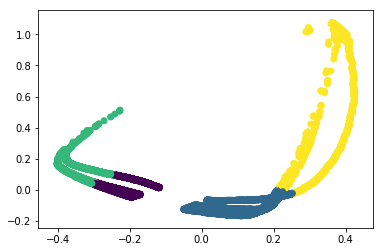

In [43]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred_mini)
plt.show()

## Mean-shift

In [ ]:
from sklearn.cluster import MeanShift
